In [1]:
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm

In [33]:
# import label

label = pd.read_csv('/workspace/brail_poc3/notebooks/Chen/Implement/label.csv', index_col=0)
label

,ID,Age_1,TAPA,CVLT,TMT
0,sub-032311,20,-0.235381,-0.371043,-0.423398
1,sub-032309,20,0.103865,0.160211,-0.296576
2,sub-032382,25,-0.224514,0.182326,-0.380918
3,sub-032302,20,-0.060740,-0.298945,-0.368657
4,sub-032315,20,-0.350309,0.130786,-0.354255
...,...,...,...,...,...
223,sub-032304,25,-0.096677,0.786817,0.948453
224,sub-032439,20,-0.250214,-0.287718,-0.356117
225,sub-032440,25,-0.375662,-0.536070,-0.323686
226,sub-032441,25,-0.101989,0.555243,-0.048483


In [6]:
label['ID'].to_list()

['sub-032311',
 'sub-032309',
 'sub-032382',
 'sub-032302',
 'sub-032315',
 'sub-032314',
 'sub-032316',
 'sub-032383',
 'sub-032307',
 'sub-032310',
 'sub-032312',
 'sub-032317',
 'sub-032404',
 'sub-032318',
 'sub-032319',
 'sub-032386',
 'sub-032320',
 'sub-032321',
 'sub-032322',
 'sub-032394',
 'sub-032324',
 'sub-032323',
 'sub-032528',
 'sub-032325',
 'sub-032313',
 'sub-032405',
 'sub-032384',
 'sub-032407',
 'sub-032327',
 'sub-032414',
 'sub-032418',
 'sub-032326',
 'sub-032415',
 'sub-032332',
 'sub-032331',
 'sub-032305',
 'sub-032308',
 'sub-032428',
 'sub-032333',
 'sub-032430',
 'sub-032301',
 'sub-032303',
 'sub-032336',
 'sub-032329',
 'sub-032431',
 'sub-032335',
 'sub-032337',
 'sub-032339',
 'sub-032306',
 'sub-032338',
 'sub-032340',
 'sub-032341',
 'sub-032442',
 'sub-032347',
 'sub-032444',
 'sub-032346',
 'sub-032350',
 'sub-032351',
 'sub-032348',
 'sub-032343',
 'sub-032342',
 'sub-032334',
 'sub-032356',
 'sub-032358',
 'sub-032446',
 'sub-032421',
 'sub-0323

In [7]:
# import feature

cohAlphaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_alpha/coh/*')
pliAlphaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_alpha/pli/*')
plvAlphaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_alpha/plv/*')

cohBetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_beta/coh/*')
pliBetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_beta/pli/*')
plvBetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_beta/plv/*')

cohDeltaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_delta/coh/*')
pliDeltaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_delta/pli/*')
plvDeltaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_delta/plv/*')

cohGammaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_gamma/coh/*')
pliGammaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_gamma/pli/*')
plvGammaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_gamma/plv/*')

cohThetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_theta/coh/*')
pliThetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_theta/pli/*')
plvThetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_theta/plv/*')

excludeList = ['sub-032336', 'sub-032415', 'sub-032342', 'sub-032339']

FC = []
for a1,a2,a3,b1,b2,b3,d1,d2,d3,g1,g2,g3,t1,t2,t3 in tqdm(zip(cohAlphaList,pliAlphaList,plvAlphaList,
                                                       cohBetaList,pliBetaList,plvBetaList,
                                                       cohDeltaList,pliDeltaList,plvDeltaList,
                                                       cohGammaList,pliGammaList,plvGammaList,
                                                       cohThetaList,pliThetaList,plvThetaList)):
    if a1.split("/")[-1].split(".")[0] in label['ID'].to_list() and a1.split("/")[-1].split(".")[0] not in excludeList:
        Sub = {}
        Sub["ID"] = a1.split("/")[-1].split(".")[0]
        Sub["cohAlpha"] = np.load(a1, allow_pickle='TRUE')
        Sub["pliAlpha"] = np.load(a2, allow_pickle='TRUE')
        Sub["plvAlpha"] = np.load(a3, allow_pickle='TRUE')
        
        Sub["cohBeta"] = np.load(b1, allow_pickle='TRUE')
        Sub["pliBeta"] = np.load(b2, allow_pickle='TRUE')
        Sub["plvBeta"] = np.load(b3, allow_pickle='TRUE')
        
        Sub["cohDelta"] = np.load(d1, allow_pickle='TRUE')
        Sub["pliDelta"] = np.load(d2, allow_pickle='TRUE')
        Sub["plvDelta"] = np.load(d3, allow_pickle='TRUE')
        
        Sub["cohGamma"] = np.load(g1, allow_pickle='TRUE')
        Sub["pliGamma"] = np.load(g2, allow_pickle='TRUE')
        Sub["plvGamma"] = np.load(g3, allow_pickle='TRUE')
        
        Sub["cohTheta"] = np.load(t1, allow_pickle='TRUE')
        Sub["pliTheta"] = np.load(t2, allow_pickle='TRUE')
        Sub["plvTheta"] = np.load(t3, allow_pickle='TRUE')
        
        Sub["Feature"] = np.array([Sub["cohDelta"], Sub["cohTheta"], Sub["cohAlpha"], Sub["cohBeta"], Sub["cohGamma"],
                                   Sub["pliDelta"], Sub["pliTheta"], Sub["pliAlpha"], Sub["pliBeta"], Sub["pliGamma"],
                                    Sub["plvDelta"], Sub["plvTheta"], Sub["plvAlpha"], Sub["plvBeta"], Sub["plvGamma"]])
        FC.append(Sub)
        
# FC_1 = [item for item in FC if item['cog'] == 1]
# FC_2 = [item for item in FC if item['cog'] == 2]

# sub-032336
# sub-032415
# sub-032342
# sub-032339

IDList = []
for i in FC:
    IDList.append(i['ID'])
# [item for item in IDList if item in excludeList]

201it [00:01, 179.17it/s]


In [51]:
feature = []
labelID = []
for i in FC:
    feature.append(i['Feature'])
    labelID.append(i['ID'])
feature = np.array(feature)
print(feature.shape)
feature = feature.reshape(feature.shape[0], feature.shape[2], feature.shape[3], feature.shape[1])

# Check shape
print(feature.shape)
# Check dtype
print(feature.dtype)

(197, 15, 61, 61)
(197, 61, 61, 15)
float64


In [9]:
FC[0]['Feature'].shape

(15, 61, 61)

In [10]:
len(FC)

197

In [53]:
labels = label[label['ID'].isin(labelID)]
labels = labels[['Age_1', 'TAPA', 'CVLT', 'TMT']]
temp = []
for i in labels.columns:
    x = labels[i]
    temp.append((x - np.min(x)) / (np.max(x) - np.min(x)))
#     print(temp)
print(np.array(temp).shape)
labels = np.array(temp)
labels = labels.reshape(labels.shape[1], labels.shape[0], 1)
labels.shape

(4, 197)


(197, 4, 1)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(feature,labels,test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(147, 61, 61, 15)
(50, 61, 61, 15)
(147, 4, 1)
(50, 4, 1)


In [55]:
import tensorflow as tf
import keras
import tensorflow.keras.layers as layers
print(tf.__version__)

2.11.0


In [56]:
def get_model(width, height, depth):

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=32, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv3D(filters=256, kernel_size=(3,3,1), activation="relu")(x)
    x = layers.MaxPool3D(pool_size=(2,2,1))(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    dense_1 = layers.Dense(units=256, activation="relu")(x)
    dense_2 = layers.Dense(units=256, activation="relu")(x)
    dense_3 = layers.Dense(units=256, activation="relu")(x)
    dense_4 = layers.Dense(units=256, activation="relu")(x)
    
    drop_1 = layers.Dropout(0.3)(dense_1)
    drop_2 = layers.Dropout(0.3)(dense_2)
    drop_3 = layers.Dropout(0.3)(dense_3)
    drop_4 = layers.Dropout(0.3)(dense_4)

    outputs_1 = layers.Dense(units=1, activation="sigmoid")(drop_1)
    outputs_2 = layers.Dense(units=1, activation="sigmoid")(drop_2)
    outputs_3 = layers.Dense(units=1, activation="sigmoid")(drop_3)
    outputs_4 = layers.Dense(units=1, activation="sigmoid")(drop_4)

    model = keras.Model(inputs, outputs=[outputs_1,outputs_2,outputs_3,outputs_4], name="3dcnn")
    return model

model = get_model(width=61, height=61, depth=15)
model.summary()

Model: "3dcnn"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 61, 61, 15,  0           []                               
                                 1)]                                                              
                                                                                                  
 conv3d_24 (Conv3D)             (None, 59, 59, 13,   896         ['input_9[0][0]']                
                                32)                                                               
                                                                                                  
 max_pooling3d_24 (MaxPooling3D  (None, 29, 29, 6, 3  0          ['conv3d_24[0][0]']              
 )                              2)                                                            

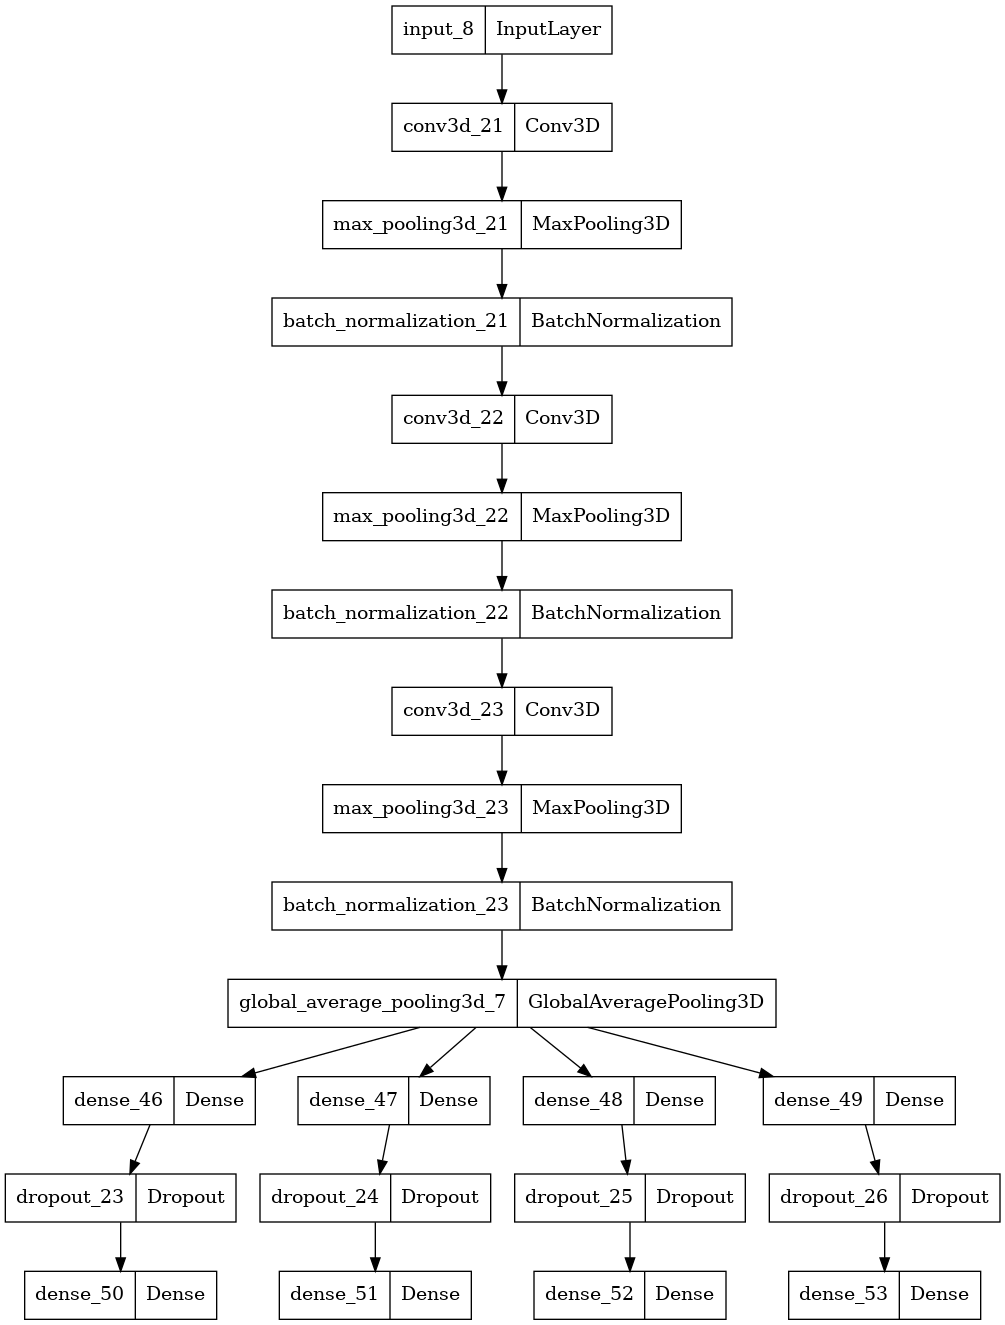

In [47]:
from keras.utils import plot_model
plot_model(model)

In [57]:
Y_train_2=[Y_train[:,0],Y_train[:,1],Y_train[:,2],Y_train[:,3]]
Y_test_2=[Y_test[:,0],Y_test[:,1],Y_test[:,2],Y_test[:,3]]

# Y_train_2=[Y_train[:,1],Y_train[:,2],Y_train[:,3]]
# Y_test_2=[Y_test[:,1],Y_test[:,2],Y_test[:,3]]

# Y_train_2

In [58]:
# # 设置动态学习率
# initial_learning_rate = 1e-4
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=30, decay_rate=0.96, staircase=True
# )
# 编译
model.compile(loss=["mae","mae","mae","mae"], optimizer="sgd", metrics=[tf.keras.metrics.RootMeanSquaredError()])

# # 保存模型
# checkpoint_cb = keras.callbacks.ModelCheckpoint(
#     "3d_image_classification.h5", save_best_only=True
# )
# # 定义早停策略
# early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

epochs = 10000
model.fit(
    X_train,Y_train_2,batch_size=16,validation_data=(X_test,Y_test_2),
    epochs=epochs,
    shuffle=True,
    verbose=2,
#     callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/10000
10/10 - 5s - loss: 1.1448 - dense_58_loss: 0.2916 - dense_59_loss: 0.3130 - dense_60_loss: 0.2500 - dense_61_loss: 0.2902 - dense_58_root_mean_squared_error: 0.3246 - dense_59_root_mean_squared_error: 0.3438 - dense_60_root_mean_squared_error: 0.2896 - dense_61_root_mean_squared_error: 0.3225 - val_loss: 1.2795 - val_dense_58_loss: 0.3082 - val_dense_59_loss: 0.3200 - val_dense_60_loss: 0.3074 - val_dense_61_loss: 0.3439 - val_dense_58_root_mean_squared_error: 0.3394 - val_dense_59_root_mean_squared_error: 0.3516 - val_dense_60_root_mean_squared_error: 0.3406 - val_dense_61_root_mean_squared_error: 0.3627 - 5s/epoch - 469ms/step
Epoch 2/10000
10/10 - 2s - loss: 1.0893 - dense_58_loss: 0.2766 - dense_59_loss: 0.2902 - dense_60_loss: 0.2353 - dense_61_loss: 0.2871 - dense_58_root_mean_squared_error: 0.3148 - dense_59_root_mean_squared_error: 0.3244 - dense_60_root_mean_squared_error: 0.2788 - dense_61_root_mean_squared_error: 0.3205 - val_loss: 1.2485 - val_dense_58_loss: 0

Epoch 14/10000
10/10 - 3s - loss: 0.8645 - dense_58_loss: 0.2142 - dense_59_loss: 0.2150 - dense_60_loss: 0.1997 - dense_61_loss: 0.2357 - dense_58_root_mean_squared_error: 0.2769 - dense_59_root_mean_squared_error: 0.2770 - dense_60_root_mean_squared_error: 0.2487 - dense_61_root_mean_squared_error: 0.2932 - val_loss: 0.8449 - val_dense_58_loss: 0.1754 - val_dense_59_loss: 0.2239 - val_dense_60_loss: 0.1664 - val_dense_61_loss: 0.2792 - val_dense_58_root_mean_squared_error: 0.2323 - val_dense_59_root_mean_squared_error: 0.2596 - val_dense_60_root_mean_squared_error: 0.2343 - val_dense_61_root_mean_squared_error: 0.3068 - 3s/epoch - 288ms/step
Epoch 15/10000
10/10 - 3s - loss: 0.8216 - dense_58_loss: 0.2028 - dense_59_loss: 0.2043 - dense_60_loss: 0.1922 - dense_61_loss: 0.2224 - dense_58_root_mean_squared_error: 0.2670 - dense_59_root_mean_squared_error: 0.2620 - dense_60_root_mean_squared_error: 0.2399 - dense_61_root_mean_squared_error: 0.2809 - val_loss: 0.8099 - val_dense_58_loss:

Epoch 27/10000
10/10 - 3s - loss: 0.7666 - dense_58_loss: 0.1856 - dense_59_loss: 0.1951 - dense_60_loss: 0.1808 - dense_61_loss: 0.2050 - dense_58_root_mean_squared_error: 0.2513 - dense_59_root_mean_squared_error: 0.2633 - dense_60_root_mean_squared_error: 0.2358 - dense_61_root_mean_squared_error: 0.2606 - val_loss: 0.8269 - val_dense_58_loss: 0.1876 - val_dense_59_loss: 0.1957 - val_dense_60_loss: 0.2040 - val_dense_61_loss: 0.2396 - val_dense_58_root_mean_squared_error: 0.2850 - val_dense_59_root_mean_squared_error: 0.2726 - val_dense_60_root_mean_squared_error: 0.2958 - val_dense_61_root_mean_squared_error: 0.2771 - 3s/epoch - 307ms/step
Epoch 28/10000
10/10 - 3s - loss: 0.7527 - dense_58_loss: 0.1897 - dense_59_loss: 0.1829 - dense_60_loss: 0.1745 - dense_61_loss: 0.2056 - dense_58_root_mean_squared_error: 0.2446 - dense_59_root_mean_squared_error: 0.2497 - dense_60_root_mean_squared_error: 0.2285 - dense_61_root_mean_squared_error: 0.2506 - val_loss: 0.8279 - val_dense_58_loss:

Epoch 40/10000
10/10 - 2s - loss: 0.7330 - dense_58_loss: 0.1824 - dense_59_loss: 0.1830 - dense_60_loss: 0.1659 - dense_61_loss: 0.2017 - dense_58_root_mean_squared_error: 0.2443 - dense_59_root_mean_squared_error: 0.2413 - dense_60_root_mean_squared_error: 0.2247 - dense_61_root_mean_squared_error: 0.2469 - val_loss: 0.8525 - val_dense_58_loss: 0.2020 - val_dense_59_loss: 0.2011 - val_dense_60_loss: 0.2139 - val_dense_61_loss: 0.2355 - val_dense_58_root_mean_squared_error: 0.2999 - val_dense_59_root_mean_squared_error: 0.2844 - val_dense_60_root_mean_squared_error: 0.3047 - val_dense_61_root_mean_squared_error: 0.2742 - 2s/epoch - 201ms/step
Epoch 41/10000
10/10 - 2s - loss: 0.6972 - dense_58_loss: 0.1749 - dense_59_loss: 0.1715 - dense_60_loss: 0.1593 - dense_61_loss: 0.1915 - dense_58_root_mean_squared_error: 0.2338 - dense_59_root_mean_squared_error: 0.2348 - dense_60_root_mean_squared_error: 0.2171 - dense_61_root_mean_squared_error: 0.2447 - val_loss: 0.8292 - val_dense_58_loss:

Epoch 53/10000
10/10 - 3s - loss: 0.6527 - dense_58_loss: 0.1520 - dense_59_loss: 0.1571 - dense_60_loss: 0.1619 - dense_61_loss: 0.1817 - dense_58_root_mean_squared_error: 0.2113 - dense_59_root_mean_squared_error: 0.2212 - dense_60_root_mean_squared_error: 0.2163 - dense_61_root_mean_squared_error: 0.2345 - val_loss: 0.9021 - val_dense_58_loss: 0.1744 - val_dense_59_loss: 0.2036 - val_dense_60_loss: 0.1983 - val_dense_61_loss: 0.3257 - val_dense_58_root_mean_squared_error: 0.2647 - val_dense_59_root_mean_squared_error: 0.2596 - val_dense_60_root_mean_squared_error: 0.2901 - val_dense_61_root_mean_squared_error: 0.3490 - 3s/epoch - 312ms/step
Epoch 54/10000
10/10 - 3s - loss: 0.6347 - dense_58_loss: 0.1537 - dense_59_loss: 0.1563 - dense_60_loss: 0.1479 - dense_61_loss: 0.1768 - dense_58_root_mean_squared_error: 0.2111 - dense_59_root_mean_squared_error: 0.2114 - dense_60_root_mean_squared_error: 0.2018 - dense_61_root_mean_squared_error: 0.2244 - val_loss: 0.9354 - val_dense_58_loss:

Epoch 66/10000
10/10 - 3s - loss: 0.5816 - dense_58_loss: 0.1463 - dense_59_loss: 0.1451 - dense_60_loss: 0.1367 - dense_61_loss: 0.1534 - dense_58_root_mean_squared_error: 0.2024 - dense_59_root_mean_squared_error: 0.2058 - dense_60_root_mean_squared_error: 0.1866 - dense_61_root_mean_squared_error: 0.2059 - val_loss: 1.2791 - val_dense_58_loss: 0.3022 - val_dense_59_loss: 0.2848 - val_dense_60_loss: 0.3227 - val_dense_61_loss: 0.3695 - val_dense_58_root_mean_squared_error: 0.3351 - val_dense_59_root_mean_squared_error: 0.3127 - val_dense_60_root_mean_squared_error: 0.3573 - val_dense_61_root_mean_squared_error: 0.4047 - 3s/epoch - 286ms/step
Epoch 67/10000
10/10 - 3s - loss: 0.5884 - dense_58_loss: 0.1471 - dense_59_loss: 0.1435 - dense_60_loss: 0.1378 - dense_61_loss: 0.1601 - dense_58_root_mean_squared_error: 0.2100 - dense_59_root_mean_squared_error: 0.2091 - dense_60_root_mean_squared_error: 0.1966 - dense_61_root_mean_squared_error: 0.2113 - val_loss: 0.8174 - val_dense_58_loss:

Epoch 79/10000
10/10 - 3s - loss: 0.5478 - dense_58_loss: 0.1307 - dense_59_loss: 0.1419 - dense_60_loss: 0.1273 - dense_61_loss: 0.1478 - dense_58_root_mean_squared_error: 0.1933 - dense_59_root_mean_squared_error: 0.1996 - dense_60_root_mean_squared_error: 0.1793 - dense_61_root_mean_squared_error: 0.1959 - val_loss: 0.8907 - val_dense_58_loss: 0.1842 - val_dense_59_loss: 0.1967 - val_dense_60_loss: 0.1641 - val_dense_61_loss: 0.3457 - val_dense_58_root_mean_squared_error: 0.2799 - val_dense_59_root_mean_squared_error: 0.2747 - val_dense_60_root_mean_squared_error: 0.2383 - val_dense_61_root_mean_squared_error: 0.3660 - 3s/epoch - 322ms/step
Epoch 80/10000
10/10 - 3s - loss: 0.5443 - dense_58_loss: 0.1304 - dense_59_loss: 0.1321 - dense_60_loss: 0.1330 - dense_61_loss: 0.1488 - dense_58_root_mean_squared_error: 0.1856 - dense_59_root_mean_squared_error: 0.1942 - dense_60_root_mean_squared_error: 0.1927 - dense_61_root_mean_squared_error: 0.1967 - val_loss: 1.1500 - val_dense_58_loss:

Epoch 92/10000
10/10 - 3s - loss: 0.4823 - dense_58_loss: 0.1172 - dense_59_loss: 0.1185 - dense_60_loss: 0.1124 - dense_61_loss: 0.1342 - dense_58_root_mean_squared_error: 0.1715 - dense_59_root_mean_squared_error: 0.1799 - dense_60_root_mean_squared_error: 0.1696 - dense_61_root_mean_squared_error: 0.1785 - val_loss: 0.7779 - val_dense_58_loss: 0.1905 - val_dense_59_loss: 0.2023 - val_dense_60_loss: 0.1856 - val_dense_61_loss: 0.1995 - val_dense_58_root_mean_squared_error: 0.2515 - val_dense_59_root_mean_squared_error: 0.3075 - val_dense_60_root_mean_squared_error: 0.2738 - val_dense_61_root_mean_squared_error: 0.3179 - 3s/epoch - 294ms/step
Epoch 93/10000
10/10 - 3s - loss: 0.5426 - dense_58_loss: 0.1254 - dense_59_loss: 0.1421 - dense_60_loss: 0.1221 - dense_61_loss: 0.1530 - dense_58_root_mean_squared_error: 0.1787 - dense_59_root_mean_squared_error: 0.1985 - dense_60_root_mean_squared_error: 0.1833 - dense_61_root_mean_squared_error: 0.1971 - val_loss: 0.8577 - val_dense_58_loss:

Epoch 105/10000
10/10 - 2s - loss: 0.4661 - dense_58_loss: 0.1153 - dense_59_loss: 0.1178 - dense_60_loss: 0.1100 - dense_61_loss: 0.1230 - dense_58_root_mean_squared_error: 0.1682 - dense_59_root_mean_squared_error: 0.1684 - dense_60_root_mean_squared_error: 0.1510 - dense_61_root_mean_squared_error: 0.1610 - val_loss: 0.8680 - val_dense_58_loss: 0.1861 - val_dense_59_loss: 0.2193 - val_dense_60_loss: 0.2077 - val_dense_61_loss: 0.2549 - val_dense_58_root_mean_squared_error: 0.2599 - val_dense_59_root_mean_squared_error: 0.2759 - val_dense_60_root_mean_squared_error: 0.2324 - val_dense_61_root_mean_squared_error: 0.3083 - 2s/epoch - 212ms/step
Epoch 106/10000
10/10 - 2s - loss: 0.4303 - dense_58_loss: 0.1084 - dense_59_loss: 0.1088 - dense_60_loss: 0.1010 - dense_61_loss: 0.1121 - dense_58_root_mean_squared_error: 0.1662 - dense_59_root_mean_squared_error: 0.1545 - dense_60_root_mean_squared_error: 0.1454 - dense_61_root_mean_squared_error: 0.1467 - val_loss: 0.9579 - val_dense_58_los

Epoch 118/10000
10/10 - 3s - loss: 0.4598 - dense_58_loss: 0.1102 - dense_59_loss: 0.1145 - dense_60_loss: 0.1106 - dense_61_loss: 0.1244 - dense_58_root_mean_squared_error: 0.1524 - dense_59_root_mean_squared_error: 0.1606 - dense_60_root_mean_squared_error: 0.1608 - dense_61_root_mean_squared_error: 0.1698 - val_loss: 1.0325 - val_dense_58_loss: 0.3558 - val_dense_59_loss: 0.2863 - val_dense_60_loss: 0.1976 - val_dense_61_loss: 0.1928 - val_dense_58_root_mean_squared_error: 0.3894 - val_dense_59_root_mean_squared_error: 0.3273 - val_dense_60_root_mean_squared_error: 0.2419 - val_dense_61_root_mean_squared_error: 0.3086 - 3s/epoch - 304ms/step
Epoch 119/10000
10/10 - 3s - loss: 0.3970 - dense_58_loss: 0.0921 - dense_59_loss: 0.0971 - dense_60_loss: 0.0990 - dense_61_loss: 0.1088 - dense_58_root_mean_squared_error: 0.1399 - dense_59_root_mean_squared_error: 0.1427 - dense_60_root_mean_squared_error: 0.1453 - dense_61_root_mean_squared_error: 0.1519 - val_loss: 0.8231 - val_dense_58_los

Epoch 131/10000
10/10 - 3s - loss: 0.4173 - dense_58_loss: 0.1000 - dense_59_loss: 0.1048 - dense_60_loss: 0.1005 - dense_61_loss: 0.1119 - dense_58_root_mean_squared_error: 0.1459 - dense_59_root_mean_squared_error: 0.1472 - dense_60_root_mean_squared_error: 0.1460 - dense_61_root_mean_squared_error: 0.1539 - val_loss: 1.5855 - val_dense_58_loss: 0.5215 - val_dense_59_loss: 0.4829 - val_dense_60_loss: 0.2595 - val_dense_61_loss: 0.3216 - val_dense_58_root_mean_squared_error: 0.5672 - val_dense_59_root_mean_squared_error: 0.5443 - val_dense_60_root_mean_squared_error: 0.2853 - val_dense_61_root_mean_squared_error: 0.3640 - 3s/epoch - 313ms/step
Epoch 132/10000
10/10 - 3s - loss: 0.3699 - dense_58_loss: 0.0900 - dense_59_loss: 0.0871 - dense_60_loss: 0.0964 - dense_61_loss: 0.0965 - dense_58_root_mean_squared_error: 0.1374 - dense_59_root_mean_squared_error: 0.1304 - dense_60_root_mean_squared_error: 0.1400 - dense_61_root_mean_squared_error: 0.1334 - val_loss: 1.7263 - val_dense_58_los

Epoch 144/10000
10/10 - 2s - loss: 0.3866 - dense_58_loss: 0.0864 - dense_59_loss: 0.0889 - dense_60_loss: 0.1011 - dense_61_loss: 0.1102 - dense_58_root_mean_squared_error: 0.1251 - dense_59_root_mean_squared_error: 0.1265 - dense_60_root_mean_squared_error: 0.1441 - dense_61_root_mean_squared_error: 0.1452 - val_loss: 0.7971 - val_dense_58_loss: 0.1903 - val_dense_59_loss: 0.2069 - val_dense_60_loss: 0.2094 - val_dense_61_loss: 0.1904 - val_dense_58_root_mean_squared_error: 0.2646 - val_dense_59_root_mean_squared_error: 0.2821 - val_dense_60_root_mean_squared_error: 0.2531 - val_dense_61_root_mean_squared_error: 0.3020 - 2s/epoch - 175ms/step
Epoch 145/10000
10/10 - 2s - loss: 0.3326 - dense_58_loss: 0.0934 - dense_59_loss: 0.0803 - dense_60_loss: 0.0816 - dense_61_loss: 0.0773 - dense_58_root_mean_squared_error: 0.1397 - dense_59_root_mean_squared_error: 0.1161 - dense_60_root_mean_squared_error: 0.1178 - dense_61_root_mean_squared_error: 0.1061 - val_loss: 1.0514 - val_dense_58_los

Epoch 157/10000
10/10 - 3s - loss: 0.3010 - dense_58_loss: 0.0741 - dense_59_loss: 0.0735 - dense_60_loss: 0.0807 - dense_61_loss: 0.0728 - dense_58_root_mean_squared_error: 0.1096 - dense_59_root_mean_squared_error: 0.1090 - dense_60_root_mean_squared_error: 0.1202 - dense_61_root_mean_squared_error: 0.1040 - val_loss: 1.2319 - val_dense_58_loss: 0.2899 - val_dense_59_loss: 0.3528 - val_dense_60_loss: 0.1970 - val_dense_61_loss: 0.3923 - val_dense_58_root_mean_squared_error: 0.3363 - val_dense_59_root_mean_squared_error: 0.4135 - val_dense_60_root_mean_squared_error: 0.2411 - val_dense_61_root_mean_squared_error: 0.4398 - 3s/epoch - 301ms/step
Epoch 158/10000
10/10 - 3s - loss: 0.3287 - dense_58_loss: 0.0823 - dense_59_loss: 0.0882 - dense_60_loss: 0.0767 - dense_61_loss: 0.0815 - dense_58_root_mean_squared_error: 0.1145 - dense_59_root_mean_squared_error: 0.1271 - dense_60_root_mean_squared_error: 0.1134 - dense_61_root_mean_squared_error: 0.1094 - val_loss: 1.0764 - val_dense_58_los

Epoch 170/10000
10/10 - 3s - loss: 0.3306 - dense_58_loss: 0.0850 - dense_59_loss: 0.0707 - dense_60_loss: 0.0784 - dense_61_loss: 0.0964 - dense_58_root_mean_squared_error: 0.1156 - dense_59_root_mean_squared_error: 0.1026 - dense_60_root_mean_squared_error: 0.1129 - dense_61_root_mean_squared_error: 0.1254 - val_loss: 0.8689 - val_dense_58_loss: 0.2091 - val_dense_59_loss: 0.2438 - val_dense_60_loss: 0.2288 - val_dense_61_loss: 0.1871 - val_dense_58_root_mean_squared_error: 0.3062 - val_dense_59_root_mean_squared_error: 0.3517 - val_dense_60_root_mean_squared_error: 0.3181 - val_dense_61_root_mean_squared_error: 0.2618 - 3s/epoch - 306ms/step
Epoch 171/10000
10/10 - 3s - loss: 0.2991 - dense_58_loss: 0.0752 - dense_59_loss: 0.0733 - dense_60_loss: 0.0744 - dense_61_loss: 0.0763 - dense_58_root_mean_squared_error: 0.1077 - dense_59_root_mean_squared_error: 0.1027 - dense_60_root_mean_squared_error: 0.1072 - dense_61_root_mean_squared_error: 0.1024 - val_loss: 0.7834 - val_dense_58_los

Epoch 183/10000
10/10 - 3s - loss: 0.2723 - dense_58_loss: 0.0670 - dense_59_loss: 0.0676 - dense_60_loss: 0.0668 - dense_61_loss: 0.0709 - dense_58_root_mean_squared_error: 0.1014 - dense_59_root_mean_squared_error: 0.0957 - dense_60_root_mean_squared_error: 0.0937 - dense_61_root_mean_squared_error: 0.0979 - val_loss: 0.7712 - val_dense_58_loss: 0.1929 - val_dense_59_loss: 0.2179 - val_dense_60_loss: 0.1690 - val_dense_61_loss: 0.1915 - val_dense_58_root_mean_squared_error: 0.2870 - val_dense_59_root_mean_squared_error: 0.3057 - val_dense_60_root_mean_squared_error: 0.2519 - val_dense_61_root_mean_squared_error: 0.2948 - 3s/epoch - 300ms/step
Epoch 184/10000
10/10 - 3s - loss: 0.2781 - dense_58_loss: 0.0713 - dense_59_loss: 0.0678 - dense_60_loss: 0.0646 - dense_61_loss: 0.0744 - dense_58_root_mean_squared_error: 0.1099 - dense_59_root_mean_squared_error: 0.0987 - dense_60_root_mean_squared_error: 0.0857 - dense_61_root_mean_squared_error: 0.0967 - val_loss: 0.9027 - val_dense_58_los

Epoch 196/10000
10/10 - 3s - loss: 0.2768 - dense_58_loss: 0.0711 - dense_59_loss: 0.0650 - dense_60_loss: 0.0660 - dense_61_loss: 0.0747 - dense_58_root_mean_squared_error: 0.1065 - dense_59_root_mean_squared_error: 0.0877 - dense_60_root_mean_squared_error: 0.0912 - dense_61_root_mean_squared_error: 0.1005 - val_loss: 0.8270 - val_dense_58_loss: 0.2200 - val_dense_59_loss: 0.2169 - val_dense_60_loss: 0.1882 - val_dense_61_loss: 0.2019 - val_dense_58_root_mean_squared_error: 0.3172 - val_dense_59_root_mean_squared_error: 0.3208 - val_dense_60_root_mean_squared_error: 0.2771 - val_dense_61_root_mean_squared_error: 0.3121 - 3s/epoch - 315ms/step
Epoch 197/10000
10/10 - 3s - loss: 0.2562 - dense_58_loss: 0.0686 - dense_59_loss: 0.0662 - dense_60_loss: 0.0579 - dense_61_loss: 0.0636 - dense_58_root_mean_squared_error: 0.1014 - dense_59_root_mean_squared_error: 0.0921 - dense_60_root_mean_squared_error: 0.0850 - dense_61_root_mean_squared_error: 0.0842 - val_loss: 0.9665 - val_dense_58_los

Epoch 209/10000
10/10 - 3s - loss: 0.2752 - dense_58_loss: 0.0778 - dense_59_loss: 0.0700 - dense_60_loss: 0.0644 - dense_61_loss: 0.0630 - dense_58_root_mean_squared_error: 0.1061 - dense_59_root_mean_squared_error: 0.0977 - dense_60_root_mean_squared_error: 0.0918 - dense_61_root_mean_squared_error: 0.0847 - val_loss: 0.8959 - val_dense_58_loss: 0.2456 - val_dense_59_loss: 0.2017 - val_dense_60_loss: 0.2459 - val_dense_61_loss: 0.2027 - val_dense_58_root_mean_squared_error: 0.2817 - val_dense_59_root_mean_squared_error: 0.2754 - val_dense_60_root_mean_squared_error: 0.2785 - val_dense_61_root_mean_squared_error: 0.3176 - 3s/epoch - 266ms/step
Epoch 210/10000
10/10 - 2s - loss: 0.2513 - dense_58_loss: 0.0605 - dense_59_loss: 0.0550 - dense_60_loss: 0.0639 - dense_61_loss: 0.0719 - dense_58_root_mean_squared_error: 0.0922 - dense_59_root_mean_squared_error: 0.0768 - dense_60_root_mean_squared_error: 0.0920 - dense_61_root_mean_squared_error: 0.0965 - val_loss: 0.9432 - val_dense_58_los

Epoch 222/10000
10/10 - 3s - loss: 0.2309 - dense_58_loss: 0.0614 - dense_59_loss: 0.0563 - dense_60_loss: 0.0545 - dense_61_loss: 0.0587 - dense_58_root_mean_squared_error: 0.0856 - dense_59_root_mean_squared_error: 0.0767 - dense_60_root_mean_squared_error: 0.0717 - dense_61_root_mean_squared_error: 0.0721 - val_loss: 1.2868 - val_dense_58_loss: 0.4513 - val_dense_59_loss: 0.2112 - val_dense_60_loss: 0.1744 - val_dense_61_loss: 0.4498 - val_dense_58_root_mean_squared_error: 0.5013 - val_dense_59_root_mean_squared_error: 0.2789 - val_dense_60_root_mean_squared_error: 0.2635 - val_dense_61_root_mean_squared_error: 0.4898 - 3s/epoch - 321ms/step
Epoch 223/10000
10/10 - 3s - loss: 0.2383 - dense_58_loss: 0.0558 - dense_59_loss: 0.0531 - dense_60_loss: 0.0648 - dense_61_loss: 0.0646 - dense_58_root_mean_squared_error: 0.0807 - dense_59_root_mean_squared_error: 0.0685 - dense_60_root_mean_squared_error: 0.0841 - dense_61_root_mean_squared_error: 0.0876 - val_loss: 0.9768 - val_dense_58_los

Epoch 235/10000
10/10 - 3s - loss: 0.2331 - dense_58_loss: 0.0623 - dense_59_loss: 0.0545 - dense_60_loss: 0.0526 - dense_61_loss: 0.0636 - dense_58_root_mean_squared_error: 0.0822 - dense_59_root_mean_squared_error: 0.0756 - dense_60_root_mean_squared_error: 0.0687 - dense_61_root_mean_squared_error: 0.0806 - val_loss: 0.8842 - val_dense_58_loss: 0.2541 - val_dense_59_loss: 0.2085 - val_dense_60_loss: 0.1907 - val_dense_61_loss: 0.2309 - val_dense_58_root_mean_squared_error: 0.2902 - val_dense_59_root_mean_squared_error: 0.2689 - val_dense_60_root_mean_squared_error: 0.2797 - val_dense_61_root_mean_squared_error: 0.2861 - 3s/epoch - 316ms/step
Epoch 236/10000
10/10 - 3s - loss: 0.2219 - dense_58_loss: 0.0543 - dense_59_loss: 0.0574 - dense_60_loss: 0.0529 - dense_61_loss: 0.0572 - dense_58_root_mean_squared_error: 0.0796 - dense_59_root_mean_squared_error: 0.0788 - dense_60_root_mean_squared_error: 0.0718 - dense_61_root_mean_squared_error: 0.0741 - val_loss: 0.8866 - val_dense_58_los

Epoch 248/10000
10/10 - 1s - loss: 0.2341 - dense_58_loss: 0.0554 - dense_59_loss: 0.0559 - dense_60_loss: 0.0582 - dense_61_loss: 0.0645 - dense_58_root_mean_squared_error: 0.0780 - dense_59_root_mean_squared_error: 0.0732 - dense_60_root_mean_squared_error: 0.0751 - dense_61_root_mean_squared_error: 0.0852 - val_loss: 0.8296 - val_dense_58_loss: 0.2071 - val_dense_59_loss: 0.2539 - val_dense_60_loss: 0.1887 - val_dense_61_loss: 0.1799 - val_dense_58_root_mean_squared_error: 0.2547 - val_dense_59_root_mean_squared_error: 0.3007 - val_dense_60_root_mean_squared_error: 0.2774 - val_dense_61_root_mean_squared_error: 0.2872 - 1s/epoch - 135ms/step
Epoch 249/10000
10/10 - 1s - loss: 0.2293 - dense_58_loss: 0.0601 - dense_59_loss: 0.0561 - dense_60_loss: 0.0538 - dense_61_loss: 0.0594 - dense_58_root_mean_squared_error: 0.0744 - dense_59_root_mean_squared_error: 0.0761 - dense_60_root_mean_squared_error: 0.0780 - dense_61_root_mean_squared_error: 0.0745 - val_loss: 1.1932 - val_dense_58_los

Epoch 261/10000
10/10 - 3s - loss: 0.2527 - dense_58_loss: 0.0506 - dense_59_loss: 0.0617 - dense_60_loss: 0.0712 - dense_61_loss: 0.0692 - dense_58_root_mean_squared_error: 0.0667 - dense_59_root_mean_squared_error: 0.0803 - dense_60_root_mean_squared_error: 0.0901 - dense_61_root_mean_squared_error: 0.0904 - val_loss: 0.9223 - val_dense_58_loss: 0.2250 - val_dense_59_loss: 0.2150 - val_dense_60_loss: 0.2718 - val_dense_61_loss: 0.2104 - val_dense_58_root_mean_squared_error: 0.2855 - val_dense_59_root_mean_squared_error: 0.2918 - val_dense_60_root_mean_squared_error: 0.2955 - val_dense_61_root_mean_squared_error: 0.3224 - 3s/epoch - 285ms/step
Epoch 262/10000
10/10 - 3s - loss: 0.2111 - dense_58_loss: 0.0575 - dense_59_loss: 0.0536 - dense_60_loss: 0.0492 - dense_61_loss: 0.0508 - dense_58_root_mean_squared_error: 0.0773 - dense_59_root_mean_squared_error: 0.0698 - dense_60_root_mean_squared_error: 0.0654 - dense_61_root_mean_squared_error: 0.0740 - val_loss: 1.0914 - val_dense_58_los

Epoch 274/10000
10/10 - 3s - loss: 0.2140 - dense_58_loss: 0.0519 - dense_59_loss: 0.0430 - dense_60_loss: 0.0631 - dense_61_loss: 0.0560 - dense_58_root_mean_squared_error: 0.0706 - dense_59_root_mean_squared_error: 0.0570 - dense_60_root_mean_squared_error: 0.0834 - dense_61_root_mean_squared_error: 0.0736 - val_loss: 0.8575 - val_dense_58_loss: 0.2102 - val_dense_59_loss: 0.2743 - val_dense_60_loss: 0.1937 - val_dense_61_loss: 0.1794 - val_dense_58_root_mean_squared_error: 0.2531 - val_dense_59_root_mean_squared_error: 0.3113 - val_dense_60_root_mean_squared_error: 0.2837 - val_dense_61_root_mean_squared_error: 0.2844 - 3s/epoch - 257ms/step
Epoch 275/10000
10/10 - 3s - loss: 0.2237 - dense_58_loss: 0.0524 - dense_59_loss: 0.0597 - dense_60_loss: 0.0572 - dense_61_loss: 0.0544 - dense_58_root_mean_squared_error: 0.0788 - dense_59_root_mean_squared_error: 0.0793 - dense_60_root_mean_squared_error: 0.0739 - dense_61_root_mean_squared_error: 0.0705 - val_loss: 0.7783 - val_dense_58_los

Epoch 287/10000
10/10 - 3s - loss: 0.1867 - dense_58_loss: 0.0466 - dense_59_loss: 0.0405 - dense_60_loss: 0.0521 - dense_61_loss: 0.0475 - dense_58_root_mean_squared_error: 0.0633 - dense_59_root_mean_squared_error: 0.0522 - dense_60_root_mean_squared_error: 0.0701 - dense_61_root_mean_squared_error: 0.0631 - val_loss: 0.8006 - val_dense_58_loss: 0.1854 - val_dense_59_loss: 0.2193 - val_dense_60_loss: 0.1798 - val_dense_61_loss: 0.2161 - val_dense_58_root_mean_squared_error: 0.2530 - val_dense_59_root_mean_squared_error: 0.2915 - val_dense_60_root_mean_squared_error: 0.2711 - val_dense_61_root_mean_squared_error: 0.2751 - 3s/epoch - 283ms/step
Epoch 288/10000
10/10 - 3s - loss: 0.1948 - dense_58_loss: 0.0461 - dense_59_loss: 0.0492 - dense_60_loss: 0.0512 - dense_61_loss: 0.0484 - dense_58_root_mean_squared_error: 0.0623 - dense_59_root_mean_squared_error: 0.0646 - dense_60_root_mean_squared_error: 0.0676 - dense_61_root_mean_squared_error: 0.0641 - val_loss: 0.7646 - val_dense_58_los

Epoch 300/10000
10/10 - 3s - loss: 0.2046 - dense_58_loss: 0.0464 - dense_59_loss: 0.0536 - dense_60_loss: 0.0493 - dense_61_loss: 0.0553 - dense_58_root_mean_squared_error: 0.0621 - dense_59_root_mean_squared_error: 0.0727 - dense_60_root_mean_squared_error: 0.0644 - dense_61_root_mean_squared_error: 0.0705 - val_loss: 0.8437 - val_dense_58_loss: 0.2418 - val_dense_59_loss: 0.2125 - val_dense_60_loss: 0.1850 - val_dense_61_loss: 0.2043 - val_dense_58_root_mean_squared_error: 0.2852 - val_dense_59_root_mean_squared_error: 0.2807 - val_dense_60_root_mean_squared_error: 0.2725 - val_dense_61_root_mean_squared_error: 0.2950 - 3s/epoch - 291ms/step
Epoch 301/10000
10/10 - 3s - loss: 0.1986 - dense_58_loss: 0.0506 - dense_59_loss: 0.0519 - dense_60_loss: 0.0444 - dense_61_loss: 0.0516 - dense_58_root_mean_squared_error: 0.0676 - dense_59_root_mean_squared_error: 0.0698 - dense_60_root_mean_squared_error: 0.0588 - dense_61_root_mean_squared_error: 0.0726 - val_loss: 0.9055 - val_dense_58_los

Epoch 313/10000
10/10 - 2s - loss: 0.2202 - dense_58_loss: 0.0582 - dense_59_loss: 0.0529 - dense_60_loss: 0.0542 - dense_61_loss: 0.0549 - dense_58_root_mean_squared_error: 0.0779 - dense_59_root_mean_squared_error: 0.0672 - dense_60_root_mean_squared_error: 0.0712 - dense_61_root_mean_squared_error: 0.0730 - val_loss: 1.0633 - val_dense_58_loss: 0.2316 - val_dense_59_loss: 0.4647 - val_dense_60_loss: 0.1868 - val_dense_61_loss: 0.1802 - val_dense_58_root_mean_squared_error: 0.2660 - val_dense_59_root_mean_squared_error: 0.5299 - val_dense_60_root_mean_squared_error: 0.2418 - val_dense_61_root_mean_squared_error: 0.2745 - 2s/epoch - 220ms/step
Epoch 314/10000
10/10 - 2s - loss: 0.1870 - dense_58_loss: 0.0452 - dense_59_loss: 0.0478 - dense_60_loss: 0.0460 - dense_61_loss: 0.0480 - dense_58_root_mean_squared_error: 0.0613 - dense_59_root_mean_squared_error: 0.0619 - dense_60_root_mean_squared_error: 0.0577 - dense_61_root_mean_squared_error: 0.0702 - val_loss: 0.8194 - val_dense_58_los

Epoch 326/10000
10/10 - 3s - loss: 0.1980 - dense_58_loss: 0.0502 - dense_59_loss: 0.0532 - dense_60_loss: 0.0471 - dense_61_loss: 0.0475 - dense_58_root_mean_squared_error: 0.0658 - dense_59_root_mean_squared_error: 0.0703 - dense_60_root_mean_squared_error: 0.0598 - dense_61_root_mean_squared_error: 0.0644 - val_loss: 0.8731 - val_dense_58_loss: 0.1787 - val_dense_59_loss: 0.2294 - val_dense_60_loss: 0.1663 - val_dense_61_loss: 0.2988 - val_dense_58_root_mean_squared_error: 0.2651 - val_dense_59_root_mean_squared_error: 0.3326 - val_dense_60_root_mean_squared_error: 0.2397 - val_dense_61_root_mean_squared_error: 0.3577 - 3s/epoch - 296ms/step
Epoch 327/10000
10/10 - 3s - loss: 0.2200 - dense_58_loss: 0.0589 - dense_59_loss: 0.0523 - dense_60_loss: 0.0520 - dense_61_loss: 0.0568 - dense_58_root_mean_squared_error: 0.0795 - dense_59_root_mean_squared_error: 0.0760 - dense_60_root_mean_squared_error: 0.0663 - dense_61_root_mean_squared_error: 0.0778 - val_loss: 1.1468 - val_dense_58_los

Epoch 339/10000
10/10 - 3s - loss: 0.2019 - dense_58_loss: 0.0523 - dense_59_loss: 0.0562 - dense_60_loss: 0.0427 - dense_61_loss: 0.0507 - dense_58_root_mean_squared_error: 0.0803 - dense_59_root_mean_squared_error: 0.0861 - dense_60_root_mean_squared_error: 0.0552 - dense_61_root_mean_squared_error: 0.0677 - val_loss: 1.0179 - val_dense_58_loss: 0.1892 - val_dense_59_loss: 0.2159 - val_dense_60_loss: 0.2012 - val_dense_61_loss: 0.4117 - val_dense_58_root_mean_squared_error: 0.2483 - val_dense_59_root_mean_squared_error: 0.3082 - val_dense_60_root_mean_squared_error: 0.2949 - val_dense_61_root_mean_squared_error: 0.4539 - 3s/epoch - 306ms/step
Epoch 340/10000
10/10 - 3s - loss: 0.1870 - dense_58_loss: 0.0498 - dense_59_loss: 0.0464 - dense_60_loss: 0.0436 - dense_61_loss: 0.0471 - dense_58_root_mean_squared_error: 0.0667 - dense_59_root_mean_squared_error: 0.0623 - dense_60_root_mean_squared_error: 0.0555 - dense_61_root_mean_squared_error: 0.0639 - val_loss: 0.7515 - val_dense_58_los

Epoch 352/10000
10/10 - 3s - loss: 0.1846 - dense_58_loss: 0.0484 - dense_59_loss: 0.0443 - dense_60_loss: 0.0509 - dense_61_loss: 0.0409 - dense_58_root_mean_squared_error: 0.0747 - dense_59_root_mean_squared_error: 0.0617 - dense_60_root_mean_squared_error: 0.0652 - dense_61_root_mean_squared_error: 0.0516 - val_loss: 0.9220 - val_dense_58_loss: 0.1908 - val_dense_59_loss: 0.2376 - val_dense_60_loss: 0.1867 - val_dense_61_loss: 0.3069 - val_dense_58_root_mean_squared_error: 0.2536 - val_dense_59_root_mean_squared_error: 0.2772 - val_dense_60_root_mean_squared_error: 0.2797 - val_dense_61_root_mean_squared_error: 0.3455 - 3s/epoch - 303ms/step
Epoch 353/10000
10/10 - 3s - loss: 0.1817 - dense_58_loss: 0.0475 - dense_59_loss: 0.0405 - dense_60_loss: 0.0498 - dense_61_loss: 0.0440 - dense_58_root_mean_squared_error: 0.0669 - dense_59_root_mean_squared_error: 0.0545 - dense_60_root_mean_squared_error: 0.0684 - dense_61_root_mean_squared_error: 0.0597 - val_loss: 1.2271 - val_dense_58_los

Epoch 365/10000
10/10 - 3s - loss: 0.2031 - dense_58_loss: 0.0566 - dense_59_loss: 0.0483 - dense_60_loss: 0.0477 - dense_61_loss: 0.0505 - dense_58_root_mean_squared_error: 0.0990 - dense_59_root_mean_squared_error: 0.0763 - dense_60_root_mean_squared_error: 0.0728 - dense_61_root_mean_squared_error: 0.0730 - val_loss: 0.7862 - val_dense_58_loss: 0.1896 - val_dense_59_loss: 0.2284 - val_dense_60_loss: 0.1625 - val_dense_61_loss: 0.2057 - val_dense_58_root_mean_squared_error: 0.2789 - val_dense_59_root_mean_squared_error: 0.3323 - val_dense_60_root_mean_squared_error: 0.2329 - val_dense_61_root_mean_squared_error: 0.2726 - 3s/epoch - 287ms/step
Epoch 366/10000
10/10 - 3s - loss: 0.1816 - dense_58_loss: 0.0388 - dense_59_loss: 0.0561 - dense_60_loss: 0.0426 - dense_61_loss: 0.0441 - dense_58_root_mean_squared_error: 0.0522 - dense_59_root_mean_squared_error: 0.0769 - dense_60_root_mean_squared_error: 0.0534 - dense_61_root_mean_squared_error: 0.0585 - val_loss: 0.7993 - val_dense_58_los

Epoch 378/10000
10/10 - 3s - loss: 0.1739 - dense_58_loss: 0.0469 - dense_59_loss: 0.0415 - dense_60_loss: 0.0413 - dense_61_loss: 0.0442 - dense_58_root_mean_squared_error: 0.0659 - dense_59_root_mean_squared_error: 0.0531 - dense_60_root_mean_squared_error: 0.0529 - dense_61_root_mean_squared_error: 0.0573 - val_loss: 0.8373 - val_dense_58_loss: 0.2107 - val_dense_59_loss: 0.2233 - val_dense_60_loss: 0.1961 - val_dense_61_loss: 0.2072 - val_dense_58_root_mean_squared_error: 0.2488 - val_dense_59_root_mean_squared_error: 0.3271 - val_dense_60_root_mean_squared_error: 0.2420 - val_dense_61_root_mean_squared_error: 0.3190 - 3s/epoch - 297ms/step
Epoch 379/10000
10/10 - 2s - loss: 0.1885 - dense_58_loss: 0.0428 - dense_59_loss: 0.0424 - dense_60_loss: 0.0489 - dense_61_loss: 0.0544 - dense_58_root_mean_squared_error: 0.0557 - dense_59_root_mean_squared_error: 0.0582 - dense_60_root_mean_squared_error: 0.0623 - dense_61_root_mean_squared_error: 0.0690 - val_loss: 0.7732 - val_dense_58_los

Epoch 391/10000
10/10 - 3s - loss: 0.1818 - dense_58_loss: 0.0429 - dense_59_loss: 0.0430 - dense_60_loss: 0.0476 - dense_61_loss: 0.0483 - dense_58_root_mean_squared_error: 0.0574 - dense_59_root_mean_squared_error: 0.0573 - dense_60_root_mean_squared_error: 0.0595 - dense_61_root_mean_squared_error: 0.0610 - val_loss: 0.9442 - val_dense_58_loss: 0.3338 - val_dense_59_loss: 0.2378 - val_dense_60_loss: 0.1762 - val_dense_61_loss: 0.1964 - val_dense_58_root_mean_squared_error: 0.3770 - val_dense_59_root_mean_squared_error: 0.2743 - val_dense_60_root_mean_squared_error: 0.2364 - val_dense_61_root_mean_squared_error: 0.2829 - 3s/epoch - 284ms/step
Epoch 392/10000
10/10 - 3s - loss: 0.1801 - dense_58_loss: 0.0404 - dense_59_loss: 0.0504 - dense_60_loss: 0.0476 - dense_61_loss: 0.0416 - dense_58_root_mean_squared_error: 0.0529 - dense_59_root_mean_squared_error: 0.0638 - dense_60_root_mean_squared_error: 0.0631 - dense_61_root_mean_squared_error: 0.0551 - val_loss: 1.1237 - val_dense_58_los

Epoch 404/10000
10/10 - 3s - loss: 0.1693 - dense_58_loss: 0.0457 - dense_59_loss: 0.0392 - dense_60_loss: 0.0386 - dense_61_loss: 0.0458 - dense_58_root_mean_squared_error: 0.0614 - dense_59_root_mean_squared_error: 0.0536 - dense_60_root_mean_squared_error: 0.0499 - dense_61_root_mean_squared_error: 0.0657 - val_loss: 0.8006 - val_dense_58_loss: 0.2236 - val_dense_59_loss: 0.2107 - val_dense_60_loss: 0.1715 - val_dense_61_loss: 0.1949 - val_dense_58_root_mean_squared_error: 0.2666 - val_dense_59_root_mean_squared_error: 0.2850 - val_dense_60_root_mean_squared_error: 0.2560 - val_dense_61_root_mean_squared_error: 0.2754 - 3s/epoch - 296ms/step
Epoch 405/10000
10/10 - 3s - loss: 0.1725 - dense_58_loss: 0.0461 - dense_59_loss: 0.0447 - dense_60_loss: 0.0368 - dense_61_loss: 0.0449 - dense_58_root_mean_squared_error: 0.0596 - dense_59_root_mean_squared_error: 0.0567 - dense_60_root_mean_squared_error: 0.0463 - dense_61_root_mean_squared_error: 0.0585 - val_loss: 1.0068 - val_dense_58_los

Epoch 417/10000
10/10 - 1s - loss: 0.1601 - dense_58_loss: 0.0395 - dense_59_loss: 0.0373 - dense_60_loss: 0.0360 - dense_61_loss: 0.0473 - dense_58_root_mean_squared_error: 0.0488 - dense_59_root_mean_squared_error: 0.0519 - dense_60_root_mean_squared_error: 0.0503 - dense_61_root_mean_squared_error: 0.0618 - val_loss: 0.7953 - val_dense_58_loss: 0.1983 - val_dense_59_loss: 0.2100 - val_dense_60_loss: 0.1762 - val_dense_61_loss: 0.2108 - val_dense_58_root_mean_squared_error: 0.2428 - val_dense_59_root_mean_squared_error: 0.2993 - val_dense_60_root_mean_squared_error: 0.2619 - val_dense_61_root_mean_squared_error: 0.2701 - 1s/epoch - 142ms/step
Epoch 418/10000
10/10 - 2s - loss: 0.1667 - dense_58_loss: 0.0360 - dense_59_loss: 0.0359 - dense_60_loss: 0.0413 - dense_61_loss: 0.0535 - dense_58_root_mean_squared_error: 0.0461 - dense_59_root_mean_squared_error: 0.0476 - dense_60_root_mean_squared_error: 0.0512 - dense_61_root_mean_squared_error: 0.0724 - val_loss: 0.8556 - val_dense_58_los

Epoch 430/10000
10/10 - 3s - loss: 0.1818 - dense_58_loss: 0.0450 - dense_59_loss: 0.0504 - dense_60_loss: 0.0437 - dense_61_loss: 0.0427 - dense_58_root_mean_squared_error: 0.0595 - dense_59_root_mean_squared_error: 0.0628 - dense_60_root_mean_squared_error: 0.0569 - dense_61_root_mean_squared_error: 0.0537 - val_loss: 0.8076 - val_dense_58_loss: 0.2034 - val_dense_59_loss: 0.2071 - val_dense_60_loss: 0.1934 - val_dense_61_loss: 0.2036 - val_dense_58_root_mean_squared_error: 0.3029 - val_dense_59_root_mean_squared_error: 0.2879 - val_dense_60_root_mean_squared_error: 0.2813 - val_dense_61_root_mean_squared_error: 0.2658 - 3s/epoch - 304ms/step
Epoch 431/10000
10/10 - 3s - loss: 0.1809 - dense_58_loss: 0.0376 - dense_59_loss: 0.0446 - dense_60_loss: 0.0442 - dense_61_loss: 0.0545 - dense_58_root_mean_squared_error: 0.0492 - dense_59_root_mean_squared_error: 0.0562 - dense_60_root_mean_squared_error: 0.0544 - dense_61_root_mean_squared_error: 0.0725 - val_loss: 0.8231 - val_dense_58_los

Epoch 443/10000
10/10 - 3s - loss: 0.1652 - dense_58_loss: 0.0398 - dense_59_loss: 0.0418 - dense_60_loss: 0.0437 - dense_61_loss: 0.0399 - dense_58_root_mean_squared_error: 0.0533 - dense_59_root_mean_squared_error: 0.0551 - dense_60_root_mean_squared_error: 0.0542 - dense_61_root_mean_squared_error: 0.0503 - val_loss: 0.7647 - val_dense_58_loss: 0.1808 - val_dense_59_loss: 0.2164 - val_dense_60_loss: 0.1894 - val_dense_61_loss: 0.1781 - val_dense_58_root_mean_squared_error: 0.2620 - val_dense_59_root_mean_squared_error: 0.2803 - val_dense_60_root_mean_squared_error: 0.2460 - val_dense_61_root_mean_squared_error: 0.2663 - 3s/epoch - 275ms/step
Epoch 444/10000
10/10 - 3s - loss: 0.1745 - dense_58_loss: 0.0373 - dense_59_loss: 0.0496 - dense_60_loss: 0.0466 - dense_61_loss: 0.0410 - dense_58_root_mean_squared_error: 0.0536 - dense_59_root_mean_squared_error: 0.0922 - dense_60_root_mean_squared_error: 0.0644 - dense_61_root_mean_squared_error: 0.0544 - val_loss: 0.9068 - val_dense_58_los

Epoch 456/10000
10/10 - 3s - loss: 0.1666 - dense_58_loss: 0.0461 - dense_59_loss: 0.0368 - dense_60_loss: 0.0381 - dense_61_loss: 0.0455 - dense_58_root_mean_squared_error: 0.0612 - dense_59_root_mean_squared_error: 0.0522 - dense_60_root_mean_squared_error: 0.0465 - dense_61_root_mean_squared_error: 0.0593 - val_loss: 0.9936 - val_dense_58_loss: 0.2961 - val_dense_59_loss: 0.2433 - val_dense_60_loss: 0.1716 - val_dense_61_loss: 0.2827 - val_dense_58_root_mean_squared_error: 0.3391 - val_dense_59_root_mean_squared_error: 0.2892 - val_dense_60_root_mean_squared_error: 0.2520 - val_dense_61_root_mean_squared_error: 0.3137 - 3s/epoch - 282ms/step
Epoch 457/10000
10/10 - 3s - loss: 0.1765 - dense_58_loss: 0.0453 - dense_59_loss: 0.0488 - dense_60_loss: 0.0410 - dense_61_loss: 0.0414 - dense_58_root_mean_squared_error: 0.0623 - dense_59_root_mean_squared_error: 0.0623 - dense_60_root_mean_squared_error: 0.0564 - dense_61_root_mean_squared_error: 0.0555 - val_loss: 0.8617 - val_dense_58_los

Epoch 469/10000
10/10 - 3s - loss: 0.1749 - dense_58_loss: 0.0384 - dense_59_loss: 0.0482 - dense_60_loss: 0.0438 - dense_61_loss: 0.0445 - dense_58_root_mean_squared_error: 0.0507 - dense_59_root_mean_squared_error: 0.0650 - dense_60_root_mean_squared_error: 0.0589 - dense_61_root_mean_squared_error: 0.0602 - val_loss: 0.8014 - val_dense_58_loss: 0.1947 - val_dense_59_loss: 0.2132 - val_dense_60_loss: 0.1751 - val_dense_61_loss: 0.2183 - val_dense_58_root_mean_squared_error: 0.2585 - val_dense_59_root_mean_squared_error: 0.2932 - val_dense_60_root_mean_squared_error: 0.2373 - val_dense_61_root_mean_squared_error: 0.2984 - 3s/epoch - 323ms/step
Epoch 470/10000
10/10 - 3s - loss: 0.1716 - dense_58_loss: 0.0378 - dense_59_loss: 0.0513 - dense_60_loss: 0.0376 - dense_61_loss: 0.0449 - dense_58_root_mean_squared_error: 0.0485 - dense_59_root_mean_squared_error: 0.0662 - dense_60_root_mean_squared_error: 0.0495 - dense_61_root_mean_squared_error: 0.0566 - val_loss: 0.8410 - val_dense_58_los

Epoch 482/10000
10/10 - 2s - loss: 0.1600 - dense_58_loss: 0.0426 - dense_59_loss: 0.0374 - dense_60_loss: 0.0372 - dense_61_loss: 0.0429 - dense_58_root_mean_squared_error: 0.0562 - dense_59_root_mean_squared_error: 0.0500 - dense_60_root_mean_squared_error: 0.0488 - dense_61_root_mean_squared_error: 0.0581 - val_loss: 0.9104 - val_dense_58_loss: 0.2674 - val_dense_59_loss: 0.2664 - val_dense_60_loss: 0.1679 - val_dense_61_loss: 0.2087 - val_dense_58_root_mean_squared_error: 0.3075 - val_dense_59_root_mean_squared_error: 0.2985 - val_dense_60_root_mean_squared_error: 0.2469 - val_dense_61_root_mean_squared_error: 0.2727 - 2s/epoch - 190ms/step
Epoch 483/10000
10/10 - 2s - loss: 0.1401 - dense_58_loss: 0.0346 - dense_59_loss: 0.0332 - dense_60_loss: 0.0329 - dense_61_loss: 0.0395 - dense_58_root_mean_squared_error: 0.0461 - dense_59_root_mean_squared_error: 0.0438 - dense_60_root_mean_squared_error: 0.0420 - dense_61_root_mean_squared_error: 0.0508 - val_loss: 0.7808 - val_dense_58_los

Epoch 495/10000
10/10 - 3s - loss: 0.1656 - dense_58_loss: 0.0428 - dense_59_loss: 0.0463 - dense_60_loss: 0.0343 - dense_61_loss: 0.0422 - dense_58_root_mean_squared_error: 0.0601 - dense_59_root_mean_squared_error: 0.0595 - dense_60_root_mean_squared_error: 0.0445 - dense_61_root_mean_squared_error: 0.0563 - val_loss: 0.7867 - val_dense_58_loss: 0.1768 - val_dense_59_loss: 0.2140 - val_dense_60_loss: 0.2074 - val_dense_61_loss: 0.1885 - val_dense_58_root_mean_squared_error: 0.2652 - val_dense_59_root_mean_squared_error: 0.3030 - val_dense_60_root_mean_squared_error: 0.2428 - val_dense_61_root_mean_squared_error: 0.2953 - 3s/epoch - 286ms/step
Epoch 496/10000
10/10 - 3s - loss: 0.1643 - dense_58_loss: 0.0322 - dense_59_loss: 0.0419 - dense_60_loss: 0.0451 - dense_61_loss: 0.0451 - dense_58_root_mean_squared_error: 0.0406 - dense_59_root_mean_squared_error: 0.0550 - dense_60_root_mean_squared_error: 0.0604 - dense_61_root_mean_squared_error: 0.0605 - val_loss: 0.8772 - val_dense_58_los

Epoch 508/10000
10/10 - 3s - loss: 0.1650 - dense_58_loss: 0.0419 - dense_59_loss: 0.0446 - dense_60_loss: 0.0371 - dense_61_loss: 0.0414 - dense_58_root_mean_squared_error: 0.0579 - dense_59_root_mean_squared_error: 0.0587 - dense_60_root_mean_squared_error: 0.0490 - dense_61_root_mean_squared_error: 0.0565 - val_loss: 0.7573 - val_dense_58_loss: 0.1822 - val_dense_59_loss: 0.2116 - val_dense_60_loss: 0.1792 - val_dense_61_loss: 0.1843 - val_dense_58_root_mean_squared_error: 0.2550 - val_dense_59_root_mean_squared_error: 0.2895 - val_dense_60_root_mean_squared_error: 0.2337 - val_dense_61_root_mean_squared_error: 0.2819 - 3s/epoch - 308ms/step
Epoch 509/10000
10/10 - 3s - loss: 0.1520 - dense_58_loss: 0.0378 - dense_59_loss: 0.0391 - dense_60_loss: 0.0348 - dense_61_loss: 0.0403 - dense_58_root_mean_squared_error: 0.0503 - dense_59_root_mean_squared_error: 0.0536 - dense_60_root_mean_squared_error: 0.0482 - dense_61_root_mean_squared_error: 0.0534 - val_loss: 0.8015 - val_dense_58_los

Epoch 521/10000
10/10 - 3s - loss: 0.1507 - dense_58_loss: 0.0398 - dense_59_loss: 0.0380 - dense_60_loss: 0.0321 - dense_61_loss: 0.0408 - dense_58_root_mean_squared_error: 0.0506 - dense_59_root_mean_squared_error: 0.0475 - dense_60_root_mean_squared_error: 0.0403 - dense_61_root_mean_squared_error: 0.0535 - val_loss: 0.8631 - val_dense_58_loss: 0.2796 - val_dense_59_loss: 0.2308 - val_dense_60_loss: 0.1688 - val_dense_61_loss: 0.1838 - val_dense_58_root_mean_squared_error: 0.3155 - val_dense_59_root_mean_squared_error: 0.2781 - val_dense_60_root_mean_squared_error: 0.2389 - val_dense_61_root_mean_squared_error: 0.2855 - 3s/epoch - 301ms/step
Epoch 522/10000
10/10 - 3s - loss: 0.1700 - dense_58_loss: 0.0449 - dense_59_loss: 0.0395 - dense_60_loss: 0.0429 - dense_61_loss: 0.0428 - dense_58_root_mean_squared_error: 0.0559 - dense_59_root_mean_squared_error: 0.0511 - dense_60_root_mean_squared_error: 0.0575 - dense_61_root_mean_squared_error: 0.0606 - val_loss: 0.7612 - val_dense_58_los

Epoch 534/10000
10/10 - 3s - loss: 0.1612 - dense_58_loss: 0.0404 - dense_59_loss: 0.0366 - dense_60_loss: 0.0416 - dense_61_loss: 0.0427 - dense_58_root_mean_squared_error: 0.0495 - dense_59_root_mean_squared_error: 0.0489 - dense_60_root_mean_squared_error: 0.0526 - dense_61_root_mean_squared_error: 0.0545 - val_loss: 0.8824 - val_dense_58_loss: 0.1953 - val_dense_59_loss: 0.2262 - val_dense_60_loss: 0.1760 - val_dense_61_loss: 0.2849 - val_dense_58_root_mean_squared_error: 0.2508 - val_dense_59_root_mean_squared_error: 0.2763 - val_dense_60_root_mean_squared_error: 0.2633 - val_dense_61_root_mean_squared_error: 0.3261 - 3s/epoch - 298ms/step
Epoch 535/10000
10/10 - 3s - loss: 0.1546 - dense_58_loss: 0.0339 - dense_59_loss: 0.0406 - dense_60_loss: 0.0348 - dense_61_loss: 0.0454 - dense_58_root_mean_squared_error: 0.0425 - dense_59_root_mean_squared_error: 0.0543 - dense_60_root_mean_squared_error: 0.0446 - dense_61_root_mean_squared_error: 0.0584 - val_loss: 0.9432 - val_dense_58_los

Epoch 547/10000
10/10 - 2s - loss: 0.1675 - dense_58_loss: 0.0433 - dense_59_loss: 0.0455 - dense_60_loss: 0.0400 - dense_61_loss: 0.0386 - dense_58_root_mean_squared_error: 0.0571 - dense_59_root_mean_squared_error: 0.0625 - dense_60_root_mean_squared_error: 0.0529 - dense_61_root_mean_squared_error: 0.0506 - val_loss: 0.7470 - val_dense_58_loss: 0.1898 - val_dense_59_loss: 0.2095 - val_dense_60_loss: 0.1653 - val_dense_61_loss: 0.1824 - val_dense_58_root_mean_squared_error: 0.2747 - val_dense_59_root_mean_squared_error: 0.2827 - val_dense_60_root_mean_squared_error: 0.2357 - val_dense_61_root_mean_squared_error: 0.2714 - 2s/epoch - 230ms/step
Epoch 548/10000
10/10 - 2s - loss: 0.1409 - dense_58_loss: 0.0308 - dense_59_loss: 0.0381 - dense_60_loss: 0.0365 - dense_61_loss: 0.0355 - dense_58_root_mean_squared_error: 0.0394 - dense_59_root_mean_squared_error: 0.0511 - dense_60_root_mean_squared_error: 0.0497 - dense_61_root_mean_squared_error: 0.0479 - val_loss: 0.8010 - val_dense_58_los

Epoch 560/10000
10/10 - 3s - loss: 0.1494 - dense_58_loss: 0.0327 - dense_59_loss: 0.0363 - dense_60_loss: 0.0367 - dense_61_loss: 0.0437 - dense_58_root_mean_squared_error: 0.0432 - dense_59_root_mean_squared_error: 0.0468 - dense_60_root_mean_squared_error: 0.0487 - dense_61_root_mean_squared_error: 0.0576 - val_loss: 0.9239 - val_dense_58_loss: 0.1887 - val_dense_59_loss: 0.2135 - val_dense_60_loss: 0.1621 - val_dense_61_loss: 0.3595 - val_dense_58_root_mean_squared_error: 0.2412 - val_dense_59_root_mean_squared_error: 0.2762 - val_dense_60_root_mean_squared_error: 0.2380 - val_dense_61_root_mean_squared_error: 0.3955 - 3s/epoch - 315ms/step
Epoch 561/10000
10/10 - 3s - loss: 0.1560 - dense_58_loss: 0.0404 - dense_59_loss: 0.0311 - dense_60_loss: 0.0416 - dense_61_loss: 0.0430 - dense_58_root_mean_squared_error: 0.0536 - dense_59_root_mean_squared_error: 0.0419 - dense_60_root_mean_squared_error: 0.0591 - dense_61_root_mean_squared_error: 0.0603 - val_loss: 0.9837 - val_dense_58_los

Epoch 573/10000
10/10 - 3s - loss: 0.1451 - dense_58_loss: 0.0376 - dense_59_loss: 0.0358 - dense_60_loss: 0.0366 - dense_61_loss: 0.0350 - dense_58_root_mean_squared_error: 0.0496 - dense_59_root_mean_squared_error: 0.0457 - dense_60_root_mean_squared_error: 0.0466 - dense_61_root_mean_squared_error: 0.0462 - val_loss: 0.8486 - val_dense_58_loss: 0.2776 - val_dense_59_loss: 0.2210 - val_dense_60_loss: 0.1701 - val_dense_61_loss: 0.1799 - val_dense_58_root_mean_squared_error: 0.3124 - val_dense_59_root_mean_squared_error: 0.2704 - val_dense_60_root_mean_squared_error: 0.2385 - val_dense_61_root_mean_squared_error: 0.2688 - 3s/epoch - 287ms/step
Epoch 574/10000
10/10 - 3s - loss: 0.1509 - dense_58_loss: 0.0397 - dense_59_loss: 0.0361 - dense_60_loss: 0.0349 - dense_61_loss: 0.0403 - dense_58_root_mean_squared_error: 0.0510 - dense_59_root_mean_squared_error: 0.0462 - dense_60_root_mean_squared_error: 0.0451 - dense_61_root_mean_squared_error: 0.0511 - val_loss: 0.8766 - val_dense_58_los

Epoch 586/10000
10/10 - 2s - loss: 0.1474 - dense_58_loss: 0.0361 - dense_59_loss: 0.0358 - dense_60_loss: 0.0417 - dense_61_loss: 0.0338 - dense_58_root_mean_squared_error: 0.0444 - dense_59_root_mean_squared_error: 0.0455 - dense_60_root_mean_squared_error: 0.0536 - dense_61_root_mean_squared_error: 0.0454 - val_loss: 0.7766 - val_dense_58_loss: 0.1840 - val_dense_59_loss: 0.2078 - val_dense_60_loss: 0.1783 - val_dense_61_loss: 0.2065 - val_dense_58_root_mean_squared_error: 0.2454 - val_dense_59_root_mean_squared_error: 0.2955 - val_dense_60_root_mean_squared_error: 0.2627 - val_dense_61_root_mean_squared_error: 0.2863 - 2s/epoch - 170ms/step
Epoch 587/10000
10/10 - 2s - loss: 0.1340 - dense_58_loss: 0.0322 - dense_59_loss: 0.0352 - dense_60_loss: 0.0339 - dense_61_loss: 0.0328 - dense_58_root_mean_squared_error: 0.0434 - dense_59_root_mean_squared_error: 0.0447 - dense_60_root_mean_squared_error: 0.0440 - dense_61_root_mean_squared_error: 0.0433 - val_loss: 0.7854 - val_dense_58_los

Epoch 599/10000
10/10 - 3s - loss: 0.1686 - dense_58_loss: 0.0377 - dense_59_loss: 0.0415 - dense_60_loss: 0.0499 - dense_61_loss: 0.0395 - dense_58_root_mean_squared_error: 0.0519 - dense_59_root_mean_squared_error: 0.0529 - dense_60_root_mean_squared_error: 0.0644 - dense_61_root_mean_squared_error: 0.0545 - val_loss: 0.8052 - val_dense_58_loss: 0.1870 - val_dense_59_loss: 0.2116 - val_dense_60_loss: 0.2186 - val_dense_61_loss: 0.1880 - val_dense_58_root_mean_squared_error: 0.2504 - val_dense_59_root_mean_squared_error: 0.3084 - val_dense_60_root_mean_squared_error: 0.2482 - val_dense_61_root_mean_squared_error: 0.2911 - 3s/epoch - 294ms/step
Epoch 600/10000
10/10 - 3s - loss: 0.1388 - dense_58_loss: 0.0365 - dense_59_loss: 0.0358 - dense_60_loss: 0.0340 - dense_61_loss: 0.0326 - dense_58_root_mean_squared_error: 0.0510 - dense_59_root_mean_squared_error: 0.0530 - dense_60_root_mean_squared_error: 0.0447 - dense_61_root_mean_squared_error: 0.0408 - val_loss: 0.9404 - val_dense_58_los

Epoch 612/10000
10/10 - 3s - loss: 0.1509 - dense_58_loss: 0.0339 - dense_59_loss: 0.0369 - dense_60_loss: 0.0346 - dense_61_loss: 0.0455 - dense_58_root_mean_squared_error: 0.0445 - dense_59_root_mean_squared_error: 0.0469 - dense_60_root_mean_squared_error: 0.0438 - dense_61_root_mean_squared_error: 0.0663 - val_loss: 1.0183 - val_dense_58_loss: 0.2351 - val_dense_59_loss: 0.2409 - val_dense_60_loss: 0.2161 - val_dense_61_loss: 0.3261 - val_dense_58_root_mean_squared_error: 0.2863 - val_dense_59_root_mean_squared_error: 0.2825 - val_dense_60_root_mean_squared_error: 0.2499 - val_dense_61_root_mean_squared_error: 0.3661 - 3s/epoch - 287ms/step
Epoch 613/10000
10/10 - 2s - loss: 0.1461 - dense_58_loss: 0.0336 - dense_59_loss: 0.0394 - dense_60_loss: 0.0404 - dense_61_loss: 0.0327 - dense_58_root_mean_squared_error: 0.0446 - dense_59_root_mean_squared_error: 0.0516 - dense_60_root_mean_squared_error: 0.0556 - dense_61_root_mean_squared_error: 0.0423 - val_loss: 0.7885 - val_dense_58_los

Epoch 625/10000
10/10 - 3s - loss: 0.1421 - dense_58_loss: 0.0366 - dense_59_loss: 0.0364 - dense_60_loss: 0.0329 - dense_61_loss: 0.0362 - dense_58_root_mean_squared_error: 0.0487 - dense_59_root_mean_squared_error: 0.0502 - dense_60_root_mean_squared_error: 0.0439 - dense_61_root_mean_squared_error: 0.0469 - val_loss: 0.8689 - val_dense_58_loss: 0.1970 - val_dense_59_loss: 0.2601 - val_dense_60_loss: 0.2185 - val_dense_61_loss: 0.1934 - val_dense_58_root_mean_squared_error: 0.2582 - val_dense_59_root_mean_squared_error: 0.3030 - val_dense_60_root_mean_squared_error: 0.2538 - val_dense_61_root_mean_squared_error: 0.2690 - 3s/epoch - 335ms/step
Epoch 626/10000
10/10 - 3s - loss: 0.1591 - dense_58_loss: 0.0420 - dense_59_loss: 0.0378 - dense_60_loss: 0.0381 - dense_61_loss: 0.0411 - dense_58_root_mean_squared_error: 0.0536 - dense_59_root_mean_squared_error: 0.0479 - dense_60_root_mean_squared_error: 0.0496 - dense_61_root_mean_squared_error: 0.0513 - val_loss: 0.8105 - val_dense_58_los

Epoch 638/10000
10/10 - 3s - loss: 0.1482 - dense_58_loss: 0.0376 - dense_59_loss: 0.0368 - dense_60_loss: 0.0358 - dense_61_loss: 0.0380 - dense_58_root_mean_squared_error: 0.0479 - dense_59_root_mean_squared_error: 0.0478 - dense_60_root_mean_squared_error: 0.0481 - dense_61_root_mean_squared_error: 0.0521 - val_loss: 1.0813 - val_dense_58_loss: 0.2060 - val_dense_59_loss: 0.3291 - val_dense_60_loss: 0.2453 - val_dense_61_loss: 0.3009 - val_dense_58_root_mean_squared_error: 0.2590 - val_dense_59_root_mean_squared_error: 0.3739 - val_dense_60_root_mean_squared_error: 0.2793 - val_dense_61_root_mean_squared_error: 0.3484 - 3s/epoch - 267ms/step
Epoch 639/10000
10/10 - 3s - loss: 0.1478 - dense_58_loss: 0.0323 - dense_59_loss: 0.0430 - dense_60_loss: 0.0398 - dense_61_loss: 0.0326 - dense_58_root_mean_squared_error: 0.0447 - dense_59_root_mean_squared_error: 0.0793 - dense_60_root_mean_squared_error: 0.0515 - dense_61_root_mean_squared_error: 0.0429 - val_loss: 0.9215 - val_dense_58_los

Epoch 651/10000
10/10 - 2s - loss: 0.1523 - dense_58_loss: 0.0393 - dense_59_loss: 0.0285 - dense_60_loss: 0.0445 - dense_61_loss: 0.0400 - dense_58_root_mean_squared_error: 0.0490 - dense_59_root_mean_squared_error: 0.0368 - dense_60_root_mean_squared_error: 0.0581 - dense_61_root_mean_squared_error: 0.0525 - val_loss: 0.9151 - val_dense_58_loss: 0.2308 - val_dense_59_loss: 0.2349 - val_dense_60_loss: 0.1758 - val_dense_61_loss: 0.2735 - val_dense_58_root_mean_squared_error: 0.2766 - val_dense_59_root_mean_squared_error: 0.2736 - val_dense_60_root_mean_squared_error: 0.2605 - val_dense_61_root_mean_squared_error: 0.3251 - 2s/epoch - 216ms/step
Epoch 652/10000
10/10 - 2s - loss: 0.1452 - dense_58_loss: 0.0404 - dense_59_loss: 0.0350 - dense_60_loss: 0.0312 - dense_61_loss: 0.0384 - dense_58_root_mean_squared_error: 0.0547 - dense_59_root_mean_squared_error: 0.0452 - dense_60_root_mean_squared_error: 0.0399 - dense_61_root_mean_squared_error: 0.0469 - val_loss: 0.8074 - val_dense_58_los

Epoch 664/10000
10/10 - 3s - loss: 0.1395 - dense_58_loss: 0.0378 - dense_59_loss: 0.0331 - dense_60_loss: 0.0329 - dense_61_loss: 0.0357 - dense_58_root_mean_squared_error: 0.0459 - dense_59_root_mean_squared_error: 0.0440 - dense_60_root_mean_squared_error: 0.0422 - dense_61_root_mean_squared_error: 0.0449 - val_loss: 0.8147 - val_dense_58_loss: 0.1978 - val_dense_59_loss: 0.2194 - val_dense_60_loss: 0.1837 - val_dense_61_loss: 0.2138 - val_dense_58_root_mean_squared_error: 0.2529 - val_dense_59_root_mean_squared_error: 0.2733 - val_dense_60_root_mean_squared_error: 0.2303 - val_dense_61_root_mean_squared_error: 0.2811 - 3s/epoch - 317ms/step
Epoch 665/10000
10/10 - 3s - loss: 0.1588 - dense_58_loss: 0.0362 - dense_59_loss: 0.0423 - dense_60_loss: 0.0384 - dense_61_loss: 0.0419 - dense_58_root_mean_squared_error: 0.0495 - dense_59_root_mean_squared_error: 0.0538 - dense_60_root_mean_squared_error: 0.0487 - dense_61_root_mean_squared_error: 0.0559 - val_loss: 0.7759 - val_dense_58_los

Epoch 677/10000
10/10 - 3s - loss: 0.1652 - dense_58_loss: 0.0389 - dense_59_loss: 0.0428 - dense_60_loss: 0.0370 - dense_61_loss: 0.0465 - dense_58_root_mean_squared_error: 0.0588 - dense_59_root_mean_squared_error: 0.0548 - dense_60_root_mean_squared_error: 0.0495 - dense_61_root_mean_squared_error: 0.0643 - val_loss: 0.7996 - val_dense_58_loss: 0.1787 - val_dense_59_loss: 0.2185 - val_dense_60_loss: 0.1669 - val_dense_61_loss: 0.2355 - val_dense_58_root_mean_squared_error: 0.2642 - val_dense_59_root_mean_squared_error: 0.2840 - val_dense_60_root_mean_squared_error: 0.2374 - val_dense_61_root_mean_squared_error: 0.2932 - 3s/epoch - 303ms/step
Epoch 678/10000
10/10 - 3s - loss: 0.1504 - dense_58_loss: 0.0394 - dense_59_loss: 0.0402 - dense_60_loss: 0.0381 - dense_61_loss: 0.0327 - dense_58_root_mean_squared_error: 0.0523 - dense_59_root_mean_squared_error: 0.0512 - dense_60_root_mean_squared_error: 0.0497 - dense_61_root_mean_squared_error: 0.0444 - val_loss: 0.7752 - val_dense_58_los

Epoch 690/10000
10/10 - 1s - loss: 0.1329 - dense_58_loss: 0.0385 - dense_59_loss: 0.0287 - dense_60_loss: 0.0310 - dense_61_loss: 0.0347 - dense_58_root_mean_squared_error: 0.0522 - dense_59_root_mean_squared_error: 0.0374 - dense_60_root_mean_squared_error: 0.0406 - dense_61_root_mean_squared_error: 0.0445 - val_loss: 1.0142 - val_dense_58_loss: 0.3518 - val_dense_59_loss: 0.2891 - val_dense_60_loss: 0.1792 - val_dense_61_loss: 0.1940 - val_dense_58_root_mean_squared_error: 0.3938 - val_dense_59_root_mean_squared_error: 0.3273 - val_dense_60_root_mean_squared_error: 0.2602 - val_dense_61_root_mean_squared_error: 0.3019 - 1s/epoch - 145ms/step
Epoch 691/10000
10/10 - 1s - loss: 0.1458 - dense_58_loss: 0.0351 - dense_59_loss: 0.0362 - dense_60_loss: 0.0325 - dense_61_loss: 0.0420 - dense_58_root_mean_squared_error: 0.0448 - dense_59_root_mean_squared_error: 0.0482 - dense_60_root_mean_squared_error: 0.0416 - dense_61_root_mean_squared_error: 0.0546 - val_loss: 0.8351 - val_dense_58_los

Epoch 703/10000
10/10 - 3s - loss: 0.1348 - dense_58_loss: 0.0374 - dense_59_loss: 0.0358 - dense_60_loss: 0.0335 - dense_61_loss: 0.0280 - dense_58_root_mean_squared_error: 0.0516 - dense_59_root_mean_squared_error: 0.0449 - dense_60_root_mean_squared_error: 0.0476 - dense_61_root_mean_squared_error: 0.0371 - val_loss: 0.8526 - val_dense_58_loss: 0.1754 - val_dense_59_loss: 0.2128 - val_dense_60_loss: 0.2029 - val_dense_61_loss: 0.2614 - val_dense_58_root_mean_squared_error: 0.2493 - val_dense_59_root_mean_squared_error: 0.2738 - val_dense_60_root_mean_squared_error: 0.2402 - val_dense_61_root_mean_squared_error: 0.3115 - 3s/epoch - 303ms/step
Epoch 704/10000
10/10 - 3s - loss: 0.1357 - dense_58_loss: 0.0282 - dense_59_loss: 0.0327 - dense_60_loss: 0.0360 - dense_61_loss: 0.0387 - dense_58_root_mean_squared_error: 0.0349 - dense_59_root_mean_squared_error: 0.0440 - dense_60_root_mean_squared_error: 0.0469 - dense_61_root_mean_squared_error: 0.0504 - val_loss: 0.7814 - val_dense_58_los

Epoch 716/10000
10/10 - 3s - loss: 0.1445 - dense_58_loss: 0.0310 - dense_59_loss: 0.0444 - dense_60_loss: 0.0316 - dense_61_loss: 0.0375 - dense_58_root_mean_squared_error: 0.0411 - dense_59_root_mean_squared_error: 0.0593 - dense_60_root_mean_squared_error: 0.0402 - dense_61_root_mean_squared_error: 0.0499 - val_loss: 0.8500 - val_dense_58_loss: 0.1922 - val_dense_59_loss: 0.2528 - val_dense_60_loss: 0.1871 - val_dense_61_loss: 0.2179 - val_dense_58_root_mean_squared_error: 0.2451 - val_dense_59_root_mean_squared_error: 0.2912 - val_dense_60_root_mean_squared_error: 0.2385 - val_dense_61_root_mean_squared_error: 0.2764 - 3s/epoch - 268ms/step
Epoch 717/10000
10/10 - 3s - loss: 0.1336 - dense_58_loss: 0.0338 - dense_59_loss: 0.0367 - dense_60_loss: 0.0275 - dense_61_loss: 0.0356 - dense_58_root_mean_squared_error: 0.0429 - dense_59_root_mean_squared_error: 0.0473 - dense_60_root_mean_squared_error: 0.0370 - dense_61_root_mean_squared_error: 0.0452 - val_loss: 0.8074 - val_dense_58_los

Epoch 729/10000
10/10 - 3s - loss: 0.1542 - dense_58_loss: 0.0356 - dense_59_loss: 0.0401 - dense_60_loss: 0.0358 - dense_61_loss: 0.0427 - dense_58_root_mean_squared_error: 0.0474 - dense_59_root_mean_squared_error: 0.0507 - dense_60_root_mean_squared_error: 0.0449 - dense_61_root_mean_squared_error: 0.0534 - val_loss: 0.7717 - val_dense_58_loss: 0.1881 - val_dense_59_loss: 0.2125 - val_dense_60_loss: 0.1643 - val_dense_61_loss: 0.2069 - val_dense_58_root_mean_squared_error: 0.2418 - val_dense_59_root_mean_squared_error: 0.2802 - val_dense_60_root_mean_squared_error: 0.2372 - val_dense_61_root_mean_squared_error: 0.2815 - 3s/epoch - 309ms/step
Epoch 730/10000
10/10 - 3s - loss: 0.1258 - dense_58_loss: 0.0341 - dense_59_loss: 0.0277 - dense_60_loss: 0.0308 - dense_61_loss: 0.0332 - dense_58_root_mean_squared_error: 0.0442 - dense_59_root_mean_squared_error: 0.0345 - dense_60_root_mean_squared_error: 0.0437 - dense_61_root_mean_squared_error: 0.0416 - val_loss: 1.0101 - val_dense_58_los

Epoch 742/10000
10/10 - 3s - loss: 0.1536 - dense_58_loss: 0.0341 - dense_59_loss: 0.0409 - dense_60_loss: 0.0364 - dense_61_loss: 0.0421 - dense_58_root_mean_squared_error: 0.0460 - dense_59_root_mean_squared_error: 0.0624 - dense_60_root_mean_squared_error: 0.0642 - dense_61_root_mean_squared_error: 0.0640 - val_loss: 0.7672 - val_dense_58_loss: 0.1795 - val_dense_59_loss: 0.2133 - val_dense_60_loss: 0.1831 - val_dense_61_loss: 0.1913 - val_dense_58_root_mean_squared_error: 0.2597 - val_dense_59_root_mean_squared_error: 0.2976 - val_dense_60_root_mean_squared_error: 0.2320 - val_dense_61_root_mean_squared_error: 0.2796 - 3s/epoch - 298ms/step
Epoch 743/10000
10/10 - 3s - loss: 0.1405 - dense_58_loss: 0.0431 - dense_59_loss: 0.0317 - dense_60_loss: 0.0321 - dense_61_loss: 0.0336 - dense_58_root_mean_squared_error: 0.0571 - dense_59_root_mean_squared_error: 0.0440 - dense_60_root_mean_squared_error: 0.0414 - dense_61_root_mean_squared_error: 0.0419 - val_loss: 0.7614 - val_dense_58_los

Epoch 755/10000
10/10 - 3s - loss: 0.1311 - dense_58_loss: 0.0302 - dense_59_loss: 0.0359 - dense_60_loss: 0.0331 - dense_61_loss: 0.0319 - dense_58_root_mean_squared_error: 0.0384 - dense_59_root_mean_squared_error: 0.0467 - dense_60_root_mean_squared_error: 0.0439 - dense_61_root_mean_squared_error: 0.0423 - val_loss: 0.7864 - val_dense_58_loss: 0.1787 - val_dense_59_loss: 0.2399 - val_dense_60_loss: 0.1714 - val_dense_61_loss: 0.1965 - val_dense_58_root_mean_squared_error: 0.2557 - val_dense_59_root_mean_squared_error: 0.2820 - val_dense_60_root_mean_squared_error: 0.2466 - val_dense_61_root_mean_squared_error: 0.3094 - 3s/epoch - 254ms/step
Epoch 756/10000
10/10 - 2s - loss: 0.1393 - dense_58_loss: 0.0305 - dense_59_loss: 0.0388 - dense_60_loss: 0.0338 - dense_61_loss: 0.0361 - dense_58_root_mean_squared_error: 0.0401 - dense_59_root_mean_squared_error: 0.0515 - dense_60_root_mean_squared_error: 0.0435 - dense_61_root_mean_squared_error: 0.0489 - val_loss: 0.9238 - val_dense_58_los

Epoch 768/10000
10/10 - 3s - loss: 0.1445 - dense_58_loss: 0.0357 - dense_59_loss: 0.0400 - dense_60_loss: 0.0314 - dense_61_loss: 0.0374 - dense_58_root_mean_squared_error: 0.0477 - dense_59_root_mean_squared_error: 0.0505 - dense_60_root_mean_squared_error: 0.0415 - dense_61_root_mean_squared_error: 0.0477 - val_loss: 0.8351 - val_dense_58_loss: 0.1825 - val_dense_59_loss: 0.2136 - val_dense_60_loss: 0.1675 - val_dense_61_loss: 0.2715 - val_dense_58_root_mean_squared_error: 0.2416 - val_dense_59_root_mean_squared_error: 0.2944 - val_dense_60_root_mean_squared_error: 0.2430 - val_dense_61_root_mean_squared_error: 0.3202 - 3s/epoch - 279ms/step
Epoch 769/10000
10/10 - 3s - loss: 0.1255 - dense_58_loss: 0.0289 - dense_59_loss: 0.0286 - dense_60_loss: 0.0325 - dense_61_loss: 0.0354 - dense_58_root_mean_squared_error: 0.0392 - dense_59_root_mean_squared_error: 0.0373 - dense_60_root_mean_squared_error: 0.0413 - dense_61_root_mean_squared_error: 0.0449 - val_loss: 0.7969 - val_dense_58_los

Epoch 781/10000
10/10 - 3s - loss: 0.1502 - dense_58_loss: 0.0408 - dense_59_loss: 0.0369 - dense_60_loss: 0.0298 - dense_61_loss: 0.0427 - dense_58_root_mean_squared_error: 0.0521 - dense_59_root_mean_squared_error: 0.0505 - dense_60_root_mean_squared_error: 0.0431 - dense_61_root_mean_squared_error: 0.0554 - val_loss: 0.8213 - val_dense_58_loss: 0.2191 - val_dense_59_loss: 0.2236 - val_dense_60_loss: 0.1679 - val_dense_61_loss: 0.2106 - val_dense_58_root_mean_squared_error: 0.2696 - val_dense_59_root_mean_squared_error: 0.2804 - val_dense_60_root_mean_squared_error: 0.2330 - val_dense_61_root_mean_squared_error: 0.2912 - 3s/epoch - 294ms/step
Epoch 782/10000
10/10 - 3s - loss: 0.1259 - dense_58_loss: 0.0331 - dense_59_loss: 0.0336 - dense_60_loss: 0.0305 - dense_61_loss: 0.0287 - dense_58_root_mean_squared_error: 0.0447 - dense_59_root_mean_squared_error: 0.0463 - dense_60_root_mean_squared_error: 0.0387 - dense_61_root_mean_squared_error: 0.0385 - val_loss: 0.9429 - val_dense_58_los

Epoch 794/10000
10/10 - 3s - loss: 0.1363 - dense_58_loss: 0.0367 - dense_59_loss: 0.0366 - dense_60_loss: 0.0304 - dense_61_loss: 0.0326 - dense_58_root_mean_squared_error: 0.0464 - dense_59_root_mean_squared_error: 0.0490 - dense_60_root_mean_squared_error: 0.0391 - dense_61_root_mean_squared_error: 0.0431 - val_loss: 0.8278 - val_dense_58_loss: 0.2094 - val_dense_59_loss: 0.2532 - val_dense_60_loss: 0.1804 - val_dense_61_loss: 0.1847 - val_dense_58_root_mean_squared_error: 0.2548 - val_dense_59_root_mean_squared_error: 0.2922 - val_dense_60_root_mean_squared_error: 0.2359 - val_dense_61_root_mean_squared_error: 0.2707 - 3s/epoch - 288ms/step
Epoch 795/10000
10/10 - 3s - loss: 0.1188 - dense_58_loss: 0.0285 - dense_59_loss: 0.0331 - dense_60_loss: 0.0256 - dense_61_loss: 0.0317 - dense_58_root_mean_squared_error: 0.0374 - dense_59_root_mean_squared_error: 0.0431 - dense_60_root_mean_squared_error: 0.0327 - dense_61_root_mean_squared_error: 0.0414 - val_loss: 0.8261 - val_dense_58_los

Epoch 807/10000
10/10 - 3s - loss: 0.1533 - dense_58_loss: 0.0305 - dense_59_loss: 0.0425 - dense_60_loss: 0.0405 - dense_61_loss: 0.0399 - dense_58_root_mean_squared_error: 0.0388 - dense_59_root_mean_squared_error: 0.0558 - dense_60_root_mean_squared_error: 0.0563 - dense_61_root_mean_squared_error: 0.0559 - val_loss: 0.8039 - val_dense_58_loss: 0.1894 - val_dense_59_loss: 0.2533 - val_dense_60_loss: 0.1722 - val_dense_61_loss: 0.1891 - val_dense_58_root_mean_squared_error: 0.2638 - val_dense_59_root_mean_squared_error: 0.2905 - val_dense_60_root_mean_squared_error: 0.2511 - val_dense_61_root_mean_squared_error: 0.2821 - 3s/epoch - 324ms/step
Epoch 808/10000
10/10 - 3s - loss: 0.1429 - dense_58_loss: 0.0383 - dense_59_loss: 0.0357 - dense_60_loss: 0.0302 - dense_61_loss: 0.0388 - dense_58_root_mean_squared_error: 0.0512 - dense_59_root_mean_squared_error: 0.0453 - dense_60_root_mean_squared_error: 0.0399 - dense_61_root_mean_squared_error: 0.0520 - val_loss: 0.8961 - val_dense_58_los

Epoch 820/10000
10/10 - 2s - loss: 0.1260 - dense_58_loss: 0.0300 - dense_59_loss: 0.0318 - dense_60_loss: 0.0294 - dense_61_loss: 0.0348 - dense_58_root_mean_squared_error: 0.0417 - dense_59_root_mean_squared_error: 0.0400 - dense_60_root_mean_squared_error: 0.0410 - dense_61_root_mean_squared_error: 0.0466 - val_loss: 0.8719 - val_dense_58_loss: 0.1930 - val_dense_59_loss: 0.2069 - val_dense_60_loss: 0.1742 - val_dense_61_loss: 0.2978 - val_dense_58_root_mean_squared_error: 0.2485 - val_dense_59_root_mean_squared_error: 0.2686 - val_dense_60_root_mean_squared_error: 0.2324 - val_dense_61_root_mean_squared_error: 0.3320 - 2s/epoch - 215ms/step
Epoch 821/10000
10/10 - 2s - loss: 0.1332 - dense_58_loss: 0.0329 - dense_59_loss: 0.0297 - dense_60_loss: 0.0362 - dense_61_loss: 0.0344 - dense_58_root_mean_squared_error: 0.0465 - dense_59_root_mean_squared_error: 0.0394 - dense_60_root_mean_squared_error: 0.0466 - dense_61_root_mean_squared_error: 0.0471 - val_loss: 0.8101 - val_dense_58_los

Epoch 833/10000
10/10 - 3s - loss: 0.1311 - dense_58_loss: 0.0294 - dense_59_loss: 0.0343 - dense_60_loss: 0.0334 - dense_61_loss: 0.0340 - dense_58_root_mean_squared_error: 0.0405 - dense_59_root_mean_squared_error: 0.0440 - dense_60_root_mean_squared_error: 0.0416 - dense_61_root_mean_squared_error: 0.0443 - val_loss: 0.8540 - val_dense_58_loss: 0.2626 - val_dense_59_loss: 0.2096 - val_dense_60_loss: 0.1819 - val_dense_61_loss: 0.2000 - val_dense_58_root_mean_squared_error: 0.2991 - val_dense_59_root_mean_squared_error: 0.2802 - val_dense_60_root_mean_squared_error: 0.2406 - val_dense_61_root_mean_squared_error: 0.2705 - 3s/epoch - 343ms/step
Epoch 834/10000
10/10 - 3s - loss: 0.1295 - dense_58_loss: 0.0293 - dense_59_loss: 0.0347 - dense_60_loss: 0.0320 - dense_61_loss: 0.0335 - dense_58_root_mean_squared_error: 0.0390 - dense_59_root_mean_squared_error: 0.0427 - dense_60_root_mean_squared_error: 0.0451 - dense_61_root_mean_squared_error: 0.0460 - val_loss: 0.8138 - val_dense_58_los

Epoch 846/10000
10/10 - 3s - loss: 0.1243 - dense_58_loss: 0.0306 - dense_59_loss: 0.0317 - dense_60_loss: 0.0338 - dense_61_loss: 0.0282 - dense_58_root_mean_squared_error: 0.0406 - dense_59_root_mean_squared_error: 0.0401 - dense_60_root_mean_squared_error: 0.0429 - dense_61_root_mean_squared_error: 0.0371 - val_loss: 0.8456 - val_dense_58_loss: 0.2264 - val_dense_59_loss: 0.2182 - val_dense_60_loss: 0.1930 - val_dense_61_loss: 0.2080 - val_dense_58_root_mean_squared_error: 0.2644 - val_dense_59_root_mean_squared_error: 0.2669 - val_dense_60_root_mean_squared_error: 0.2319 - val_dense_61_root_mean_squared_error: 0.2814 - 3s/epoch - 293ms/step
Epoch 847/10000
10/10 - 3s - loss: 0.1312 - dense_58_loss: 0.0322 - dense_59_loss: 0.0383 - dense_60_loss: 0.0303 - dense_61_loss: 0.0303 - dense_58_root_mean_squared_error: 0.0409 - dense_59_root_mean_squared_error: 0.0544 - dense_60_root_mean_squared_error: 0.0403 - dense_61_root_mean_squared_error: 0.0423 - val_loss: 0.8085 - val_dense_58_los

Epoch 859/10000
10/10 - 1s - loss: 0.1235 - dense_58_loss: 0.0313 - dense_59_loss: 0.0306 - dense_60_loss: 0.0257 - dense_61_loss: 0.0360 - dense_58_root_mean_squared_error: 0.0424 - dense_59_root_mean_squared_error: 0.0417 - dense_60_root_mean_squared_error: 0.0336 - dense_61_root_mean_squared_error: 0.0480 - val_loss: 0.7918 - val_dense_58_loss: 0.1901 - val_dense_59_loss: 0.2198 - val_dense_60_loss: 0.1843 - val_dense_61_loss: 0.1976 - val_dense_58_root_mean_squared_error: 0.2413 - val_dense_59_root_mean_squared_error: 0.2734 - val_dense_60_root_mean_squared_error: 0.2350 - val_dense_61_root_mean_squared_error: 0.2744 - 1s/epoch - 137ms/step
Epoch 860/10000
10/10 - 1s - loss: 0.1348 - dense_58_loss: 0.0308 - dense_59_loss: 0.0301 - dense_60_loss: 0.0376 - dense_61_loss: 0.0362 - dense_58_root_mean_squared_error: 0.0396 - dense_59_root_mean_squared_error: 0.0405 - dense_60_root_mean_squared_error: 0.0477 - dense_61_root_mean_squared_error: 0.0464 - val_loss: 0.7921 - val_dense_58_los

Epoch 872/10000
10/10 - 3s - loss: 0.1287 - dense_58_loss: 0.0340 - dense_59_loss: 0.0291 - dense_60_loss: 0.0346 - dense_61_loss: 0.0309 - dense_58_root_mean_squared_error: 0.0427 - dense_59_root_mean_squared_error: 0.0401 - dense_60_root_mean_squared_error: 0.0488 - dense_61_root_mean_squared_error: 0.0400 - val_loss: 0.8167 - val_dense_58_loss: 0.2040 - val_dense_59_loss: 0.2256 - val_dense_60_loss: 0.2055 - val_dense_61_loss: 0.1816 - val_dense_58_root_mean_squared_error: 0.2465 - val_dense_59_root_mean_squared_error: 0.2877 - val_dense_60_root_mean_squared_error: 0.2382 - val_dense_61_root_mean_squared_error: 0.2645 - 3s/epoch - 288ms/step
Epoch 873/10000
10/10 - 3s - loss: 0.1288 - dense_58_loss: 0.0301 - dense_59_loss: 0.0331 - dense_60_loss: 0.0335 - dense_61_loss: 0.0321 - dense_58_root_mean_squared_error: 0.0395 - dense_59_root_mean_squared_error: 0.0428 - dense_60_root_mean_squared_error: 0.0446 - dense_61_root_mean_squared_error: 0.0429 - val_loss: 0.7856 - val_dense_58_los

Epoch 885/10000
10/10 - 2s - loss: 0.1207 - dense_58_loss: 0.0319 - dense_59_loss: 0.0304 - dense_60_loss: 0.0302 - dense_61_loss: 0.0283 - dense_58_root_mean_squared_error: 0.0405 - dense_59_root_mean_squared_error: 0.0389 - dense_60_root_mean_squared_error: 0.0388 - dense_61_root_mean_squared_error: 0.0376 - val_loss: 0.7936 - val_dense_58_loss: 0.1911 - val_dense_59_loss: 0.2111 - val_dense_60_loss: 0.1720 - val_dense_61_loss: 0.2193 - val_dense_58_root_mean_squared_error: 0.2776 - val_dense_59_root_mean_squared_error: 0.2861 - val_dense_60_root_mean_squared_error: 0.2456 - val_dense_61_root_mean_squared_error: 0.3312 - 2s/epoch - 211ms/step
Epoch 886/10000
10/10 - 2s - loss: 0.1203 - dense_58_loss: 0.0283 - dense_59_loss: 0.0299 - dense_60_loss: 0.0326 - dense_61_loss: 0.0295 - dense_58_root_mean_squared_error: 0.0378 - dense_59_root_mean_squared_error: 0.0394 - dense_60_root_mean_squared_error: 0.0419 - dense_61_root_mean_squared_error: 0.0380 - val_loss: 0.8104 - val_dense_58_los

Epoch 898/10000
10/10 - 3s - loss: 0.1413 - dense_58_loss: 0.0314 - dense_59_loss: 0.0336 - dense_60_loss: 0.0364 - dense_61_loss: 0.0399 - dense_58_root_mean_squared_error: 0.0405 - dense_59_root_mean_squared_error: 0.0441 - dense_60_root_mean_squared_error: 0.0458 - dense_61_root_mean_squared_error: 0.0518 - val_loss: 0.7831 - val_dense_58_loss: 0.1877 - val_dense_59_loss: 0.2135 - val_dense_60_loss: 0.1881 - val_dense_61_loss: 0.1938 - val_dense_58_root_mean_squared_error: 0.2733 - val_dense_59_root_mean_squared_error: 0.2735 - val_dense_60_root_mean_squared_error: 0.2762 - val_dense_61_root_mean_squared_error: 0.3033 - 3s/epoch - 297ms/step
Epoch 899/10000
10/10 - 3s - loss: 0.1240 - dense_58_loss: 0.0273 - dense_59_loss: 0.0341 - dense_60_loss: 0.0313 - dense_61_loss: 0.0313 - dense_58_root_mean_squared_error: 0.0363 - dense_59_root_mean_squared_error: 0.0441 - dense_60_root_mean_squared_error: 0.0406 - dense_61_root_mean_squared_error: 0.0423 - val_loss: 0.7431 - val_dense_58_los

Epoch 911/10000
10/10 - 3s - loss: 0.1350 - dense_58_loss: 0.0305 - dense_59_loss: 0.0348 - dense_60_loss: 0.0331 - dense_61_loss: 0.0365 - dense_58_root_mean_squared_error: 0.0408 - dense_59_root_mean_squared_error: 0.0468 - dense_60_root_mean_squared_error: 0.0457 - dense_61_root_mean_squared_error: 0.0479 - val_loss: 0.7602 - val_dense_58_loss: 0.1806 - val_dense_59_loss: 0.2130 - val_dense_60_loss: 0.1719 - val_dense_61_loss: 0.1946 - val_dense_58_root_mean_squared_error: 0.2535 - val_dense_59_root_mean_squared_error: 0.2879 - val_dense_60_root_mean_squared_error: 0.2469 - val_dense_61_root_mean_squared_error: 0.2765 - 3s/epoch - 291ms/step
Epoch 912/10000
10/10 - 3s - loss: 0.1222 - dense_58_loss: 0.0286 - dense_59_loss: 0.0313 - dense_60_loss: 0.0380 - dense_61_loss: 0.0243 - dense_58_root_mean_squared_error: 0.0416 - dense_59_root_mean_squared_error: 0.0393 - dense_60_root_mean_squared_error: 0.0473 - dense_61_root_mean_squared_error: 0.0324 - val_loss: 0.8939 - val_dense_58_los

Epoch 924/10000
10/10 - 2s - loss: 0.1182 - dense_58_loss: 0.0307 - dense_59_loss: 0.0323 - dense_60_loss: 0.0279 - dense_61_loss: 0.0274 - dense_58_root_mean_squared_error: 0.0400 - dense_59_root_mean_squared_error: 0.0427 - dense_60_root_mean_squared_error: 0.0379 - dense_61_root_mean_squared_error: 0.0366 - val_loss: 1.0746 - val_dense_58_loss: 0.2590 - val_dense_59_loss: 0.3645 - val_dense_60_loss: 0.2555 - val_dense_61_loss: 0.1956 - val_dense_58_root_mean_squared_error: 0.2965 - val_dense_59_root_mean_squared_error: 0.4148 - val_dense_60_root_mean_squared_error: 0.2902 - val_dense_61_root_mean_squared_error: 0.2637 - 2s/epoch - 228ms/step
Epoch 925/10000
10/10 - 3s - loss: 0.1319 - dense_58_loss: 0.0327 - dense_59_loss: 0.0399 - dense_60_loss: 0.0298 - dense_61_loss: 0.0295 - dense_58_root_mean_squared_error: 0.0436 - dense_59_root_mean_squared_error: 0.0504 - dense_60_root_mean_squared_error: 0.0372 - dense_61_root_mean_squared_error: 0.0381 - val_loss: 0.7903 - val_dense_58_los

Epoch 937/10000
10/10 - 3s - loss: 0.1239 - dense_58_loss: 0.0322 - dense_59_loss: 0.0293 - dense_60_loss: 0.0322 - dense_61_loss: 0.0302 - dense_58_root_mean_squared_error: 0.0431 - dense_59_root_mean_squared_error: 0.0377 - dense_60_root_mean_squared_error: 0.0409 - dense_61_root_mean_squared_error: 0.0393 - val_loss: 0.7706 - val_dense_58_loss: 0.1751 - val_dense_59_loss: 0.2168 - val_dense_60_loss: 0.1886 - val_dense_61_loss: 0.1900 - val_dense_58_root_mean_squared_error: 0.2373 - val_dense_59_root_mean_squared_error: 0.2989 - val_dense_60_root_mean_squared_error: 0.2340 - val_dense_61_root_mean_squared_error: 0.2703 - 3s/epoch - 286ms/step
Epoch 938/10000
10/10 - 3s - loss: 0.1316 - dense_58_loss: 0.0267 - dense_59_loss: 0.0329 - dense_60_loss: 0.0295 - dense_61_loss: 0.0425 - dense_58_root_mean_squared_error: 0.0350 - dense_59_root_mean_squared_error: 0.0422 - dense_60_root_mean_squared_error: 0.0389 - dense_61_root_mean_squared_error: 0.0548 - val_loss: 0.8766 - val_dense_58_los

Epoch 950/10000
10/10 - 2s - loss: 0.1209 - dense_58_loss: 0.0275 - dense_59_loss: 0.0339 - dense_60_loss: 0.0299 - dense_61_loss: 0.0295 - dense_58_root_mean_squared_error: 0.0392 - dense_59_root_mean_squared_error: 0.0445 - dense_60_root_mean_squared_error: 0.0382 - dense_61_root_mean_squared_error: 0.0383 - val_loss: 0.8214 - val_dense_58_loss: 0.1774 - val_dense_59_loss: 0.2140 - val_dense_60_loss: 0.1681 - val_dense_61_loss: 0.2619 - val_dense_58_root_mean_squared_error: 0.2637 - val_dense_59_root_mean_squared_error: 0.2795 - val_dense_60_root_mean_squared_error: 0.2445 - val_dense_61_root_mean_squared_error: 0.3087 - 2s/epoch - 219ms/step
Epoch 951/10000
10/10 - 2s - loss: 0.1276 - dense_58_loss: 0.0332 - dense_59_loss: 0.0323 - dense_60_loss: 0.0278 - dense_61_loss: 0.0343 - dense_58_root_mean_squared_error: 0.0455 - dense_59_root_mean_squared_error: 0.0447 - dense_60_root_mean_squared_error: 0.0359 - dense_61_root_mean_squared_error: 0.0447 - val_loss: 0.8455 - val_dense_58_los

Epoch 963/10000
10/10 - 3s - loss: 0.1211 - dense_58_loss: 0.0304 - dense_59_loss: 0.0305 - dense_60_loss: 0.0286 - dense_61_loss: 0.0315 - dense_58_root_mean_squared_error: 0.0391 - dense_59_root_mean_squared_error: 0.0393 - dense_60_root_mean_squared_error: 0.0377 - dense_61_root_mean_squared_error: 0.0401 - val_loss: 1.0800 - val_dense_58_loss: 0.2867 - val_dense_59_loss: 0.2435 - val_dense_60_loss: 0.2008 - val_dense_61_loss: 0.3490 - val_dense_58_root_mean_squared_error: 0.3241 - val_dense_59_root_mean_squared_error: 0.2865 - val_dense_60_root_mean_squared_error: 0.2393 - val_dense_61_root_mean_squared_error: 0.3776 - 3s/epoch - 307ms/step
Epoch 964/10000
10/10 - 3s - loss: 0.1158 - dense_58_loss: 0.0299 - dense_59_loss: 0.0266 - dense_60_loss: 0.0300 - dense_61_loss: 0.0293 - dense_58_root_mean_squared_error: 0.0369 - dense_59_root_mean_squared_error: 0.0411 - dense_60_root_mean_squared_error: 0.0383 - dense_61_root_mean_squared_error: 0.0395 - val_loss: 0.8625 - val_dense_58_los

Epoch 976/10000
10/10 - 3s - loss: 0.1344 - dense_58_loss: 0.0303 - dense_59_loss: 0.0347 - dense_60_loss: 0.0337 - dense_61_loss: 0.0357 - dense_58_root_mean_squared_error: 0.0411 - dense_59_root_mean_squared_error: 0.0463 - dense_60_root_mean_squared_error: 0.0431 - dense_61_root_mean_squared_error: 0.0495 - val_loss: 0.8384 - val_dense_58_loss: 0.2454 - val_dense_59_loss: 0.2281 - val_dense_60_loss: 0.1794 - val_dense_61_loss: 0.1856 - val_dense_58_root_mean_squared_error: 0.2867 - val_dense_59_root_mean_squared_error: 0.2912 - val_dense_60_root_mean_squared_error: 0.2374 - val_dense_61_root_mean_squared_error: 0.2701 - 3s/epoch - 339ms/step
Epoch 977/10000
10/10 - 3s - loss: 0.1286 - dense_58_loss: 0.0285 - dense_59_loss: 0.0309 - dense_60_loss: 0.0318 - dense_61_loss: 0.0374 - dense_58_root_mean_squared_error: 0.0385 - dense_59_root_mean_squared_error: 0.0408 - dense_60_root_mean_squared_error: 0.0399 - dense_61_root_mean_squared_error: 0.0491 - val_loss: 0.7914 - val_dense_58_los

Epoch 989/10000
10/10 - 2s - loss: 0.1217 - dense_58_loss: 0.0306 - dense_59_loss: 0.0322 - dense_60_loss: 0.0291 - dense_61_loss: 0.0298 - dense_58_root_mean_squared_error: 0.0420 - dense_59_root_mean_squared_error: 0.0465 - dense_60_root_mean_squared_error: 0.0376 - dense_61_root_mean_squared_error: 0.0404 - val_loss: 0.7839 - val_dense_58_loss: 0.1798 - val_dense_59_loss: 0.2127 - val_dense_60_loss: 0.1773 - val_dense_61_loss: 0.2141 - val_dense_58_root_mean_squared_error: 0.2461 - val_dense_59_root_mean_squared_error: 0.2951 - val_dense_60_root_mean_squared_error: 0.2326 - val_dense_61_root_mean_squared_error: 0.3262 - 2s/epoch - 154ms/step
Epoch 990/10000
10/10 - 1s - loss: 0.1234 - dense_58_loss: 0.0312 - dense_59_loss: 0.0291 - dense_60_loss: 0.0299 - dense_61_loss: 0.0331 - dense_58_root_mean_squared_error: 0.0419 - dense_59_root_mean_squared_error: 0.0383 - dense_60_root_mean_squared_error: 0.0414 - dense_61_root_mean_squared_error: 0.0424 - val_loss: 0.7425 - val_dense_58_los

Epoch 1002/10000
10/10 - 3s - loss: 0.1192 - dense_58_loss: 0.0250 - dense_59_loss: 0.0337 - dense_60_loss: 0.0313 - dense_61_loss: 0.0292 - dense_58_root_mean_squared_error: 0.0335 - dense_59_root_mean_squared_error: 0.0441 - dense_60_root_mean_squared_error: 0.0399 - dense_61_root_mean_squared_error: 0.0386 - val_loss: 0.9096 - val_dense_58_loss: 0.2251 - val_dense_59_loss: 0.2492 - val_dense_60_loss: 0.1684 - val_dense_61_loss: 0.2669 - val_dense_58_root_mean_squared_error: 0.2734 - val_dense_59_root_mean_squared_error: 0.2866 - val_dense_60_root_mean_squared_error: 0.2369 - val_dense_61_root_mean_squared_error: 0.3339 - 3s/epoch - 291ms/step
Epoch 1003/10000
10/10 - 3s - loss: 0.1350 - dense_58_loss: 0.0294 - dense_59_loss: 0.0352 - dense_60_loss: 0.0325 - dense_61_loss: 0.0378 - dense_58_root_mean_squared_error: 0.0401 - dense_59_root_mean_squared_error: 0.0439 - dense_60_root_mean_squared_error: 0.0426 - dense_61_root_mean_squared_error: 0.0504 - val_loss: 0.9335 - val_dense_58_l

Epoch 1015/10000
10/10 - 3s - loss: 0.1206 - dense_58_loss: 0.0313 - dense_59_loss: 0.0293 - dense_60_loss: 0.0293 - dense_61_loss: 0.0306 - dense_58_root_mean_squared_error: 0.0401 - dense_59_root_mean_squared_error: 0.0412 - dense_60_root_mean_squared_error: 0.0363 - dense_61_root_mean_squared_error: 0.0420 - val_loss: 0.8086 - val_dense_58_loss: 0.1730 - val_dense_59_loss: 0.2259 - val_dense_60_loss: 0.1970 - val_dense_61_loss: 0.2126 - val_dense_58_root_mean_squared_error: 0.2359 - val_dense_59_root_mean_squared_error: 0.2673 - val_dense_60_root_mean_squared_error: 0.2377 - val_dense_61_root_mean_squared_error: 0.2714 - 3s/epoch - 257ms/step
Epoch 1016/10000
10/10 - 2s - loss: 0.1281 - dense_58_loss: 0.0284 - dense_59_loss: 0.0333 - dense_60_loss: 0.0321 - dense_61_loss: 0.0343 - dense_58_root_mean_squared_error: 0.0375 - dense_59_root_mean_squared_error: 0.0444 - dense_60_root_mean_squared_error: 0.0431 - dense_61_root_mean_squared_error: 0.0478 - val_loss: 0.8252 - val_dense_58_l

Epoch 1028/10000
10/10 - 3s - loss: 0.1276 - dense_58_loss: 0.0358 - dense_59_loss: 0.0289 - dense_60_loss: 0.0309 - dense_61_loss: 0.0320 - dense_58_root_mean_squared_error: 0.0472 - dense_59_root_mean_squared_error: 0.0384 - dense_60_root_mean_squared_error: 0.0410 - dense_61_root_mean_squared_error: 0.0418 - val_loss: 0.7596 - val_dense_58_loss: 0.1821 - val_dense_59_loss: 0.2160 - val_dense_60_loss: 0.1710 - val_dense_61_loss: 0.1905 - val_dense_58_root_mean_squared_error: 0.2627 - val_dense_59_root_mean_squared_error: 0.2922 - val_dense_60_root_mean_squared_error: 0.2385 - val_dense_61_root_mean_squared_error: 0.2703 - 3s/epoch - 325ms/step
Epoch 1029/10000
10/10 - 3s - loss: 0.1468 - dense_58_loss: 0.0453 - dense_59_loss: 0.0368 - dense_60_loss: 0.0292 - dense_61_loss: 0.0354 - dense_58_root_mean_squared_error: 0.0907 - dense_59_root_mean_squared_error: 0.0635 - dense_60_root_mean_squared_error: 0.0375 - dense_61_root_mean_squared_error: 0.0621 - val_loss: 0.7494 - val_dense_58_l

Epoch 1041/10000
10/10 - 3s - loss: 0.1199 - dense_58_loss: 0.0322 - dense_59_loss: 0.0326 - dense_60_loss: 0.0231 - dense_61_loss: 0.0320 - dense_58_root_mean_squared_error: 0.0436 - dense_59_root_mean_squared_error: 0.0424 - dense_60_root_mean_squared_error: 0.0305 - dense_61_root_mean_squared_error: 0.0417 - val_loss: 0.7721 - val_dense_58_loss: 0.1832 - val_dense_59_loss: 0.2244 - val_dense_60_loss: 0.1725 - val_dense_61_loss: 0.1919 - val_dense_58_root_mean_squared_error: 0.2459 - val_dense_59_root_mean_squared_error: 0.3062 - val_dense_60_root_mean_squared_error: 0.2361 - val_dense_61_root_mean_squared_error: 0.2732 - 3s/epoch - 293ms/step
Epoch 1042/10000
10/10 - 3s - loss: 0.1311 - dense_58_loss: 0.0355 - dense_59_loss: 0.0266 - dense_60_loss: 0.0310 - dense_61_loss: 0.0379 - dense_58_root_mean_squared_error: 0.0470 - dense_59_root_mean_squared_error: 0.0351 - dense_60_root_mean_squared_error: 0.0402 - dense_61_root_mean_squared_error: 0.0485 - val_loss: 0.7837 - val_dense_58_l

Epoch 1054/10000
10/10 - 2s - loss: 0.1175 - dense_58_loss: 0.0257 - dense_59_loss: 0.0317 - dense_60_loss: 0.0306 - dense_61_loss: 0.0294 - dense_58_root_mean_squared_error: 0.0346 - dense_59_root_mean_squared_error: 0.0432 - dense_60_root_mean_squared_error: 0.0398 - dense_61_root_mean_squared_error: 0.0402 - val_loss: 0.7972 - val_dense_58_loss: 0.2045 - val_dense_59_loss: 0.2147 - val_dense_60_loss: 0.1784 - val_dense_61_loss: 0.1997 - val_dense_58_root_mean_squared_error: 0.2662 - val_dense_59_root_mean_squared_error: 0.2944 - val_dense_60_root_mean_squared_error: 0.2553 - val_dense_61_root_mean_squared_error: 0.2985 - 2s/epoch - 177ms/step
Epoch 1055/10000
10/10 - 2s - loss: 0.1078 - dense_58_loss: 0.0257 - dense_59_loss: 0.0251 - dense_60_loss: 0.0291 - dense_61_loss: 0.0279 - dense_58_root_mean_squared_error: 0.0361 - dense_59_root_mean_squared_error: 0.0340 - dense_60_root_mean_squared_error: 0.0396 - dense_61_root_mean_squared_error: 0.0376 - val_loss: 0.7746 - val_dense_58_l

Epoch 1067/10000
10/10 - 3s - loss: 0.1153 - dense_58_loss: 0.0284 - dense_59_loss: 0.0299 - dense_60_loss: 0.0288 - dense_61_loss: 0.0281 - dense_58_root_mean_squared_error: 0.0375 - dense_59_root_mean_squared_error: 0.0390 - dense_60_root_mean_squared_error: 0.0412 - dense_61_root_mean_squared_error: 0.0374 - val_loss: 0.7847 - val_dense_58_loss: 0.1917 - val_dense_59_loss: 0.2197 - val_dense_60_loss: 0.1777 - val_dense_61_loss: 0.1956 - val_dense_58_root_mean_squared_error: 0.2398 - val_dense_59_root_mean_squared_error: 0.2846 - val_dense_60_root_mean_squared_error: 0.2283 - val_dense_61_root_mean_squared_error: 0.2719 - 3s/epoch - 269ms/step
Epoch 1068/10000
10/10 - 3s - loss: 0.1217 - dense_58_loss: 0.0292 - dense_59_loss: 0.0327 - dense_60_loss: 0.0325 - dense_61_loss: 0.0274 - dense_58_root_mean_squared_error: 0.0384 - dense_59_root_mean_squared_error: 0.0427 - dense_60_root_mean_squared_error: 0.0414 - dense_61_root_mean_squared_error: 0.0343 - val_loss: 0.7913 - val_dense_58_l

Epoch 1080/10000
10/10 - 3s - loss: 0.1057 - dense_58_loss: 0.0292 - dense_59_loss: 0.0243 - dense_60_loss: 0.0255 - dense_61_loss: 0.0267 - dense_58_root_mean_squared_error: 0.0372 - dense_59_root_mean_squared_error: 0.0316 - dense_60_root_mean_squared_error: 0.0345 - dense_61_root_mean_squared_error: 0.0355 - val_loss: 0.8007 - val_dense_58_loss: 0.1838 - val_dense_59_loss: 0.2173 - val_dense_60_loss: 0.1987 - val_dense_61_loss: 0.2009 - val_dense_58_root_mean_squared_error: 0.2494 - val_dense_59_root_mean_squared_error: 0.3171 - val_dense_60_root_mean_squared_error: 0.2891 - val_dense_61_root_mean_squared_error: 0.2853 - 3s/epoch - 284ms/step
Epoch 1081/10000
10/10 - 3s - loss: 0.1143 - dense_58_loss: 0.0298 - dense_59_loss: 0.0265 - dense_60_loss: 0.0273 - dense_61_loss: 0.0306 - dense_58_root_mean_squared_error: 0.0410 - dense_59_root_mean_squared_error: 0.0339 - dense_60_root_mean_squared_error: 0.0368 - dense_61_root_mean_squared_error: 0.0427 - val_loss: 0.8616 - val_dense_58_l

Epoch 1093/10000
10/10 - 3s - loss: 0.1024 - dense_58_loss: 0.0219 - dense_59_loss: 0.0276 - dense_60_loss: 0.0254 - dense_61_loss: 0.0276 - dense_58_root_mean_squared_error: 0.0286 - dense_59_root_mean_squared_error: 0.0402 - dense_60_root_mean_squared_error: 0.0317 - dense_61_root_mean_squared_error: 0.0361 - val_loss: 0.8015 - val_dense_58_loss: 0.1870 - val_dense_59_loss: 0.2384 - val_dense_60_loss: 0.1658 - val_dense_61_loss: 0.2102 - val_dense_58_root_mean_squared_error: 0.2693 - val_dense_59_root_mean_squared_error: 0.2941 - val_dense_60_root_mean_squared_error: 0.2385 - val_dense_61_root_mean_squared_error: 0.3195 - 3s/epoch - 269ms/step
Epoch 1094/10000
10/10 - 3s - loss: 0.1149 - dense_58_loss: 0.0343 - dense_59_loss: 0.0250 - dense_60_loss: 0.0281 - dense_61_loss: 0.0275 - dense_58_root_mean_squared_error: 0.0472 - dense_59_root_mean_squared_error: 0.0323 - dense_60_root_mean_squared_error: 0.0372 - dense_61_root_mean_squared_error: 0.0369 - val_loss: 0.7985 - val_dense_58_l

Epoch 1106/10000
10/10 - 3s - loss: 0.1165 - dense_58_loss: 0.0273 - dense_59_loss: 0.0265 - dense_60_loss: 0.0336 - dense_61_loss: 0.0291 - dense_58_root_mean_squared_error: 0.0386 - dense_59_root_mean_squared_error: 0.0357 - dense_60_root_mean_squared_error: 0.0493 - dense_61_root_mean_squared_error: 0.0417 - val_loss: 0.8569 - val_dense_58_loss: 0.2229 - val_dense_59_loss: 0.2561 - val_dense_60_loss: 0.1768 - val_dense_61_loss: 0.2011 - val_dense_58_root_mean_squared_error: 0.2733 - val_dense_59_root_mean_squared_error: 0.3130 - val_dense_60_root_mean_squared_error: 0.2325 - val_dense_61_root_mean_squared_error: 0.2970 - 3s/epoch - 288ms/step
Epoch 1107/10000
10/10 - 3s - loss: 0.1265 - dense_58_loss: 0.0398 - dense_59_loss: 0.0317 - dense_60_loss: 0.0247 - dense_61_loss: 0.0304 - dense_58_root_mean_squared_error: 0.0623 - dense_59_root_mean_squared_error: 0.0528 - dense_60_root_mean_squared_error: 0.0320 - dense_61_root_mean_squared_error: 0.0407 - val_loss: 0.7618 - val_dense_58_l

Epoch 1119/10000
10/10 - 2s - loss: 0.1282 - dense_58_loss: 0.0388 - dense_59_loss: 0.0287 - dense_60_loss: 0.0304 - dense_61_loss: 0.0304 - dense_58_root_mean_squared_error: 0.0544 - dense_59_root_mean_squared_error: 0.0386 - dense_60_root_mean_squared_error: 0.0447 - dense_61_root_mean_squared_error: 0.0483 - val_loss: 0.7602 - val_dense_58_loss: 0.1824 - val_dense_59_loss: 0.2356 - val_dense_60_loss: 0.1683 - val_dense_61_loss: 0.1740 - val_dense_58_root_mean_squared_error: 0.2457 - val_dense_59_root_mean_squared_error: 0.2743 - val_dense_60_root_mean_squared_error: 0.2466 - val_dense_61_root_mean_squared_error: 0.2778 - 2s/epoch - 217ms/step
Epoch 1120/10000
10/10 - 2s - loss: 0.1129 - dense_58_loss: 0.0306 - dense_59_loss: 0.0278 - dense_60_loss: 0.0259 - dense_61_loss: 0.0285 - dense_58_root_mean_squared_error: 0.0396 - dense_59_root_mean_squared_error: 0.0369 - dense_60_root_mean_squared_error: 0.0349 - dense_61_root_mean_squared_error: 0.0386 - val_loss: 0.7428 - val_dense_58_l

Epoch 1132/10000
10/10 - 3s - loss: 0.1233 - dense_58_loss: 0.0282 - dense_59_loss: 0.0308 - dense_60_loss: 0.0336 - dense_61_loss: 0.0307 - dense_58_root_mean_squared_error: 0.0407 - dense_59_root_mean_squared_error: 0.0397 - dense_60_root_mean_squared_error: 0.0444 - dense_61_root_mean_squared_error: 0.0424 - val_loss: 0.8726 - val_dense_58_loss: 0.2516 - val_dense_59_loss: 0.2568 - val_dense_60_loss: 0.1714 - val_dense_61_loss: 0.1928 - val_dense_58_root_mean_squared_error: 0.2960 - val_dense_59_root_mean_squared_error: 0.2941 - val_dense_60_root_mean_squared_error: 0.2426 - val_dense_61_root_mean_squared_error: 0.2715 - 3s/epoch - 312ms/step
Epoch 1133/10000
10/10 - 3s - loss: 0.1177 - dense_58_loss: 0.0266 - dense_59_loss: 0.0293 - dense_60_loss: 0.0320 - dense_61_loss: 0.0297 - dense_58_root_mean_squared_error: 0.0358 - dense_59_root_mean_squared_error: 0.0394 - dense_60_root_mean_squared_error: 0.0431 - dense_61_root_mean_squared_error: 0.0416 - val_loss: 0.7872 - val_dense_58_l

Epoch 1145/10000
10/10 - 3s - loss: 0.1188 - dense_58_loss: 0.0303 - dense_59_loss: 0.0316 - dense_60_loss: 0.0279 - dense_61_loss: 0.0290 - dense_58_root_mean_squared_error: 0.0402 - dense_59_root_mean_squared_error: 0.0400 - dense_60_root_mean_squared_error: 0.0369 - dense_61_root_mean_squared_error: 0.0387 - val_loss: 0.7844 - val_dense_58_loss: 0.1876 - val_dense_59_loss: 0.2152 - val_dense_60_loss: 0.1817 - val_dense_61_loss: 0.2000 - val_dense_58_root_mean_squared_error: 0.2475 - val_dense_59_root_mean_squared_error: 0.2749 - val_dense_60_root_mean_squared_error: 0.2439 - val_dense_61_root_mean_squared_error: 0.2726 - 3s/epoch - 312ms/step
Epoch 1146/10000
10/10 - 3s - loss: 0.1083 - dense_58_loss: 0.0310 - dense_59_loss: 0.0260 - dense_60_loss: 0.0258 - dense_61_loss: 0.0255 - dense_58_root_mean_squared_error: 0.0407 - dense_59_root_mean_squared_error: 0.0333 - dense_60_root_mean_squared_error: 0.0341 - dense_61_root_mean_squared_error: 0.0330 - val_loss: 0.7844 - val_dense_58_l

Epoch 1158/10000
10/10 - 3s - loss: 0.1197 - dense_58_loss: 0.0309 - dense_59_loss: 0.0258 - dense_60_loss: 0.0310 - dense_61_loss: 0.0321 - dense_58_root_mean_squared_error: 0.0425 - dense_59_root_mean_squared_error: 0.0324 - dense_60_root_mean_squared_error: 0.0395 - dense_61_root_mean_squared_error: 0.0437 - val_loss: 0.8033 - val_dense_58_loss: 0.1824 - val_dense_59_loss: 0.2205 - val_dense_60_loss: 0.2104 - val_dense_61_loss: 0.1900 - val_dense_58_root_mean_squared_error: 0.2575 - val_dense_59_root_mean_squared_error: 0.2918 - val_dense_60_root_mean_squared_error: 0.2477 - val_dense_61_root_mean_squared_error: 0.2669 - 3s/epoch - 274ms/step
Epoch 1159/10000
10/10 - 3s - loss: 0.1163 - dense_58_loss: 0.0321 - dense_59_loss: 0.0272 - dense_60_loss: 0.0312 - dense_61_loss: 0.0258 - dense_58_root_mean_squared_error: 0.0430 - dense_59_root_mean_squared_error: 0.0376 - dense_60_root_mean_squared_error: 0.0409 - dense_61_root_mean_squared_error: 0.0330 - val_loss: 0.8620 - val_dense_58_l

Epoch 1171/10000
10/10 - 3s - loss: 0.1200 - dense_58_loss: 0.0316 - dense_59_loss: 0.0272 - dense_60_loss: 0.0290 - dense_61_loss: 0.0322 - dense_58_root_mean_squared_error: 0.0444 - dense_59_root_mean_squared_error: 0.0356 - dense_60_root_mean_squared_error: 0.0397 - dense_61_root_mean_squared_error: 0.0472 - val_loss: 0.8527 - val_dense_58_loss: 0.2333 - val_dense_59_loss: 0.2589 - val_dense_60_loss: 0.1680 - val_dense_61_loss: 0.1926 - val_dense_58_root_mean_squared_error: 0.2751 - val_dense_59_root_mean_squared_error: 0.3003 - val_dense_60_root_mean_squared_error: 0.2348 - val_dense_61_root_mean_squared_error: 0.2935 - 3s/epoch - 311ms/step
Epoch 1172/10000
10/10 - 3s - loss: 0.1258 - dense_58_loss: 0.0320 - dense_59_loss: 0.0323 - dense_60_loss: 0.0271 - dense_61_loss: 0.0344 - dense_58_root_mean_squared_error: 0.0417 - dense_59_root_mean_squared_error: 0.0472 - dense_60_root_mean_squared_error: 0.0373 - dense_61_root_mean_squared_error: 0.0454 - val_loss: 0.8140 - val_dense_58_l

Epoch 1184/10000
10/10 - 2s - loss: 0.1299 - dense_58_loss: 0.0370 - dense_59_loss: 0.0341 - dense_60_loss: 0.0269 - dense_61_loss: 0.0318 - dense_58_root_mean_squared_error: 0.0575 - dense_59_root_mean_squared_error: 0.0440 - dense_60_root_mean_squared_error: 0.0339 - dense_61_root_mean_squared_error: 0.0432 - val_loss: 0.8895 - val_dense_58_loss: 0.2037 - val_dense_59_loss: 0.2985 - val_dense_60_loss: 0.1713 - val_dense_61_loss: 0.2160 - val_dense_58_root_mean_squared_error: 0.2628 - val_dense_59_root_mean_squared_error: 0.3389 - val_dense_60_root_mean_squared_error: 0.2408 - val_dense_61_root_mean_squared_error: 0.2860 - 2s/epoch - 198ms/step
Epoch 1185/10000
10/10 - 2s - loss: 0.1109 - dense_58_loss: 0.0262 - dense_59_loss: 0.0290 - dense_60_loss: 0.0292 - dense_61_loss: 0.0265 - dense_58_root_mean_squared_error: 0.0358 - dense_59_root_mean_squared_error: 0.0424 - dense_60_root_mean_squared_error: 0.0375 - dense_61_root_mean_squared_error: 0.0342 - val_loss: 1.0519 - val_dense_58_l

Epoch 1197/10000
10/10 - 3s - loss: 0.1063 - dense_58_loss: 0.0269 - dense_59_loss: 0.0259 - dense_60_loss: 0.0257 - dense_61_loss: 0.0279 - dense_58_root_mean_squared_error: 0.0365 - dense_59_root_mean_squared_error: 0.0371 - dense_60_root_mean_squared_error: 0.0340 - dense_61_root_mean_squared_error: 0.0355 - val_loss: 0.7830 - val_dense_58_loss: 0.1859 - val_dense_59_loss: 0.2236 - val_dense_60_loss: 0.1739 - val_dense_61_loss: 0.1996 - val_dense_58_root_mean_squared_error: 0.2655 - val_dense_59_root_mean_squared_error: 0.2878 - val_dense_60_root_mean_squared_error: 0.2527 - val_dense_61_root_mean_squared_error: 0.2805 - 3s/epoch - 322ms/step
Epoch 1198/10000
10/10 - 3s - loss: 0.1136 - dense_58_loss: 0.0256 - dense_59_loss: 0.0300 - dense_60_loss: 0.0292 - dense_61_loss: 0.0288 - dense_58_root_mean_squared_error: 0.0338 - dense_59_root_mean_squared_error: 0.0381 - dense_60_root_mean_squared_error: 0.0399 - dense_61_root_mean_squared_error: 0.0406 - val_loss: 0.7678 - val_dense_58_l

Epoch 1210/10000
10/10 - 3s - loss: 0.1072 - dense_58_loss: 0.0295 - dense_59_loss: 0.0235 - dense_60_loss: 0.0263 - dense_61_loss: 0.0278 - dense_58_root_mean_squared_error: 0.0405 - dense_59_root_mean_squared_error: 0.0328 - dense_60_root_mean_squared_error: 0.0363 - dense_61_root_mean_squared_error: 0.0386 - val_loss: 0.8237 - val_dense_58_loss: 0.1713 - val_dense_59_loss: 0.2508 - val_dense_60_loss: 0.1990 - val_dense_61_loss: 0.2025 - val_dense_58_root_mean_squared_error: 0.2344 - val_dense_59_root_mean_squared_error: 0.2814 - val_dense_60_root_mean_squared_error: 0.2380 - val_dense_61_root_mean_squared_error: 0.2623 - 3s/epoch - 295ms/step
Epoch 1211/10000
10/10 - 3s - loss: 0.1182 - dense_58_loss: 0.0321 - dense_59_loss: 0.0284 - dense_60_loss: 0.0285 - dense_61_loss: 0.0291 - dense_58_root_mean_squared_error: 0.0421 - dense_59_root_mean_squared_error: 0.0429 - dense_60_root_mean_squared_error: 0.0368 - dense_61_root_mean_squared_error: 0.0428 - val_loss: 0.9432 - val_dense_58_l

Epoch 1223/10000
10/10 - 2s - loss: 0.1140 - dense_58_loss: 0.0262 - dense_59_loss: 0.0302 - dense_60_loss: 0.0261 - dense_61_loss: 0.0315 - dense_58_root_mean_squared_error: 0.0344 - dense_59_root_mean_squared_error: 0.0406 - dense_60_root_mean_squared_error: 0.0354 - dense_61_root_mean_squared_error: 0.0446 - val_loss: 0.7904 - val_dense_58_loss: 0.1824 - val_dense_59_loss: 0.2061 - val_dense_60_loss: 0.2030 - val_dense_61_loss: 0.1989 - val_dense_58_root_mean_squared_error: 0.2585 - val_dense_59_root_mean_squared_error: 0.2713 - val_dense_60_root_mean_squared_error: 0.2945 - val_dense_61_root_mean_squared_error: 0.2847 - 2s/epoch - 184ms/step
Epoch 1224/10000
10/10 - 3s - loss: 0.1073 - dense_58_loss: 0.0248 - dense_59_loss: 0.0270 - dense_60_loss: 0.0295 - dense_61_loss: 0.0260 - dense_58_root_mean_squared_error: 0.0328 - dense_59_root_mean_squared_error: 0.0348 - dense_60_root_mean_squared_error: 0.0398 - dense_61_root_mean_squared_error: 0.0338 - val_loss: 0.8776 - val_dense_58_l

Epoch 1236/10000
10/10 - 3s - loss: 0.1218 - dense_58_loss: 0.0308 - dense_59_loss: 0.0335 - dense_60_loss: 0.0278 - dense_61_loss: 0.0297 - dense_58_root_mean_squared_error: 0.0416 - dense_59_root_mean_squared_error: 0.0488 - dense_60_root_mean_squared_error: 0.0366 - dense_61_root_mean_squared_error: 0.0409 - val_loss: 0.7699 - val_dense_58_loss: 0.1922 - val_dense_59_loss: 0.2131 - val_dense_60_loss: 0.1688 - val_dense_61_loss: 0.1958 - val_dense_58_root_mean_squared_error: 0.2463 - val_dense_59_root_mean_squared_error: 0.2888 - val_dense_60_root_mean_squared_error: 0.2259 - val_dense_61_root_mean_squared_error: 0.2702 - 3s/epoch - 268ms/step
Epoch 1237/10000
10/10 - 3s - loss: 0.1161 - dense_58_loss: 0.0306 - dense_59_loss: 0.0263 - dense_60_loss: 0.0286 - dense_61_loss: 0.0306 - dense_58_root_mean_squared_error: 0.0388 - dense_59_root_mean_squared_error: 0.0363 - dense_60_root_mean_squared_error: 0.0419 - dense_61_root_mean_squared_error: 0.0399 - val_loss: 0.8790 - val_dense_58_l

Epoch 1249/10000
10/10 - 2s - loss: 0.1219 - dense_58_loss: 0.0255 - dense_59_loss: 0.0268 - dense_60_loss: 0.0290 - dense_61_loss: 0.0407 - dense_58_root_mean_squared_error: 0.0321 - dense_59_root_mean_squared_error: 0.0350 - dense_60_root_mean_squared_error: 0.0508 - dense_61_root_mean_squared_error: 0.0545 - val_loss: 0.7928 - val_dense_58_loss: 0.1960 - val_dense_59_loss: 0.2146 - val_dense_60_loss: 0.1781 - val_dense_61_loss: 0.2041 - val_dense_58_root_mean_squared_error: 0.2518 - val_dense_59_root_mean_squared_error: 0.2799 - val_dense_60_root_mean_squared_error: 0.2376 - val_dense_61_root_mean_squared_error: 0.2869 - 2s/epoch - 197ms/step
Epoch 1250/10000
10/10 - 2s - loss: 0.1102 - dense_58_loss: 0.0308 - dense_59_loss: 0.0273 - dense_60_loss: 0.0268 - dense_61_loss: 0.0253 - dense_58_root_mean_squared_error: 0.0406 - dense_59_root_mean_squared_error: 0.0359 - dense_60_root_mean_squared_error: 0.0365 - dense_61_root_mean_squared_error: 0.0345 - val_loss: 0.7969 - val_dense_58_l

Epoch 1262/10000
10/10 - 3s - loss: 0.1041 - dense_58_loss: 0.0223 - dense_59_loss: 0.0244 - dense_60_loss: 0.0300 - dense_61_loss: 0.0273 - dense_58_root_mean_squared_error: 0.0291 - dense_59_root_mean_squared_error: 0.0323 - dense_60_root_mean_squared_error: 0.0382 - dense_61_root_mean_squared_error: 0.0382 - val_loss: 0.8536 - val_dense_58_loss: 0.2203 - val_dense_59_loss: 0.2373 - val_dense_60_loss: 0.1673 - val_dense_61_loss: 0.2287 - val_dense_58_root_mean_squared_error: 0.2652 - val_dense_59_root_mean_squared_error: 0.2699 - val_dense_60_root_mean_squared_error: 0.2343 - val_dense_61_root_mean_squared_error: 0.2874 - 3s/epoch - 320ms/step
Epoch 1263/10000
10/10 - 3s - loss: 0.1072 - dense_58_loss: 0.0262 - dense_59_loss: 0.0243 - dense_60_loss: 0.0260 - dense_61_loss: 0.0306 - dense_58_root_mean_squared_error: 0.0368 - dense_59_root_mean_squared_error: 0.0339 - dense_60_root_mean_squared_error: 0.0341 - dense_61_root_mean_squared_error: 0.0421 - val_loss: 1.1387 - val_dense_58_l

Epoch 1275/10000
10/10 - 3s - loss: 0.1118 - dense_58_loss: 0.0266 - dense_59_loss: 0.0320 - dense_60_loss: 0.0245 - dense_61_loss: 0.0286 - dense_58_root_mean_squared_error: 0.0368 - dense_59_root_mean_squared_error: 0.0438 - dense_60_root_mean_squared_error: 0.0329 - dense_61_root_mean_squared_error: 0.0400 - val_loss: 0.7801 - val_dense_58_loss: 0.1824 - val_dense_59_loss: 0.2307 - val_dense_60_loss: 0.1762 - val_dense_61_loss: 0.1908 - val_dense_58_root_mean_squared_error: 0.2437 - val_dense_59_root_mean_squared_error: 0.2737 - val_dense_60_root_mean_squared_error: 0.2335 - val_dense_61_root_mean_squared_error: 0.2612 - 3s/epoch - 273ms/step
Epoch 1276/10000
10/10 - 3s - loss: 0.1043 - dense_58_loss: 0.0263 - dense_59_loss: 0.0258 - dense_60_loss: 0.0266 - dense_61_loss: 0.0256 - dense_58_root_mean_squared_error: 0.0355 - dense_59_root_mean_squared_error: 0.0334 - dense_60_root_mean_squared_error: 0.0343 - dense_61_root_mean_squared_error: 0.0341 - val_loss: 0.8813 - val_dense_58_l

Epoch 1288/10000
10/10 - 1s - loss: 0.1182 - dense_58_loss: 0.0259 - dense_59_loss: 0.0272 - dense_60_loss: 0.0314 - dense_61_loss: 0.0337 - dense_58_root_mean_squared_error: 0.0338 - dense_59_root_mean_squared_error: 0.0358 - dense_60_root_mean_squared_error: 0.0419 - dense_61_root_mean_squared_error: 0.0443 - val_loss: 0.7815 - val_dense_58_loss: 0.2031 - val_dense_59_loss: 0.2183 - val_dense_60_loss: 0.1761 - val_dense_61_loss: 0.1840 - val_dense_58_root_mean_squared_error: 0.2551 - val_dense_59_root_mean_squared_error: 0.2890 - val_dense_60_root_mean_squared_error: 0.2416 - val_dense_61_root_mean_squared_error: 0.2880 - 1s/epoch - 139ms/step
Epoch 1289/10000
10/10 - 2s - loss: 0.1122 - dense_58_loss: 0.0228 - dense_59_loss: 0.0274 - dense_60_loss: 0.0291 - dense_61_loss: 0.0328 - dense_58_root_mean_squared_error: 0.0298 - dense_59_root_mean_squared_error: 0.0375 - dense_60_root_mean_squared_error: 0.0374 - dense_61_root_mean_squared_error: 0.0460 - val_loss: 0.8164 - val_dense_58_l

Epoch 1301/10000
10/10 - 3s - loss: 0.1140 - dense_58_loss: 0.0291 - dense_59_loss: 0.0330 - dense_60_loss: 0.0255 - dense_61_loss: 0.0264 - dense_58_root_mean_squared_error: 0.0376 - dense_59_root_mean_squared_error: 0.0408 - dense_60_root_mean_squared_error: 0.0342 - dense_61_root_mean_squared_error: 0.0367 - val_loss: 0.9160 - val_dense_58_loss: 0.1849 - val_dense_59_loss: 0.2983 - val_dense_60_loss: 0.2326 - val_dense_61_loss: 0.2002 - val_dense_58_root_mean_squared_error: 0.2368 - val_dense_59_root_mean_squared_error: 0.3350 - val_dense_60_root_mean_squared_error: 0.2630 - val_dense_61_root_mean_squared_error: 0.2661 - 3s/epoch - 291ms/step
Epoch 1302/10000
10/10 - 3s - loss: 0.1131 - dense_58_loss: 0.0245 - dense_59_loss: 0.0297 - dense_60_loss: 0.0282 - dense_61_loss: 0.0308 - dense_58_root_mean_squared_error: 0.0314 - dense_59_root_mean_squared_error: 0.0403 - dense_60_root_mean_squared_error: 0.0379 - dense_61_root_mean_squared_error: 0.0408 - val_loss: 0.7583 - val_dense_58_l

Epoch 1314/10000
10/10 - 2s - loss: 0.1137 - dense_58_loss: 0.0239 - dense_59_loss: 0.0291 - dense_60_loss: 0.0292 - dense_61_loss: 0.0315 - dense_58_root_mean_squared_error: 0.0306 - dense_59_root_mean_squared_error: 0.0393 - dense_60_root_mean_squared_error: 0.0397 - dense_61_root_mean_squared_error: 0.0436 - val_loss: 0.7810 - val_dense_58_loss: 0.2068 - val_dense_59_loss: 0.2201 - val_dense_60_loss: 0.1712 - val_dense_61_loss: 0.1828 - val_dense_58_root_mean_squared_error: 0.2590 - val_dense_59_root_mean_squared_error: 0.2881 - val_dense_60_root_mean_squared_error: 0.2452 - val_dense_61_root_mean_squared_error: 0.2792 - 2s/epoch - 219ms/step
Epoch 1315/10000
10/10 - 2s - loss: 0.1107 - dense_58_loss: 0.0268 - dense_59_loss: 0.0223 - dense_60_loss: 0.0262 - dense_61_loss: 0.0354 - dense_58_root_mean_squared_error: 0.0336 - dense_59_root_mean_squared_error: 0.0319 - dense_60_root_mean_squared_error: 0.0345 - dense_61_root_mean_squared_error: 0.0495 - val_loss: 0.7539 - val_dense_58_l

Epoch 1327/10000
10/10 - 3s - loss: 0.1212 - dense_58_loss: 0.0288 - dense_59_loss: 0.0289 - dense_60_loss: 0.0284 - dense_61_loss: 0.0351 - dense_58_root_mean_squared_error: 0.0396 - dense_59_root_mean_squared_error: 0.0394 - dense_60_root_mean_squared_error: 0.0353 - dense_61_root_mean_squared_error: 0.0460 - val_loss: 0.7734 - val_dense_58_loss: 0.1894 - val_dense_59_loss: 0.2144 - val_dense_60_loss: 0.1747 - val_dense_61_loss: 0.1949 - val_dense_58_root_mean_squared_error: 0.2682 - val_dense_59_root_mean_squared_error: 0.2823 - val_dense_60_root_mean_squared_error: 0.2595 - val_dense_61_root_mean_squared_error: 0.2670 - 3s/epoch - 317ms/step
Epoch 1328/10000
10/10 - 3s - loss: 0.1098 - dense_58_loss: 0.0281 - dense_59_loss: 0.0297 - dense_60_loss: 0.0255 - dense_61_loss: 0.0265 - dense_58_root_mean_squared_error: 0.0362 - dense_59_root_mean_squared_error: 0.0432 - dense_60_root_mean_squared_error: 0.0335 - dense_61_root_mean_squared_error: 0.0363 - val_loss: 0.7941 - val_dense_58_l

Epoch 1340/10000
10/10 - 3s - loss: 0.1040 - dense_58_loss: 0.0282 - dense_59_loss: 0.0276 - dense_60_loss: 0.0221 - dense_61_loss: 0.0261 - dense_58_root_mean_squared_error: 0.0361 - dense_59_root_mean_squared_error: 0.0367 - dense_60_root_mean_squared_error: 0.0291 - dense_61_root_mean_squared_error: 0.0344 - val_loss: 0.7602 - val_dense_58_loss: 0.1847 - val_dense_59_loss: 0.2271 - val_dense_60_loss: 0.1680 - val_dense_61_loss: 0.1805 - val_dense_58_root_mean_squared_error: 0.2493 - val_dense_59_root_mean_squared_error: 0.2747 - val_dense_60_root_mean_squared_error: 0.2505 - val_dense_61_root_mean_squared_error: 0.2676 - 3s/epoch - 298ms/step
Epoch 1341/10000
10/10 - 3s - loss: 0.1178 - dense_58_loss: 0.0323 - dense_59_loss: 0.0310 - dense_60_loss: 0.0249 - dense_61_loss: 0.0296 - dense_58_root_mean_squared_error: 0.0448 - dense_59_root_mean_squared_error: 0.0414 - dense_60_root_mean_squared_error: 0.0330 - dense_61_root_mean_squared_error: 0.0411 - val_loss: 0.7737 - val_dense_58_l

Epoch 1353/10000
10/10 - 1s - loss: 0.1076 - dense_58_loss: 0.0267 - dense_59_loss: 0.0256 - dense_60_loss: 0.0281 - dense_61_loss: 0.0272 - dense_58_root_mean_squared_error: 0.0350 - dense_59_root_mean_squared_error: 0.0341 - dense_60_root_mean_squared_error: 0.0368 - dense_61_root_mean_squared_error: 0.0358 - val_loss: 0.9984 - val_dense_58_loss: 0.2084 - val_dense_59_loss: 0.2750 - val_dense_60_loss: 0.2074 - val_dense_61_loss: 0.3077 - val_dense_58_root_mean_squared_error: 0.2495 - val_dense_59_root_mean_squared_error: 0.3064 - val_dense_60_root_mean_squared_error: 0.2387 - val_dense_61_root_mean_squared_error: 0.3409 - 1s/epoch - 139ms/step
Epoch 1354/10000
10/10 - 1s - loss: 0.1175 - dense_58_loss: 0.0299 - dense_59_loss: 0.0301 - dense_60_loss: 0.0320 - dense_61_loss: 0.0254 - dense_58_root_mean_squared_error: 0.0400 - dense_59_root_mean_squared_error: 0.0401 - dense_60_root_mean_squared_error: 0.0461 - dense_61_root_mean_squared_error: 0.0338 - val_loss: 0.7612 - val_dense_58_l

Epoch 1366/10000
10/10 - 3s - loss: 0.0971 - dense_58_loss: 0.0256 - dense_59_loss: 0.0259 - dense_60_loss: 0.0221 - dense_61_loss: 0.0236 - dense_58_root_mean_squared_error: 0.0326 - dense_59_root_mean_squared_error: 0.0350 - dense_60_root_mean_squared_error: 0.0298 - dense_61_root_mean_squared_error: 0.0297 - val_loss: 0.7754 - val_dense_58_loss: 0.2123 - val_dense_59_loss: 0.2203 - val_dense_60_loss: 0.1619 - val_dense_61_loss: 0.1809 - val_dense_58_root_mean_squared_error: 0.2510 - val_dense_59_root_mean_squared_error: 0.2792 - val_dense_60_root_mean_squared_error: 0.2357 - val_dense_61_root_mean_squared_error: 0.2763 - 3s/epoch - 320ms/step
Epoch 1367/10000
10/10 - 3s - loss: 0.0998 - dense_58_loss: 0.0248 - dense_59_loss: 0.0247 - dense_60_loss: 0.0257 - dense_61_loss: 0.0247 - dense_58_root_mean_squared_error: 0.0324 - dense_59_root_mean_squared_error: 0.0345 - dense_60_root_mean_squared_error: 0.0329 - dense_61_root_mean_squared_error: 0.0350 - val_loss: 0.7882 - val_dense_58_l

Epoch 1379/10000
10/10 - 2s - loss: 0.1002 - dense_58_loss: 0.0230 - dense_59_loss: 0.0263 - dense_60_loss: 0.0245 - dense_61_loss: 0.0264 - dense_58_root_mean_squared_error: 0.0306 - dense_59_root_mean_squared_error: 0.0355 - dense_60_root_mean_squared_error: 0.0325 - dense_61_root_mean_squared_error: 0.0351 - val_loss: 0.8099 - val_dense_58_loss: 0.1872 - val_dense_59_loss: 0.2166 - val_dense_60_loss: 0.1673 - val_dense_61_loss: 0.2388 - val_dense_58_root_mean_squared_error: 0.2408 - val_dense_59_root_mean_squared_error: 0.2939 - val_dense_60_root_mean_squared_error: 0.2451 - val_dense_61_root_mean_squared_error: 0.2974 - 2s/epoch - 197ms/step
Epoch 1380/10000
10/10 - 2s - loss: 0.1120 - dense_58_loss: 0.0317 - dense_59_loss: 0.0304 - dense_60_loss: 0.0243 - dense_61_loss: 0.0255 - dense_58_root_mean_squared_error: 0.0408 - dense_59_root_mean_squared_error: 0.0404 - dense_60_root_mean_squared_error: 0.0347 - dense_61_root_mean_squared_error: 0.0339 - val_loss: 0.7389 - val_dense_58_l

Epoch 1392/10000
10/10 - 3s - loss: 0.1149 - dense_58_loss: 0.0319 - dense_59_loss: 0.0315 - dense_60_loss: 0.0244 - dense_61_loss: 0.0272 - dense_58_root_mean_squared_error: 0.0444 - dense_59_root_mean_squared_error: 0.0435 - dense_60_root_mean_squared_error: 0.0326 - dense_61_root_mean_squared_error: 0.0362 - val_loss: 0.7879 - val_dense_58_loss: 0.1930 - val_dense_59_loss: 0.2113 - val_dense_60_loss: 0.1817 - val_dense_61_loss: 0.2019 - val_dense_58_root_mean_squared_error: 0.2448 - val_dense_59_root_mean_squared_error: 0.2654 - val_dense_60_root_mean_squared_error: 0.2379 - val_dense_61_root_mean_squared_error: 0.2754 - 3s/epoch - 300ms/step
Epoch 1393/10000
10/10 - 3s - loss: 0.1015 - dense_58_loss: 0.0222 - dense_59_loss: 0.0253 - dense_60_loss: 0.0248 - dense_61_loss: 0.0292 - dense_58_root_mean_squared_error: 0.0326 - dense_59_root_mean_squared_error: 0.0317 - dense_60_root_mean_squared_error: 0.0332 - dense_61_root_mean_squared_error: 0.0380 - val_loss: 0.7574 - val_dense_58_l

Epoch 1405/10000
10/10 - 3s - loss: 0.1091 - dense_58_loss: 0.0260 - dense_59_loss: 0.0239 - dense_60_loss: 0.0264 - dense_61_loss: 0.0329 - dense_58_root_mean_squared_error: 0.0356 - dense_59_root_mean_squared_error: 0.0341 - dense_60_root_mean_squared_error: 0.0349 - dense_61_root_mean_squared_error: 0.0443 - val_loss: 0.7681 - val_dense_58_loss: 0.1912 - val_dense_59_loss: 0.2179 - val_dense_60_loss: 0.1705 - val_dense_61_loss: 0.1885 - val_dense_58_root_mean_squared_error: 0.2793 - val_dense_59_root_mean_squared_error: 0.2950 - val_dense_60_root_mean_squared_error: 0.2421 - val_dense_61_root_mean_squared_error: 0.2928 - 3s/epoch - 324ms/step
Epoch 1406/10000
10/10 - 3s - loss: 0.1260 - dense_58_loss: 0.0292 - dense_59_loss: 0.0284 - dense_60_loss: 0.0351 - dense_61_loss: 0.0333 - dense_58_root_mean_squared_error: 0.0383 - dense_59_root_mean_squared_error: 0.0388 - dense_60_root_mean_squared_error: 0.0493 - dense_61_root_mean_squared_error: 0.0454 - val_loss: 0.8180 - val_dense_58_l

Epoch 1418/10000
10/10 - 1s - loss: 0.1091 - dense_58_loss: 0.0236 - dense_59_loss: 0.0294 - dense_60_loss: 0.0278 - dense_61_loss: 0.0284 - dense_58_root_mean_squared_error: 0.0316 - dense_59_root_mean_squared_error: 0.0388 - dense_60_root_mean_squared_error: 0.0362 - dense_61_root_mean_squared_error: 0.0386 - val_loss: 0.9008 - val_dense_58_loss: 0.2547 - val_dense_59_loss: 0.2182 - val_dense_60_loss: 0.2207 - val_dense_61_loss: 0.2072 - val_dense_58_root_mean_squared_error: 0.3009 - val_dense_59_root_mean_squared_error: 0.2730 - val_dense_60_root_mean_squared_error: 0.2565 - val_dense_61_root_mean_squared_error: 0.2854 - 1s/epoch - 145ms/step
Epoch 1419/10000
10/10 - 1s - loss: 0.1106 - dense_58_loss: 0.0238 - dense_59_loss: 0.0289 - dense_60_loss: 0.0241 - dense_61_loss: 0.0339 - dense_58_root_mean_squared_error: 0.0315 - dense_59_root_mean_squared_error: 0.0416 - dense_60_root_mean_squared_error: 0.0321 - dense_61_root_mean_squared_error: 0.0458 - val_loss: 0.8085 - val_dense_58_l

Epoch 1431/10000
10/10 - 4s - loss: 0.1062 - dense_58_loss: 0.0252 - dense_59_loss: 0.0258 - dense_60_loss: 0.0275 - dense_61_loss: 0.0278 - dense_58_root_mean_squared_error: 0.0371 - dense_59_root_mean_squared_error: 0.0353 - dense_60_root_mean_squared_error: 0.0356 - dense_61_root_mean_squared_error: 0.0365 - val_loss: 0.8069 - val_dense_58_loss: 0.1998 - val_dense_59_loss: 0.2338 - val_dense_60_loss: 0.1866 - val_dense_61_loss: 0.1868 - val_dense_58_root_mean_squared_error: 0.2493 - val_dense_59_root_mean_squared_error: 0.2791 - val_dense_60_root_mean_squared_error: 0.2380 - val_dense_61_root_mean_squared_error: 0.2710 - 4s/epoch - 370ms/step
Epoch 1432/10000
10/10 - 3s - loss: 0.1115 - dense_58_loss: 0.0264 - dense_59_loss: 0.0236 - dense_60_loss: 0.0311 - dense_61_loss: 0.0304 - dense_58_root_mean_squared_error: 0.0378 - dense_59_root_mean_squared_error: 0.0309 - dense_60_root_mean_squared_error: 0.0412 - dense_61_root_mean_squared_error: 0.0447 - val_loss: 0.8473 - val_dense_58_l

Epoch 1444/10000
10/10 - 2s - loss: 0.1109 - dense_58_loss: 0.0335 - dense_59_loss: 0.0268 - dense_60_loss: 0.0251 - dense_61_loss: 0.0255 - dense_58_root_mean_squared_error: 0.0465 - dense_59_root_mean_squared_error: 0.0403 - dense_60_root_mean_squared_error: 0.0324 - dense_61_root_mean_squared_error: 0.0331 - val_loss: 1.0408 - val_dense_58_loss: 0.2431 - val_dense_59_loss: 0.2678 - val_dense_60_loss: 0.2139 - val_dense_61_loss: 0.3160 - val_dense_58_root_mean_squared_error: 0.2951 - val_dense_59_root_mean_squared_error: 0.3108 - val_dense_60_root_mean_squared_error: 0.2582 - val_dense_61_root_mean_squared_error: 0.3644 - 2s/epoch - 223ms/step
Epoch 1445/10000
10/10 - 2s - loss: 0.0983 - dense_58_loss: 0.0258 - dense_59_loss: 0.0252 - dense_60_loss: 0.0229 - dense_61_loss: 0.0244 - dense_58_root_mean_squared_error: 0.0328 - dense_59_root_mean_squared_error: 0.0333 - dense_60_root_mean_squared_error: 0.0320 - dense_61_root_mean_squared_error: 0.0327 - val_loss: 0.7959 - val_dense_58_l

Epoch 1457/10000
10/10 - 3s - loss: 0.1007 - dense_58_loss: 0.0256 - dense_59_loss: 0.0255 - dense_60_loss: 0.0229 - dense_61_loss: 0.0267 - dense_58_root_mean_squared_error: 0.0356 - dense_59_root_mean_squared_error: 0.0384 - dense_60_root_mean_squared_error: 0.0303 - dense_61_root_mean_squared_error: 0.0350 - val_loss: 0.8634 - val_dense_58_loss: 0.2264 - val_dense_59_loss: 0.2440 - val_dense_60_loss: 0.1941 - val_dense_61_loss: 0.1990 - val_dense_58_root_mean_squared_error: 0.2674 - val_dense_59_root_mean_squared_error: 0.2825 - val_dense_60_root_mean_squared_error: 0.2378 - val_dense_61_root_mean_squared_error: 0.2647 - 3s/epoch - 265ms/step
Epoch 1458/10000
10/10 - 3s - loss: 0.1053 - dense_58_loss: 0.0277 - dense_59_loss: 0.0251 - dense_60_loss: 0.0234 - dense_61_loss: 0.0291 - dense_58_root_mean_squared_error: 0.0384 - dense_59_root_mean_squared_error: 0.0340 - dense_60_root_mean_squared_error: 0.0310 - dense_61_root_mean_squared_error: 0.0370 - val_loss: 0.8122 - val_dense_58_l

Epoch 1470/10000
10/10 - 3s - loss: 0.1136 - dense_58_loss: 0.0278 - dense_59_loss: 0.0319 - dense_60_loss: 0.0267 - dense_61_loss: 0.0273 - dense_58_root_mean_squared_error: 0.0369 - dense_59_root_mean_squared_error: 0.0425 - dense_60_root_mean_squared_error: 0.0371 - dense_61_root_mean_squared_error: 0.0415 - val_loss: 0.7742 - val_dense_58_loss: 0.1763 - val_dense_59_loss: 0.2205 - val_dense_60_loss: 0.1787 - val_dense_61_loss: 0.1988 - val_dense_58_root_mean_squared_error: 0.2361 - val_dense_59_root_mean_squared_error: 0.3073 - val_dense_60_root_mean_squared_error: 0.2313 - val_dense_61_root_mean_squared_error: 0.2766 - 3s/epoch - 272ms/step
Epoch 1471/10000
10/10 - 3s - loss: 0.1113 - dense_58_loss: 0.0278 - dense_59_loss: 0.0290 - dense_60_loss: 0.0276 - dense_61_loss: 0.0269 - dense_58_root_mean_squared_error: 0.0396 - dense_59_root_mean_squared_error: 0.0398 - dense_60_root_mean_squared_error: 0.0372 - dense_61_root_mean_squared_error: 0.0394 - val_loss: 0.8009 - val_dense_58_l

Epoch 1483/10000
10/10 - 1s - loss: 0.1196 - dense_58_loss: 0.0269 - dense_59_loss: 0.0350 - dense_60_loss: 0.0249 - dense_61_loss: 0.0328 - dense_58_root_mean_squared_error: 0.0346 - dense_59_root_mean_squared_error: 0.0473 - dense_60_root_mean_squared_error: 0.0325 - dense_61_root_mean_squared_error: 0.0455 - val_loss: 0.9044 - val_dense_58_loss: 0.2662 - val_dense_59_loss: 0.2345 - val_dense_60_loss: 0.1719 - val_dense_61_loss: 0.2317 - val_dense_58_root_mean_squared_error: 0.3066 - val_dense_59_root_mean_squared_error: 0.2709 - val_dense_60_root_mean_squared_error: 0.2470 - val_dense_61_root_mean_squared_error: 0.2908 - 1s/epoch - 128ms/step
Epoch 1484/10000
10/10 - 2s - loss: 0.1065 - dense_58_loss: 0.0232 - dense_59_loss: 0.0276 - dense_60_loss: 0.0282 - dense_61_loss: 0.0275 - dense_58_root_mean_squared_error: 0.0304 - dense_59_root_mean_squared_error: 0.0368 - dense_60_root_mean_squared_error: 0.0384 - dense_61_root_mean_squared_error: 0.0375 - val_loss: 0.7713 - val_dense_58_l

Epoch 1496/10000
10/10 - 3s - loss: 0.1109 - dense_58_loss: 0.0252 - dense_59_loss: 0.0243 - dense_60_loss: 0.0270 - dense_61_loss: 0.0344 - dense_58_root_mean_squared_error: 0.0356 - dense_59_root_mean_squared_error: 0.0336 - dense_60_root_mean_squared_error: 0.0371 - dense_61_root_mean_squared_error: 0.0460 - val_loss: 0.8198 - val_dense_58_loss: 0.1841 - val_dense_59_loss: 0.2218 - val_dense_60_loss: 0.1985 - val_dense_61_loss: 0.2155 - val_dense_58_root_mean_squared_error: 0.2426 - val_dense_59_root_mean_squared_error: 0.2852 - val_dense_60_root_mean_squared_error: 0.2455 - val_dense_61_root_mean_squared_error: 0.2788 - 3s/epoch - 321ms/step
Epoch 1497/10000
10/10 - 3s - loss: 0.1106 - dense_58_loss: 0.0257 - dense_59_loss: 0.0274 - dense_60_loss: 0.0286 - dense_61_loss: 0.0289 - dense_58_root_mean_squared_error: 0.0338 - dense_59_root_mean_squared_error: 0.0375 - dense_60_root_mean_squared_error: 0.0394 - dense_61_root_mean_squared_error: 0.0392 - val_loss: 0.8141 - val_dense_58_l

Epoch 1509/10000
10/10 - 2s - loss: 0.1072 - dense_58_loss: 0.0305 - dense_59_loss: 0.0254 - dense_60_loss: 0.0258 - dense_61_loss: 0.0256 - dense_58_root_mean_squared_error: 0.0396 - dense_59_root_mean_squared_error: 0.0344 - dense_60_root_mean_squared_error: 0.0337 - dense_61_root_mean_squared_error: 0.0360 - val_loss: 0.7911 - val_dense_58_loss: 0.1861 - val_dense_59_loss: 0.2212 - val_dense_60_loss: 0.1997 - val_dense_61_loss: 0.1842 - val_dense_58_root_mean_squared_error: 0.2750 - val_dense_59_root_mean_squared_error: 0.2973 - val_dense_60_root_mean_squared_error: 0.2407 - val_dense_61_root_mean_squared_error: 0.2753 - 2s/epoch - 227ms/step
Epoch 1510/10000
10/10 - 2s - loss: 0.1123 - dense_58_loss: 0.0300 - dense_59_loss: 0.0265 - dense_60_loss: 0.0227 - dense_61_loss: 0.0331 - dense_58_root_mean_squared_error: 0.0402 - dense_59_root_mean_squared_error: 0.0353 - dense_60_root_mean_squared_error: 0.0295 - dense_61_root_mean_squared_error: 0.0428 - val_loss: 0.7767 - val_dense_58_l

Epoch 1522/10000
10/10 - 3s - loss: 0.0988 - dense_58_loss: 0.0245 - dense_59_loss: 0.0244 - dense_60_loss: 0.0221 - dense_61_loss: 0.0277 - dense_58_root_mean_squared_error: 0.0317 - dense_59_root_mean_squared_error: 0.0322 - dense_60_root_mean_squared_error: 0.0310 - dense_61_root_mean_squared_error: 0.0373 - val_loss: 0.8376 - val_dense_58_loss: 0.2109 - val_dense_59_loss: 0.2666 - val_dense_60_loss: 0.1766 - val_dense_61_loss: 0.1835 - val_dense_58_root_mean_squared_error: 0.2678 - val_dense_59_root_mean_squared_error: 0.3013 - val_dense_60_root_mean_squared_error: 0.2369 - val_dense_61_root_mean_squared_error: 0.2885 - 3s/epoch - 300ms/step
Epoch 1523/10000
10/10 - 3s - loss: 0.1190 - dense_58_loss: 0.0277 - dense_59_loss: 0.0366 - dense_60_loss: 0.0251 - dense_61_loss: 0.0296 - dense_58_root_mean_squared_error: 0.0369 - dense_59_root_mean_squared_error: 0.0495 - dense_60_root_mean_squared_error: 0.0343 - dense_61_root_mean_squared_error: 0.0377 - val_loss: 0.8249 - val_dense_58_l

Epoch 1535/10000
10/10 - 3s - loss: 0.1173 - dense_58_loss: 0.0264 - dense_59_loss: 0.0332 - dense_60_loss: 0.0311 - dense_61_loss: 0.0265 - dense_58_root_mean_squared_error: 0.0351 - dense_59_root_mean_squared_error: 0.0443 - dense_60_root_mean_squared_error: 0.0431 - dense_61_root_mean_squared_error: 0.0352 - val_loss: 0.8758 - val_dense_58_loss: 0.1874 - val_dense_59_loss: 0.2437 - val_dense_60_loss: 0.1969 - val_dense_61_loss: 0.2477 - val_dense_58_root_mean_squared_error: 0.2375 - val_dense_59_root_mean_squared_error: 0.2886 - val_dense_60_root_mean_squared_error: 0.2429 - val_dense_61_root_mean_squared_error: 0.2977 - 3s/epoch - 313ms/step
Epoch 1536/10000
10/10 - 3s - loss: 0.1025 - dense_58_loss: 0.0236 - dense_59_loss: 0.0340 - dense_60_loss: 0.0226 - dense_61_loss: 0.0223 - dense_58_root_mean_squared_error: 0.0316 - dense_59_root_mean_squared_error: 0.0493 - dense_60_root_mean_squared_error: 0.0313 - dense_61_root_mean_squared_error: 0.0330 - val_loss: 0.8564 - val_dense_58_l

Epoch 1548/10000
10/10 - 2s - loss: 0.1082 - dense_58_loss: 0.0266 - dense_59_loss: 0.0269 - dense_60_loss: 0.0268 - dense_61_loss: 0.0280 - dense_58_root_mean_squared_error: 0.0347 - dense_59_root_mean_squared_error: 0.0359 - dense_60_root_mean_squared_error: 0.0362 - dense_61_root_mean_squared_error: 0.0360 - val_loss: 0.8632 - val_dense_58_loss: 0.1876 - val_dense_59_loss: 0.2594 - val_dense_60_loss: 0.2010 - val_dense_61_loss: 0.2152 - val_dense_58_root_mean_squared_error: 0.2391 - val_dense_59_root_mean_squared_error: 0.2914 - val_dense_60_root_mean_squared_error: 0.2408 - val_dense_61_root_mean_squared_error: 0.2726 - 2s/epoch - 151ms/step
Epoch 1549/10000
10/10 - 1s - loss: 0.1079 - dense_58_loss: 0.0248 - dense_59_loss: 0.0284 - dense_60_loss: 0.0255 - dense_61_loss: 0.0291 - dense_58_root_mean_squared_error: 0.0316 - dense_59_root_mean_squared_error: 0.0396 - dense_60_root_mean_squared_error: 0.0336 - dense_61_root_mean_squared_error: 0.0416 - val_loss: 0.8614 - val_dense_58_l

Epoch 1561/10000
10/10 - 3s - loss: 0.1056 - dense_58_loss: 0.0270 - dense_59_loss: 0.0247 - dense_60_loss: 0.0266 - dense_61_loss: 0.0273 - dense_58_root_mean_squared_error: 0.0354 - dense_59_root_mean_squared_error: 0.0338 - dense_60_root_mean_squared_error: 0.0347 - dense_61_root_mean_squared_error: 0.0354 - val_loss: 0.8837 - val_dense_58_loss: 0.1855 - val_dense_59_loss: 0.2130 - val_dense_60_loss: 0.1961 - val_dense_61_loss: 0.2890 - val_dense_58_root_mean_squared_error: 0.2377 - val_dense_59_root_mean_squared_error: 0.2821 - val_dense_60_root_mean_squared_error: 0.2325 - val_dense_61_root_mean_squared_error: 0.3308 - 3s/epoch - 284ms/step
Epoch 1562/10000
10/10 - 3s - loss: 0.1153 - dense_58_loss: 0.0280 - dense_59_loss: 0.0326 - dense_60_loss: 0.0234 - dense_61_loss: 0.0312 - dense_58_root_mean_squared_error: 0.0391 - dense_59_root_mean_squared_error: 0.0451 - dense_60_root_mean_squared_error: 0.0318 - dense_61_root_mean_squared_error: 0.0412 - val_loss: 0.8429 - val_dense_58_l

Epoch 1574/10000
10/10 - 3s - loss: 0.0938 - dense_58_loss: 0.0212 - dense_59_loss: 0.0268 - dense_60_loss: 0.0207 - dense_61_loss: 0.0250 - dense_58_root_mean_squared_error: 0.0276 - dense_59_root_mean_squared_error: 0.0395 - dense_60_root_mean_squared_error: 0.0276 - dense_61_root_mean_squared_error: 0.0330 - val_loss: 0.8590 - val_dense_58_loss: 0.2655 - val_dense_59_loss: 0.2252 - val_dense_60_loss: 0.1886 - val_dense_61_loss: 0.1797 - val_dense_58_root_mean_squared_error: 0.3040 - val_dense_59_root_mean_squared_error: 0.2753 - val_dense_60_root_mean_squared_error: 0.2353 - val_dense_61_root_mean_squared_error: 0.2708 - 3s/epoch - 285ms/step
Epoch 1575/10000
10/10 - 3s - loss: 0.1016 - dense_58_loss: 0.0240 - dense_59_loss: 0.0291 - dense_60_loss: 0.0249 - dense_61_loss: 0.0236 - dense_58_root_mean_squared_error: 0.0316 - dense_59_root_mean_squared_error: 0.0439 - dense_60_root_mean_squared_error: 0.0352 - dense_61_root_mean_squared_error: 0.0369 - val_loss: 0.7425 - val_dense_58_l

Epoch 1587/10000
10/10 - 3s - loss: 0.0959 - dense_58_loss: 0.0209 - dense_59_loss: 0.0248 - dense_60_loss: 0.0238 - dense_61_loss: 0.0263 - dense_58_root_mean_squared_error: 0.0281 - dense_59_root_mean_squared_error: 0.0332 - dense_60_root_mean_squared_error: 0.0306 - dense_61_root_mean_squared_error: 0.0356 - val_loss: 0.7694 - val_dense_58_loss: 0.1758 - val_dense_59_loss: 0.2211 - val_dense_60_loss: 0.1698 - val_dense_61_loss: 0.2027 - val_dense_58_root_mean_squared_error: 0.2359 - val_dense_59_root_mean_squared_error: 0.2749 - val_dense_60_root_mean_squared_error: 0.2311 - val_dense_61_root_mean_squared_error: 0.2687 - 3s/epoch - 328ms/step
Epoch 1588/10000
10/10 - 3s - loss: 0.0959 - dense_58_loss: 0.0223 - dense_59_loss: 0.0269 - dense_60_loss: 0.0201 - dense_61_loss: 0.0266 - dense_58_root_mean_squared_error: 0.0282 - dense_59_root_mean_squared_error: 0.0360 - dense_60_root_mean_squared_error: 0.0266 - dense_61_root_mean_squared_error: 0.0375 - val_loss: 0.8377 - val_dense_58_l

Epoch 1600/10000
10/10 - 3s - loss: 0.1130 - dense_58_loss: 0.0265 - dense_59_loss: 0.0305 - dense_60_loss: 0.0274 - dense_61_loss: 0.0286 - dense_58_root_mean_squared_error: 0.0358 - dense_59_root_mean_squared_error: 0.0420 - dense_60_root_mean_squared_error: 0.0375 - dense_61_root_mean_squared_error: 0.0369 - val_loss: 0.8006 - val_dense_58_loss: 0.1866 - val_dense_59_loss: 0.2186 - val_dense_60_loss: 0.1789 - val_dense_61_loss: 0.2165 - val_dense_58_root_mean_squared_error: 0.2634 - val_dense_59_root_mean_squared_error: 0.3082 - val_dense_60_root_mean_squared_error: 0.2347 - val_dense_61_root_mean_squared_error: 0.2844 - 3s/epoch - 298ms/step
Epoch 1601/10000
10/10 - 3s - loss: 0.1102 - dense_58_loss: 0.0262 - dense_59_loss: 0.0260 - dense_60_loss: 0.0321 - dense_61_loss: 0.0259 - dense_58_root_mean_squared_error: 0.0335 - dense_59_root_mean_squared_error: 0.0353 - dense_60_root_mean_squared_error: 0.0422 - dense_61_root_mean_squared_error: 0.0361 - val_loss: 0.8082 - val_dense_58_l

Epoch 1613/10000
10/10 - 2s - loss: 0.1091 - dense_58_loss: 0.0240 - dense_59_loss: 0.0288 - dense_60_loss: 0.0277 - dense_61_loss: 0.0286 - dense_58_root_mean_squared_error: 0.0329 - dense_59_root_mean_squared_error: 0.0392 - dense_60_root_mean_squared_error: 0.0355 - dense_61_root_mean_squared_error: 0.0413 - val_loss: 0.8050 - val_dense_58_loss: 0.1795 - val_dense_59_loss: 0.2504 - val_dense_60_loss: 0.1720 - val_dense_61_loss: 0.2032 - val_dense_58_root_mean_squared_error: 0.2410 - val_dense_59_root_mean_squared_error: 0.2898 - val_dense_60_root_mean_squared_error: 0.2305 - val_dense_61_root_mean_squared_error: 0.2671 - 2s/epoch - 177ms/step
Epoch 1614/10000
10/10 - 1s - loss: 0.0977 - dense_58_loss: 0.0232 - dense_59_loss: 0.0267 - dense_60_loss: 0.0232 - dense_61_loss: 0.0245 - dense_58_root_mean_squared_error: 0.0326 - dense_59_root_mean_squared_error: 0.0376 - dense_60_root_mean_squared_error: 0.0310 - dense_61_root_mean_squared_error: 0.0340 - val_loss: 0.8054 - val_dense_58_l

Epoch 1626/10000
10/10 - 3s - loss: 0.1093 - dense_58_loss: 0.0248 - dense_59_loss: 0.0265 - dense_60_loss: 0.0302 - dense_61_loss: 0.0278 - dense_58_root_mean_squared_error: 0.0348 - dense_59_root_mean_squared_error: 0.0357 - dense_60_root_mean_squared_error: 0.0406 - dense_61_root_mean_squared_error: 0.0385 - val_loss: 0.8366 - val_dense_58_loss: 0.1771 - val_dense_59_loss: 0.2219 - val_dense_60_loss: 0.1854 - val_dense_61_loss: 0.2522 - val_dense_58_root_mean_squared_error: 0.2306 - val_dense_59_root_mean_squared_error: 0.2736 - val_dense_60_root_mean_squared_error: 0.2304 - val_dense_61_root_mean_squared_error: 0.2972 - 3s/epoch - 283ms/step
Epoch 1627/10000
10/10 - 3s - loss: 0.1147 - dense_58_loss: 0.0294 - dense_59_loss: 0.0287 - dense_60_loss: 0.0260 - dense_61_loss: 0.0306 - dense_58_root_mean_squared_error: 0.0382 - dense_59_root_mean_squared_error: 0.0386 - dense_60_root_mean_squared_error: 0.0334 - dense_61_root_mean_squared_error: 0.0411 - val_loss: 0.7786 - val_dense_58_l

Epoch 1639/10000
10/10 - 3s - loss: 0.1040 - dense_58_loss: 0.0282 - dense_59_loss: 0.0240 - dense_60_loss: 0.0261 - dense_61_loss: 0.0256 - dense_58_root_mean_squared_error: 0.0368 - dense_59_root_mean_squared_error: 0.0325 - dense_60_root_mean_squared_error: 0.0356 - dense_61_root_mean_squared_error: 0.0341 - val_loss: 0.7788 - val_dense_58_loss: 0.1815 - val_dense_59_loss: 0.2327 - val_dense_60_loss: 0.1679 - val_dense_61_loss: 0.1967 - val_dense_58_root_mean_squared_error: 0.2379 - val_dense_59_root_mean_squared_error: 0.2870 - val_dense_60_root_mean_squared_error: 0.2394 - val_dense_61_root_mean_squared_error: 0.2712 - 3s/epoch - 267ms/step
Epoch 1640/10000
10/10 - 3s - loss: 0.1096 - dense_58_loss: 0.0238 - dense_59_loss: 0.0277 - dense_60_loss: 0.0250 - dense_61_loss: 0.0332 - dense_58_root_mean_squared_error: 0.0317 - dense_59_root_mean_squared_error: 0.0370 - dense_60_root_mean_squared_error: 0.0335 - dense_61_root_mean_squared_error: 0.0448 - val_loss: 0.8019 - val_dense_58_l

Epoch 1652/10000
10/10 - 3s - loss: 0.1025 - dense_58_loss: 0.0206 - dense_59_loss: 0.0263 - dense_60_loss: 0.0245 - dense_61_loss: 0.0311 - dense_58_root_mean_squared_error: 0.0258 - dense_59_root_mean_squared_error: 0.0351 - dense_60_root_mean_squared_error: 0.0337 - dense_61_root_mean_squared_error: 0.0435 - val_loss: 0.8217 - val_dense_58_loss: 0.2379 - val_dense_59_loss: 0.2274 - val_dense_60_loss: 0.1794 - val_dense_61_loss: 0.1771 - val_dense_58_root_mean_squared_error: 0.2890 - val_dense_59_root_mean_squared_error: 0.2761 - val_dense_60_root_mean_squared_error: 0.2420 - val_dense_61_root_mean_squared_error: 0.2699 - 3s/epoch - 333ms/step
Epoch 1653/10000
10/10 - 3s - loss: 0.1043 - dense_58_loss: 0.0280 - dense_59_loss: 0.0261 - dense_60_loss: 0.0230 - dense_61_loss: 0.0272 - dense_58_root_mean_squared_error: 0.0481 - dense_59_root_mean_squared_error: 0.0371 - dense_60_root_mean_squared_error: 0.0301 - dense_61_root_mean_squared_error: 0.0361 - val_loss: 0.8124 - val_dense_58_l

Epoch 1665/10000
10/10 - 3s - loss: 0.1120 - dense_58_loss: 0.0265 - dense_59_loss: 0.0279 - dense_60_loss: 0.0269 - dense_61_loss: 0.0307 - dense_58_root_mean_squared_error: 0.0361 - dense_59_root_mean_squared_error: 0.0406 - dense_60_root_mean_squared_error: 0.0347 - dense_61_root_mean_squared_error: 0.0407 - val_loss: 0.7551 - val_dense_58_loss: 0.1857 - val_dense_59_loss: 0.2122 - val_dense_60_loss: 0.1734 - val_dense_61_loss: 0.1837 - val_dense_58_root_mean_squared_error: 0.2450 - val_dense_59_root_mean_squared_error: 0.2792 - val_dense_60_root_mean_squared_error: 0.2346 - val_dense_61_root_mean_squared_error: 0.2690 - 3s/epoch - 275ms/step
Epoch 1666/10000
10/10 - 3s - loss: 0.1039 - dense_58_loss: 0.0260 - dense_59_loss: 0.0271 - dense_60_loss: 0.0230 - dense_61_loss: 0.0278 - dense_58_root_mean_squared_error: 0.0351 - dense_59_root_mean_squared_error: 0.0368 - dense_60_root_mean_squared_error: 0.0308 - dense_61_root_mean_squared_error: 0.0362 - val_loss: 0.7841 - val_dense_58_l

Epoch 1678/10000
10/10 - 2s - loss: 0.1180 - dense_58_loss: 0.0280 - dense_59_loss: 0.0262 - dense_60_loss: 0.0302 - dense_61_loss: 0.0337 - dense_58_root_mean_squared_error: 0.0451 - dense_59_root_mean_squared_error: 0.0379 - dense_60_root_mean_squared_error: 0.0421 - dense_61_root_mean_squared_error: 0.0464 - val_loss: 0.8142 - val_dense_58_loss: 0.1839 - val_dense_59_loss: 0.2237 - val_dense_60_loss: 0.1702 - val_dense_61_loss: 0.2364 - val_dense_58_root_mean_squared_error: 0.2383 - val_dense_59_root_mean_squared_error: 0.2751 - val_dense_60_root_mean_squared_error: 0.2370 - val_dense_61_root_mean_squared_error: 0.2971 - 2s/epoch - 179ms/step
Epoch 1679/10000
10/10 - 2s - loss: 0.0993 - dense_58_loss: 0.0254 - dense_59_loss: 0.0267 - dense_60_loss: 0.0221 - dense_61_loss: 0.0252 - dense_58_root_mean_squared_error: 0.0390 - dense_59_root_mean_squared_error: 0.0352 - dense_60_root_mean_squared_error: 0.0292 - dense_61_root_mean_squared_error: 0.0328 - val_loss: 0.8076 - val_dense_58_l

Epoch 1691/10000
10/10 - 3s - loss: 0.0947 - dense_58_loss: 0.0222 - dense_59_loss: 0.0197 - dense_60_loss: 0.0265 - dense_61_loss: 0.0263 - dense_58_root_mean_squared_error: 0.0311 - dense_59_root_mean_squared_error: 0.0267 - dense_60_root_mean_squared_error: 0.0361 - dense_61_root_mean_squared_error: 0.0382 - val_loss: 0.7538 - val_dense_58_loss: 0.1850 - val_dense_59_loss: 0.2125 - val_dense_60_loss: 0.1664 - val_dense_61_loss: 0.1899 - val_dense_58_root_mean_squared_error: 0.2386 - val_dense_59_root_mean_squared_error: 0.2560 - val_dense_60_root_mean_squared_error: 0.2356 - val_dense_61_root_mean_squared_error: 0.2685 - 3s/epoch - 320ms/step
Epoch 1692/10000
10/10 - 3s - loss: 0.1173 - dense_58_loss: 0.0264 - dense_59_loss: 0.0337 - dense_60_loss: 0.0269 - dense_61_loss: 0.0303 - dense_58_root_mean_squared_error: 0.0549 - dense_59_root_mean_squared_error: 0.0562 - dense_60_root_mean_squared_error: 0.0431 - dense_61_root_mean_squared_error: 0.0508 - val_loss: 0.7662 - val_dense_58_l

Epoch 1704/10000
10/10 - 3s - loss: 0.0971 - dense_58_loss: 0.0238 - dense_59_loss: 0.0255 - dense_60_loss: 0.0240 - dense_61_loss: 0.0238 - dense_58_root_mean_squared_error: 0.0341 - dense_59_root_mean_squared_error: 0.0339 - dense_60_root_mean_squared_error: 0.0315 - dense_61_root_mean_squared_error: 0.0346 - val_loss: 0.7750 - val_dense_58_loss: 0.1840 - val_dense_59_loss: 0.2039 - val_dense_60_loss: 0.1777 - val_dense_61_loss: 0.2093 - val_dense_58_root_mean_squared_error: 0.2489 - val_dense_59_root_mean_squared_error: 0.2698 - val_dense_60_root_mean_squared_error: 0.2312 - val_dense_61_root_mean_squared_error: 0.2805 - 3s/epoch - 288ms/step
Epoch 1705/10000
10/10 - 3s - loss: 0.1024 - dense_58_loss: 0.0235 - dense_59_loss: 0.0260 - dense_60_loss: 0.0223 - dense_61_loss: 0.0306 - dense_58_root_mean_squared_error: 0.0310 - dense_59_root_mean_squared_error: 0.0342 - dense_60_root_mean_squared_error: 0.0307 - dense_61_root_mean_squared_error: 0.0413 - val_loss: 0.7935 - val_dense_58_l

Epoch 1717/10000
10/10 - 3s - loss: 0.0920 - dense_58_loss: 0.0216 - dense_59_loss: 0.0238 - dense_60_loss: 0.0236 - dense_61_loss: 0.0230 - dense_58_root_mean_squared_error: 0.0290 - dense_59_root_mean_squared_error: 0.0315 - dense_60_root_mean_squared_error: 0.0313 - dense_61_root_mean_squared_error: 0.0296 - val_loss: 0.7966 - val_dense_58_loss: 0.1910 - val_dense_59_loss: 0.2218 - val_dense_60_loss: 0.1938 - val_dense_61_loss: 0.1900 - val_dense_58_root_mean_squared_error: 0.2596 - val_dense_59_root_mean_squared_error: 0.3047 - val_dense_60_root_mean_squared_error: 0.2816 - val_dense_61_root_mean_squared_error: 0.2837 - 3s/epoch - 292ms/step
Epoch 1718/10000
10/10 - 3s - loss: 0.0966 - dense_58_loss: 0.0269 - dense_59_loss: 0.0246 - dense_60_loss: 0.0227 - dense_61_loss: 0.0223 - dense_58_root_mean_squared_error: 0.0371 - dense_59_root_mean_squared_error: 0.0314 - dense_60_root_mean_squared_error: 0.0318 - dense_61_root_mean_squared_error: 0.0302 - val_loss: 0.7547 - val_dense_58_l

Epoch 1730/10000
10/10 - 3s - loss: 0.1023 - dense_58_loss: 0.0246 - dense_59_loss: 0.0263 - dense_60_loss: 0.0277 - dense_61_loss: 0.0237 - dense_58_root_mean_squared_error: 0.0315 - dense_59_root_mean_squared_error: 0.0394 - dense_60_root_mean_squared_error: 0.0422 - dense_61_root_mean_squared_error: 0.0322 - val_loss: 0.7505 - val_dense_58_loss: 0.1771 - val_dense_59_loss: 0.2071 - val_dense_60_loss: 0.1687 - val_dense_61_loss: 0.1976 - val_dense_58_root_mean_squared_error: 0.2420 - val_dense_59_root_mean_squared_error: 0.2679 - val_dense_60_root_mean_squared_error: 0.2474 - val_dense_61_root_mean_squared_error: 0.2750 - 3s/epoch - 287ms/step
Epoch 1731/10000
10/10 - 3s - loss: 0.1112 - dense_58_loss: 0.0305 - dense_59_loss: 0.0228 - dense_60_loss: 0.0228 - dense_61_loss: 0.0351 - dense_58_root_mean_squared_error: 0.0397 - dense_59_root_mean_squared_error: 0.0284 - dense_60_root_mean_squared_error: 0.0328 - dense_61_root_mean_squared_error: 0.0455 - val_loss: 0.7554 - val_dense_58_l

Epoch 1743/10000
10/10 - 2s - loss: 0.1092 - dense_58_loss: 0.0257 - dense_59_loss: 0.0272 - dense_60_loss: 0.0265 - dense_61_loss: 0.0298 - dense_58_root_mean_squared_error: 0.0349 - dense_59_root_mean_squared_error: 0.0351 - dense_60_root_mean_squared_error: 0.0383 - dense_61_root_mean_squared_error: 0.0393 - val_loss: 0.7739 - val_dense_58_loss: 0.1935 - val_dense_59_loss: 0.2107 - val_dense_60_loss: 0.1731 - val_dense_61_loss: 0.1967 - val_dense_58_root_mean_squared_error: 0.2544 - val_dense_59_root_mean_squared_error: 0.2948 - val_dense_60_root_mean_squared_error: 0.2311 - val_dense_61_root_mean_squared_error: 0.2838 - 2s/epoch - 163ms/step
Epoch 1744/10000
10/10 - 2s - loss: 0.1077 - dense_58_loss: 0.0261 - dense_59_loss: 0.0286 - dense_60_loss: 0.0277 - dense_61_loss: 0.0254 - dense_58_root_mean_squared_error: 0.0342 - dense_59_root_mean_squared_error: 0.0471 - dense_60_root_mean_squared_error: 0.0389 - dense_61_root_mean_squared_error: 0.0369 - val_loss: 0.7608 - val_dense_58_l

Epoch 1756/10000
10/10 - 3s - loss: 0.1069 - dense_58_loss: 0.0238 - dense_59_loss: 0.0260 - dense_60_loss: 0.0299 - dense_61_loss: 0.0271 - dense_58_root_mean_squared_error: 0.0340 - dense_59_root_mean_squared_error: 0.0359 - dense_60_root_mean_squared_error: 0.0400 - dense_61_root_mean_squared_error: 0.0360 - val_loss: 0.8228 - val_dense_58_loss: 0.2037 - val_dense_59_loss: 0.2167 - val_dense_60_loss: 0.1893 - val_dense_61_loss: 0.2131 - val_dense_58_root_mean_squared_error: 0.2477 - val_dense_59_root_mean_squared_error: 0.2889 - val_dense_60_root_mean_squared_error: 0.2350 - val_dense_61_root_mean_squared_error: 0.2826 - 3s/epoch - 300ms/step
Epoch 1757/10000
10/10 - 3s - loss: 0.1020 - dense_58_loss: 0.0210 - dense_59_loss: 0.0258 - dense_60_loss: 0.0258 - dense_61_loss: 0.0293 - dense_58_root_mean_squared_error: 0.0303 - dense_59_root_mean_squared_error: 0.0343 - dense_60_root_mean_squared_error: 0.0332 - dense_61_root_mean_squared_error: 0.0432 - val_loss: 0.7834 - val_dense_58_l

Epoch 1769/10000
10/10 - 3s - loss: 0.1049 - dense_58_loss: 0.0260 - dense_59_loss: 0.0288 - dense_60_loss: 0.0223 - dense_61_loss: 0.0278 - dense_58_root_mean_squared_error: 0.0341 - dense_59_root_mean_squared_error: 0.0408 - dense_60_root_mean_squared_error: 0.0305 - dense_61_root_mean_squared_error: 0.0375 - val_loss: 0.7857 - val_dense_58_loss: 0.1843 - val_dense_59_loss: 0.2181 - val_dense_60_loss: 0.1755 - val_dense_61_loss: 0.2078 - val_dense_58_root_mean_squared_error: 0.2540 - val_dense_59_root_mean_squared_error: 0.2575 - val_dense_60_root_mean_squared_error: 0.2628 - val_dense_61_root_mean_squared_error: 0.2770 - 3s/epoch - 323ms/step
Epoch 1770/10000
10/10 - 3s - loss: 0.0940 - dense_58_loss: 0.0228 - dense_59_loss: 0.0212 - dense_60_loss: 0.0268 - dense_61_loss: 0.0231 - dense_58_root_mean_squared_error: 0.0310 - dense_59_root_mean_squared_error: 0.0313 - dense_60_root_mean_squared_error: 0.0357 - dense_61_root_mean_squared_error: 0.0305 - val_loss: 0.7689 - val_dense_58_l

Epoch 1782/10000
10/10 - 3s - loss: 0.0918 - dense_58_loss: 0.0193 - dense_59_loss: 0.0243 - dense_60_loss: 0.0260 - dense_61_loss: 0.0222 - dense_58_root_mean_squared_error: 0.0255 - dense_59_root_mean_squared_error: 0.0314 - dense_60_root_mean_squared_error: 0.0370 - dense_61_root_mean_squared_error: 0.0294 - val_loss: 0.7734 - val_dense_58_loss: 0.1902 - val_dense_59_loss: 0.2158 - val_dense_60_loss: 0.1629 - val_dense_61_loss: 0.2045 - val_dense_58_root_mean_squared_error: 0.2362 - val_dense_59_root_mean_squared_error: 0.2855 - val_dense_60_root_mean_squared_error: 0.2303 - val_dense_61_root_mean_squared_error: 0.2721 - 3s/epoch - 278ms/step
Epoch 1783/10000
10/10 - 3s - loss: 0.1012 - dense_58_loss: 0.0256 - dense_59_loss: 0.0238 - dense_60_loss: 0.0271 - dense_61_loss: 0.0247 - dense_58_root_mean_squared_error: 0.0341 - dense_59_root_mean_squared_error: 0.0306 - dense_60_root_mean_squared_error: 0.0362 - dense_61_root_mean_squared_error: 0.0339 - val_loss: 0.7635 - val_dense_58_l

Epoch 1795/10000
10/10 - 3s - loss: 0.1004 - dense_58_loss: 0.0211 - dense_59_loss: 0.0264 - dense_60_loss: 0.0242 - dense_61_loss: 0.0287 - dense_58_root_mean_squared_error: 0.0315 - dense_59_root_mean_squared_error: 0.0400 - dense_60_root_mean_squared_error: 0.0335 - dense_61_root_mean_squared_error: 0.0385 - val_loss: 0.8245 - val_dense_58_loss: 0.1963 - val_dense_59_loss: 0.2482 - val_dense_60_loss: 0.1782 - val_dense_61_loss: 0.2019 - val_dense_58_root_mean_squared_error: 0.2520 - val_dense_59_root_mean_squared_error: 0.2975 - val_dense_60_root_mean_squared_error: 0.2388 - val_dense_61_root_mean_squared_error: 0.2710 - 3s/epoch - 287ms/step
Epoch 1796/10000
10/10 - 3s - loss: 0.0981 - dense_58_loss: 0.0249 - dense_59_loss: 0.0225 - dense_60_loss: 0.0214 - dense_61_loss: 0.0293 - dense_58_root_mean_squared_error: 0.0346 - dense_59_root_mean_squared_error: 0.0304 - dense_60_root_mean_squared_error: 0.0283 - dense_61_root_mean_squared_error: 0.0408 - val_loss: 0.7633 - val_dense_58_l

Epoch 1808/10000
10/10 - 2s - loss: 0.0929 - dense_58_loss: 0.0207 - dense_59_loss: 0.0251 - dense_60_loss: 0.0203 - dense_61_loss: 0.0268 - dense_58_root_mean_squared_error: 0.0260 - dense_59_root_mean_squared_error: 0.0364 - dense_60_root_mean_squared_error: 0.0271 - dense_61_root_mean_squared_error: 0.0355 - val_loss: 0.8155 - val_dense_58_loss: 0.1834 - val_dense_59_loss: 0.2201 - val_dense_60_loss: 0.1688 - val_dense_61_loss: 0.2432 - val_dense_58_root_mean_squared_error: 0.2348 - val_dense_59_root_mean_squared_error: 0.2661 - val_dense_60_root_mean_squared_error: 0.2331 - val_dense_61_root_mean_squared_error: 0.2919 - 2s/epoch - 173ms/step
Epoch 1809/10000
10/10 - 2s - loss: 0.1001 - dense_58_loss: 0.0241 - dense_59_loss: 0.0248 - dense_60_loss: 0.0237 - dense_61_loss: 0.0275 - dense_58_root_mean_squared_error: 0.0354 - dense_59_root_mean_squared_error: 0.0356 - dense_60_root_mean_squared_error: 0.0348 - dense_61_root_mean_squared_error: 0.0363 - val_loss: 0.8415 - val_dense_58_l

Epoch 1821/10000
10/10 - 3s - loss: 0.0984 - dense_58_loss: 0.0234 - dense_59_loss: 0.0238 - dense_60_loss: 0.0240 - dense_61_loss: 0.0272 - dense_58_root_mean_squared_error: 0.0316 - dense_59_root_mean_squared_error: 0.0327 - dense_60_root_mean_squared_error: 0.0313 - dense_61_root_mean_squared_error: 0.0357 - val_loss: 0.7643 - val_dense_58_loss: 0.1817 - val_dense_59_loss: 0.2169 - val_dense_60_loss: 0.1781 - val_dense_61_loss: 0.1876 - val_dense_58_root_mean_squared_error: 0.2428 - val_dense_59_root_mean_squared_error: 0.2997 - val_dense_60_root_mean_squared_error: 0.2383 - val_dense_61_root_mean_squared_error: 0.2810 - 3s/epoch - 320ms/step
Epoch 1822/10000
10/10 - 3s - loss: 0.0960 - dense_58_loss: 0.0272 - dense_59_loss: 0.0231 - dense_60_loss: 0.0228 - dense_61_loss: 0.0229 - dense_58_root_mean_squared_error: 0.0364 - dense_59_root_mean_squared_error: 0.0304 - dense_60_root_mean_squared_error: 0.0293 - dense_61_root_mean_squared_error: 0.0303 - val_loss: 0.7786 - val_dense_58_l

Epoch 1834/10000
10/10 - 3s - loss: 0.1059 - dense_58_loss: 0.0249 - dense_59_loss: 0.0275 - dense_60_loss: 0.0250 - dense_61_loss: 0.0284 - dense_58_root_mean_squared_error: 0.0331 - dense_59_root_mean_squared_error: 0.0358 - dense_60_root_mean_squared_error: 0.0332 - dense_61_root_mean_squared_error: 0.0382 - val_loss: 0.8775 - val_dense_58_loss: 0.2031 - val_dense_59_loss: 0.2330 - val_dense_60_loss: 0.2247 - val_dense_61_loss: 0.2167 - val_dense_58_root_mean_squared_error: 0.2525 - val_dense_59_root_mean_squared_error: 0.2932 - val_dense_60_root_mean_squared_error: 0.2574 - val_dense_61_root_mean_squared_error: 0.2809 - 3s/epoch - 271ms/step
Epoch 1835/10000
10/10 - 3s - loss: 0.1000 - dense_58_loss: 0.0222 - dense_59_loss: 0.0235 - dense_60_loss: 0.0208 - dense_61_loss: 0.0334 - dense_58_root_mean_squared_error: 0.0293 - dense_59_root_mean_squared_error: 0.0311 - dense_60_root_mean_squared_error: 0.0286 - dense_61_root_mean_squared_error: 0.0457 - val_loss: 1.0940 - val_dense_58_l

Epoch 1847/10000
10/10 - 2s - loss: 0.1000 - dense_58_loss: 0.0254 - dense_59_loss: 0.0255 - dense_60_loss: 0.0242 - dense_61_loss: 0.0248 - dense_58_root_mean_squared_error: 0.0325 - dense_59_root_mean_squared_error: 0.0349 - dense_60_root_mean_squared_error: 0.0358 - dense_61_root_mean_squared_error: 0.0349 - val_loss: 0.8573 - val_dense_58_loss: 0.2367 - val_dense_59_loss: 0.2233 - val_dense_60_loss: 0.1912 - val_dense_61_loss: 0.2061 - val_dense_58_root_mean_squared_error: 0.2923 - val_dense_59_root_mean_squared_error: 0.2807 - val_dense_60_root_mean_squared_error: 0.2432 - val_dense_61_root_mean_squared_error: 0.2900 - 2s/epoch - 219ms/step
Epoch 1848/10000
10/10 - 3s - loss: 0.0949 - dense_58_loss: 0.0218 - dense_59_loss: 0.0252 - dense_60_loss: 0.0199 - dense_61_loss: 0.0281 - dense_58_root_mean_squared_error: 0.0295 - dense_59_root_mean_squared_error: 0.0339 - dense_60_root_mean_squared_error: 0.0272 - dense_61_root_mean_squared_error: 0.0370 - val_loss: 0.8143 - val_dense_58_l

Epoch 1860/10000
10/10 - 3s - loss: 0.0908 - dense_58_loss: 0.0210 - dense_59_loss: 0.0225 - dense_60_loss: 0.0219 - dense_61_loss: 0.0255 - dense_58_root_mean_squared_error: 0.0286 - dense_59_root_mean_squared_error: 0.0288 - dense_60_root_mean_squared_error: 0.0303 - dense_61_root_mean_squared_error: 0.0340 - val_loss: 0.8287 - val_dense_58_loss: 0.2345 - val_dense_59_loss: 0.2067 - val_dense_60_loss: 0.1738 - val_dense_61_loss: 0.2137 - val_dense_58_root_mean_squared_error: 0.2862 - val_dense_59_root_mean_squared_error: 0.2662 - val_dense_60_root_mean_squared_error: 0.2317 - val_dense_61_root_mean_squared_error: 0.2848 - 3s/epoch - 308ms/step
Epoch 1861/10000
10/10 - 3s - loss: 0.1018 - dense_58_loss: 0.0285 - dense_59_loss: 0.0238 - dense_60_loss: 0.0232 - dense_61_loss: 0.0263 - dense_58_root_mean_squared_error: 0.0382 - dense_59_root_mean_squared_error: 0.0366 - dense_60_root_mean_squared_error: 0.0293 - dense_61_root_mean_squared_error: 0.0400 - val_loss: 0.8658 - val_dense_58_l

Epoch 1873/10000
10/10 - 2s - loss: 0.0950 - dense_58_loss: 0.0232 - dense_59_loss: 0.0261 - dense_60_loss: 0.0208 - dense_61_loss: 0.0249 - dense_58_root_mean_squared_error: 0.0328 - dense_59_root_mean_squared_error: 0.0345 - dense_60_root_mean_squared_error: 0.0290 - dense_61_root_mean_squared_error: 0.0318 - val_loss: 0.7920 - val_dense_58_loss: 0.1847 - val_dense_59_loss: 0.2157 - val_dense_60_loss: 0.1837 - val_dense_61_loss: 0.2079 - val_dense_58_root_mean_squared_error: 0.2393 - val_dense_59_root_mean_squared_error: 0.2895 - val_dense_60_root_mean_squared_error: 0.2395 - val_dense_61_root_mean_squared_error: 0.2763 - 2s/epoch - 212ms/step
Epoch 1874/10000
10/10 - 2s - loss: 0.1032 - dense_58_loss: 0.0229 - dense_59_loss: 0.0245 - dense_60_loss: 0.0266 - dense_61_loss: 0.0293 - dense_58_root_mean_squared_error: 0.0296 - dense_59_root_mean_squared_error: 0.0340 - dense_60_root_mean_squared_error: 0.0380 - dense_61_root_mean_squared_error: 0.0444 - val_loss: 0.8430 - val_dense_58_l

Epoch 1886/10000
10/10 - 3s - loss: 0.1055 - dense_58_loss: 0.0269 - dense_59_loss: 0.0290 - dense_60_loss: 0.0240 - dense_61_loss: 0.0256 - dense_58_root_mean_squared_error: 0.0340 - dense_59_root_mean_squared_error: 0.0392 - dense_60_root_mean_squared_error: 0.0308 - dense_61_root_mean_squared_error: 0.0339 - val_loss: 0.8145 - val_dense_58_loss: 0.1873 - val_dense_59_loss: 0.2182 - val_dense_60_loss: 0.1750 - val_dense_61_loss: 0.2340 - val_dense_58_root_mean_squared_error: 0.2315 - val_dense_59_root_mean_squared_error: 0.2605 - val_dense_60_root_mean_squared_error: 0.2317 - val_dense_61_root_mean_squared_error: 0.2844 - 3s/epoch - 301ms/step
Epoch 1887/10000
10/10 - 3s - loss: 0.1006 - dense_58_loss: 0.0253 - dense_59_loss: 0.0283 - dense_60_loss: 0.0210 - dense_61_loss: 0.0260 - dense_58_root_mean_squared_error: 0.0330 - dense_59_root_mean_squared_error: 0.0370 - dense_60_root_mean_squared_error: 0.0284 - dense_61_root_mean_squared_error: 0.0354 - val_loss: 0.8908 - val_dense_58_l

Epoch 1899/10000
10/10 - 3s - loss: 0.0976 - dense_58_loss: 0.0267 - dense_59_loss: 0.0249 - dense_60_loss: 0.0180 - dense_61_loss: 0.0280 - dense_58_root_mean_squared_error: 0.0352 - dense_59_root_mean_squared_error: 0.0400 - dense_60_root_mean_squared_error: 0.0243 - dense_61_root_mean_squared_error: 0.0378 - val_loss: 0.8425 - val_dense_58_loss: 0.1987 - val_dense_59_loss: 0.2176 - val_dense_60_loss: 0.2004 - val_dense_61_loss: 0.2258 - val_dense_58_root_mean_squared_error: 0.2482 - val_dense_59_root_mean_squared_error: 0.2542 - val_dense_60_root_mean_squared_error: 0.2406 - val_dense_61_root_mean_squared_error: 0.2854 - 3s/epoch - 315ms/step
Epoch 1900/10000
10/10 - 3s - loss: 0.1006 - dense_58_loss: 0.0266 - dense_59_loss: 0.0236 - dense_60_loss: 0.0252 - dense_61_loss: 0.0252 - dense_58_root_mean_squared_error: 0.0363 - dense_59_root_mean_squared_error: 0.0307 - dense_60_root_mean_squared_error: 0.0346 - dense_61_root_mean_squared_error: 0.0343 - val_loss: 0.8712 - val_dense_58_l

Epoch 1912/10000
10/10 - 4s - loss: 0.1053 - dense_58_loss: 0.0254 - dense_59_loss: 0.0271 - dense_60_loss: 0.0246 - dense_61_loss: 0.0283 - dense_58_root_mean_squared_error: 0.0349 - dense_59_root_mean_squared_error: 0.0367 - dense_60_root_mean_squared_error: 0.0341 - dense_61_root_mean_squared_error: 0.0379 - val_loss: 0.7917 - val_dense_58_loss: 0.2068 - val_dense_59_loss: 0.2073 - val_dense_60_loss: 0.1807 - val_dense_61_loss: 0.1969 - val_dense_58_root_mean_squared_error: 0.2593 - val_dense_59_root_mean_squared_error: 0.2919 - val_dense_60_root_mean_squared_error: 0.2675 - val_dense_61_root_mean_squared_error: 0.2957 - 4s/epoch - 359ms/step
Epoch 1913/10000
10/10 - 4s - loss: 0.0985 - dense_58_loss: 0.0209 - dense_59_loss: 0.0246 - dense_60_loss: 0.0227 - dense_61_loss: 0.0303 - dense_58_root_mean_squared_error: 0.0279 - dense_59_root_mean_squared_error: 0.0321 - dense_60_root_mean_squared_error: 0.0306 - dense_61_root_mean_squared_error: 0.0485 - val_loss: 0.7665 - val_dense_58_l

KeyboardInterrupt: 

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "1"


In [3]:
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
print ("-----------------------------------")
print (" TensorFlow version is ", tf.__version__)
print ("-----------------------------------")
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dropout(0.2), tf.keras.layers.Dense(10)])
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
print ("-----------------------------------")
print ("*Train model")
model.fit(x_train, y_train, epochs=5)
print ("-----------------------------------")
print ("*Evaluate model")
model.evaluate(x_test, y_test, verbose=2)

2023-11-10 12:06:11.397674: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 12:06:11.546282: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-10 12:06:12.486419: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-11-10 12:06:12.486507: W tensorflow/

-----------------------------------
 TensorFlow version is  2.11.0
-----------------------------------


2023-11-10 12:06:51.172431: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-11-10 12:06:51.172476: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: b84d62d8fc17
2023-11-10 12:06:51.172481: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: b84d62d8fc17
2023-11-10 12:06:51.172623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 460.80.0
2023-11-10 12:06:51.172649: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 460.80.0
2023-11-10 12:06:51.172653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 460.80.0
2023-11-10 12:06:51.173115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with

-----------------------------------
*Train model
Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2982 - accuracy: 0.9122
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1424 - accuracy: 0.9569
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1065 - accuracy: 0.9685
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0885 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0738 - accuracy: 0.9764
-----------------------------------
*Evaluate model
313/313 - 1s - loss: 0.0696 - accuracy: 0.9781 - 527ms/epoch - 2ms/step


[0.0695672556757927, 0.9781000018119812]

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()